Chiara Barbieri -- 517096

Lorenzo Zoppelletto -- 516124

# Content Analysis




# Libraries

In [ ]:
!pip install praw
!pip install Afinn
!pip install vaderSentiment
!pip install NRCLex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=1d58e2d443d6331708f3f3b671da4e0130412c392b63dcd4983a8e591c9a978a
  Stored in directory: /root/.cache/pip/wheels/f9/72/27/74994e77200dae3d6aea2b546264500cee21f738c51241320b
Successfully built Afinn
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=dc7ee4ace000789b0be0eb0b06c59134190ba7d1b4309e2ea041910c5b7b3a0f
  Stored in directory: /ro

In [ ]:
# Standard Library
import ast
import json
import re
from ast import literal_eval
from collections import Counter
from pprint import pprint

# Data Handling
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import seaborn as sns
from wordcloud import WordCloud

# NLP & Text Processing
import nltk
import spacy
from spacy import displacy
import en_core_web_sm
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Sentiment & Emotion Analysis
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

# Reddit API
import praw
from praw.models import MoreComments

# NLTK Downloads
nltk.download
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Dropping the warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 1UK21LgcuLxS1E6SzduluWj96oJDciHBS --output reddit_credentials.json

Downloading...
From: https://drive.google.com/uc?id=1UK21LgcuLxS1E6SzduluWj96oJDciHBS
To: /content/reddit_credentials.json
100% 146/146 [00:00<00:00, 456kB/s]


In [ ]:
with open("reddit_credentials.json") as f:
    credentials = json.load(f)

In [ ]:
reddit = praw.Reddit(client_id=credentials['CLIENT_ID'],
                     client_secret=credentials['SECRET_TOKEN'],
                     password=credentials['PASSWORD'],
                     user_agent='Tutorial by /user/SMA202324',
                     username=credentials['USERNAME'],
                     check_for_async=False)

print(reddit.user.me())

chiaraUni_unipv


# Dataset

In [ ]:
!gdown 1n2TiGFN-rDDfrh5NrF-LDJOfs47rmaYp -O runner_data.csv

Downloading...
From: https://drive.google.com/uc?id=1n2TiGFN-rDDfrh5NrF-LDJOfs47rmaYp
To: /content/runner_data.csv
100% 2.63M/2.63M [00:00<00:00, 52.9MB/s]


For content analysis, we use the dataset obtained in the **Data collection and Processing** phase.

In [ ]:
df = pd.read_csv('runner_data.csv')
df

author  clicked  \
0             Can37    False   
1    foreveranewbie    False   
2     PKLKickballer    False   
3        Squints753    False   
4      DingDongerer    False   
..              ...      ...   
517     maggisaucee    False   
518         levi0xa    False   
519      stonerbobo    False   
520       s_dalbiac    False   
521      bachfanwpb    False   

                                              comments          created_utc  \
0    <praw.models.comment_forest.CommentForest obje...  2011-12-02 01:59:55   
1    <praw.models.comment_forest.CommentForest obje...  2011-12-15 19:12:23   
2    <praw.models.comment_forest.CommentForest obje...  2012-02-22 17:43:22   
3    <praw.models.comment_forest.CommentForest obje...  2012-03-22 18:15:24   
4    <praw.models.comment_forest.CommentForest obje...  2012-09-11 15:15:03   
..                                                 ...                  ...   
517  <praw.models.comment_forest.CommentForest obje...  2025-07-20 13:56:46   
518  <praw.models.comment_forest.CommentForest obje...  2025-07-29 11:13:57   
519  <praw.models.comment_forest.CommentForest obje...  2025-08-14 21:23:04   
520  <praw.models.comment_forest.CommentForest obje...  2025-08-21 15:26:26   
521  <praw.models.comment_forest.CommentForest obje...  2025-08-24 12:54:35   

           edited       id  is_original_content  is_self  locked        name  \
0           False    mwy3x                False    False   False    t3_mwy3x   
1           False    ne3wl                False     True   False    t3_ne3wl   
2    1329936202.0    q15p3                False     True   False    t3_q15p3   
3           False    r8oop                False     True   False    t3_r8oop   
4    1347376746.0    zpmd7                False     True   False    t3_zpmd7   
..            ...      ...                  ...      ...     ...         ...   
517  1753036888.0  1m4pjwv                False     True   False  t3_1m4pjwv   
518         False  1mc8mbu                False     True   False  t3_1mc8mbu   
519  1755239087.0  1mqdpwx                False     True   False  t3_1mqdpwx   
520         False  1mwe43b                False     True   False  t3_1mwe43b   
521         False  1myutub                False     True   False  t3_1myutub   

     ...                                   matched_keywords  \
0    ...  winter running OR summer running OR spring run...   
1    ...  marathon OR half marathon OR 10k OR 5k OR couc...   
2    ...  wildfire OR air quality OR extreme heat OR ice...   
3    ...  jogging OR start running OR get in shape OR be...   
4    ...  lockdown OR covid OR pandemic OR quarantine OR...   
..   ...                                                ...   
517  ...  wildfire OR air quality OR extreme heat OR ice...   
518  ...  injury OR knee pain OR joint pain OR stress OR...   
519  ...  lockdown OR covid OR pandemic OR quarantine OR...   
520  ...  injury OR knee pain OR joint pain OR stress OR...   
521  ...  wildfire OR air quality OR extreme heat OR ice...   

               category                                               text  \
0      seasonal_running  Comprehensive guide to what to wear for winter...   
1         race_training  c242k Training PlanThis is [The Plan](https://...   
2        weather_events  You shouldn't be winded!I've seen a few posts ...   
3      general_interest  In week 3 of beginner's program, can't run mor...   
4     pandemic_lockdown  As a runner I struggle with running vs. liftin...   
..                  ...                                                ...   
517      weather_events  Running in hot/humid weatherQuestion for runne...   
518  negative_sentiment  How do you continue running long runs without ...   
519   pandemic_lockdown  How much running is too much - a study on inju...   
520  negative_sentiment  How do you stop yourself going too fast on eas...   
521      weather_events  What’s the culture on the roads like where you...   

                        

Most of the features are not useful for the content analysis of the data, thus we will drop them, in order to focus only on the relevant data.

In [ ]:
df.columns

Index(['author', 'clicked', 'comments', 'created_utc', 'edited', 'id',
       'is_original_content', 'is_self', 'locked', 'name', 'num_comments',
       'over_18', 'permalink', 'saved', 'score', 'spoiler', 'stickied',
       'subreddit', 'title', 'upvote_ratio', 'url', 'matched_keywords',
       'category', 'text', 'text_proc', 'year', 'month', 'dow', 'hour',
       'comments_str', 'count_comments'],
      dtype='object')

In [ ]:
# Note: num_comments indicate the total number of comments for a post, however only those in count_comments have been retrieved by PRAW and are available.

content_df = df.drop(['clicked', 'comments', 'edited', 'is_original_content', 'is_self', 'locked', 'name', 'num_comments', 'over_18', 'permalink', 'saved', 'spoiler', 'stickied', 'subreddit', 'url', 'category'], axis=1)
content_df

author          created_utc       id  score  \
0             Can37  2011-12-02 01:59:55    mwy3x    335   
1    foreveranewbie  2011-12-15 19:12:23    ne3wl     10   
2     PKLKickballer  2012-02-22 17:43:22    q15p3    808   
3        Squints753  2012-03-22 18:15:24    r8oop      1   
4      DingDongerer  2012-09-11 15:15:03    zpmd7    152   
..              ...                  ...      ...    ...   
517     maggisaucee  2025-07-20 13:56:46  1m4pjwv    243   
518         levi0xa  2025-07-29 11:13:57  1mc8mbu    572   
519      stonerbobo  2025-08-14 21:23:04  1mqdpwx    640   
520       s_dalbiac  2025-08-21 15:26:26  1mwe43b    372   
521      bachfanwpb  2025-08-24 12:54:35  1myutub    520   

                                                 title  upvote_ratio  \
0    Comprehensive guide to what to wear for winter...          0.95   
1                                  c242k Training Plan          0.78   
2                             You shouldn't be winded!          0.97   
3    In week 3 of beginner's program, can't run mor...          1.00   
4    As a runner I struggle with running vs. liftin...          0.97   
..                                                 ...           ...   
517                       Running in hot/humid weather          0.96   
518  How do you continue running long runs without ...          0.95   
519   How much running is too much - a study on injury          0.97   
520  How do you stop yourself going too fast on eas...          0.92   
521  What’s the culture on the roads like where you...          0.96   

                                      matched_keywords  \
0    winter running OR summer running OR spring run...   
1    marathon OR half marathon OR 10k OR 5k OR couc...   
2    wildfire OR air quality OR extreme heat OR ice...   
3    jogging OR start running OR get in shape OR be...   
4    lockdown OR covid OR pandemic OR quarantine OR...   
..                                                 ...   
517  wildfire OR air quality OR extreme heat OR ice...   
518  injury OR knee pain OR joint pain OR stress OR...   
519  lockdown OR covid OR pandemic OR quarantine OR...   
520  injury OR knee pain OR joint pain OR stress OR...   
521  wildfire OR air quality OR extreme heat OR ice...   

                                                  text  \
0    Comprehensive guide to what to wear for winter...   
1    c242k Training PlanThis is [The Plan](https://...   
2    You shouldn't be winded!I've seen a few posts ...   
3    In week 3 of beginner's program, can't run mor...   
4    As a runner I struggle with running vs. liftin...   
..                                                 ...   
517  Running in hot/humid weatherQuestion for runne...   
518  How do you continue running long runs without ...   
519  How much running is too much - a study on inju...   
520  How do you stop yourself going too fast on eas...   
521  What’s the culture on the roads like where you...   

                                             text_proc  year  month  \
0    ['comprehensive', 'guide', 'wear', 'winter', '...  2011     12   
1    ['c242k', 'training', 'planthis', 'plan', 'bas...  2011     12   
2    ['winded', 'seen', 'posts', 'week', 'newer', '...  2012      2   
3    ['week', '3', 'beginner', 'program', 'run', '2...  2012      3   
4    ['runner', 'struggle', 'running', 'vs', 'lifti...  2012      9   
..                                                 ...   ...    ...   
517  ['running', 'hot', 'humid', 'weatherquestion',...  2025      7   
518  ['continue', 'running', 'long', 'runs', 'witho...  2025      7   
519  ['much', 'running', 'much', 'study', 'injuryfo...  2025      8   
520  ['stop', 'going', 'fast', 'easy', 'runs', 'got...  2025      8   
521  ['culture', 'roads', 'like', 'live', 'running'...  2025      8   

           dow  hour                                       comments_str  \
0       Friday     1  ['c34ja51', 'c34jbyb', 'c34hxzy', 'c34j6r1', '...   
1     Thursday    19  ['c38dn1

# Temporal Analysis

For the temporal analysis, we will dig from a more general level, to a more granular level.


We start by analyzing the frequencies of submissions (posts) and comments over time, to understand which periods of time experienced more activity

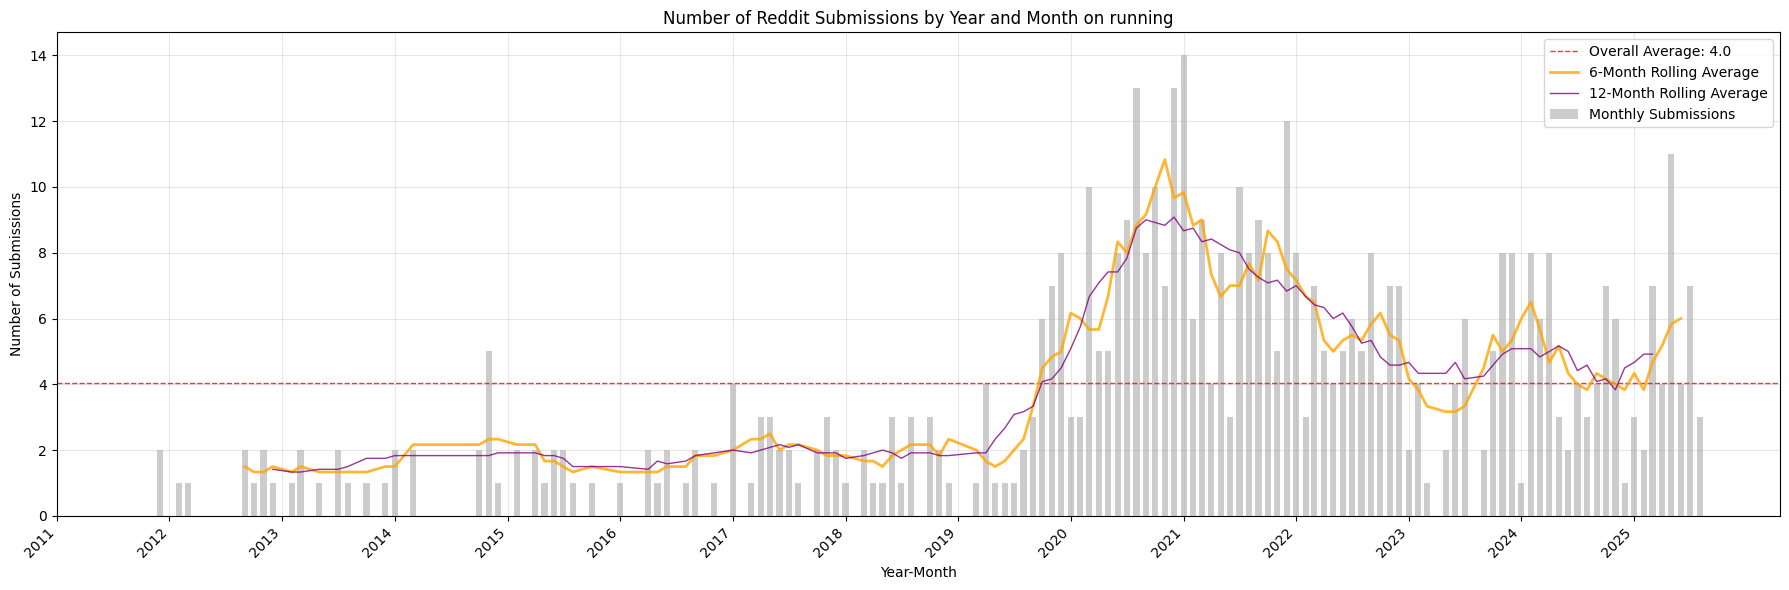

In [ ]:
# Count users who posted per month-year
submission_counts = content_df.groupby(['year', 'month'])['id'].count().reset_index()
submission_counts['date'] = pd.to_datetime(submission_counts[['year', 'month']].assign(day=1))
submission_counts = submission_counts.sort_values('date')
overall_average = submission_counts['id'].mean()
submission_counts['rolling_avg_6m'] = submission_counts['id'].rolling(window=6, center=True).mean()
submission_counts['rolling_avg_12m'] = submission_counts['id'].rolling(window=12, center=True).mean()

plt.figure(figsize=(18, 6))
bars = plt.bar(submission_counts['date'], submission_counts['id'], width=20, alpha=0.4, color='gray', label='Monthly Submissions')
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Overall Average: {overall_average:.1f}')

plt.plot(submission_counts['date'], submission_counts['rolling_avg_6m'], color='orange', linewidth=2, alpha=0.8, label='6-Month Rolling Average')
plt.plot(submission_counts['date'], submission_counts['rolling_avg_12m'], color='purple', linewidth=1, alpha=0.8, label='12-Month Rolling Average')

years = range(submission_counts['year'].min(), submission_counts['year'].max() + 1)
year_dates = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.xticks(year_dates, years, rotation=45, ha='right')

plt.xlabel("Year-Month")
plt.ylabel("Number of Submissions")
plt.title("Number of Reddit Submissions by Year and Month on running")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

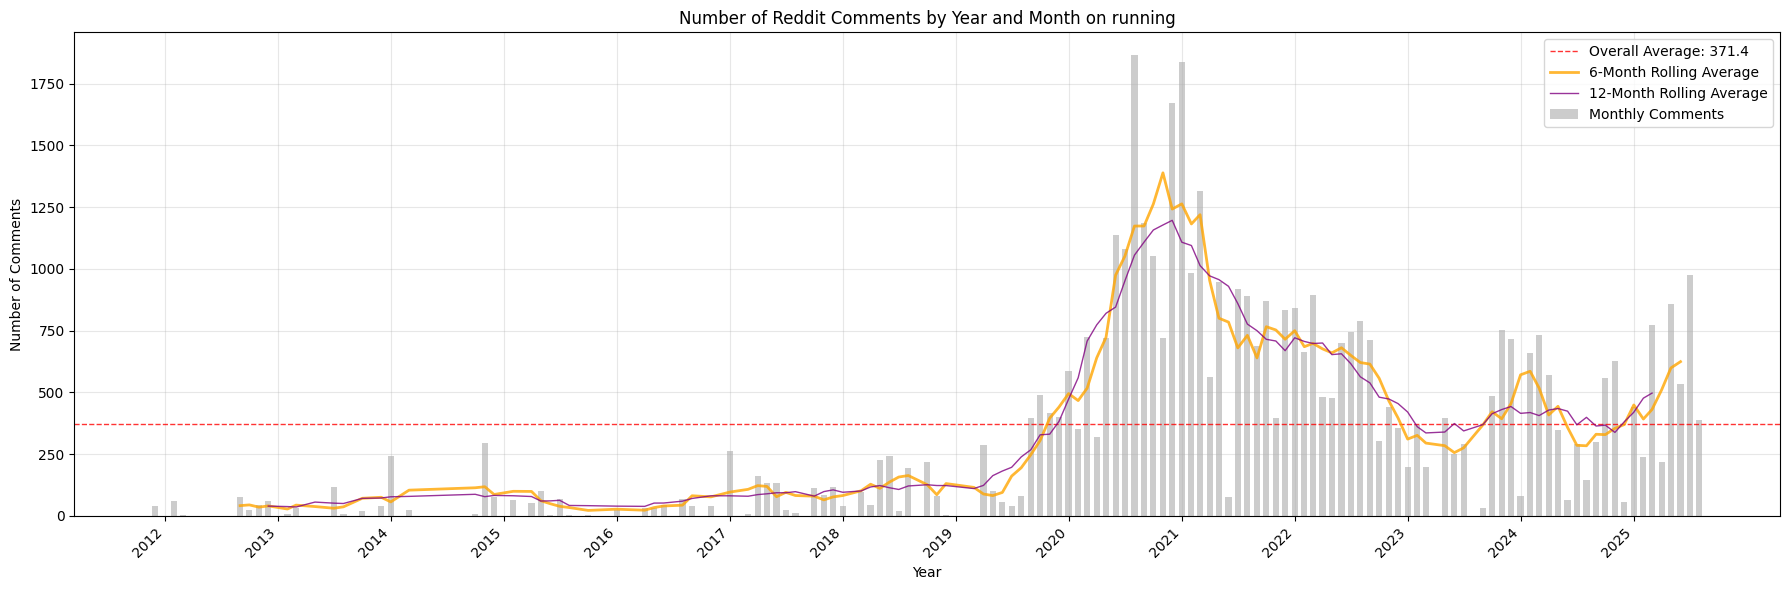

In [ ]:
# Count comments per month-year
comment_counts = content_df.groupby(['year', 'month'])['count_comments'].sum().reset_index()
comment_counts['date'] = pd.to_datetime(comment_counts[['year', 'month']].assign(day=1))
comment_counts = comment_counts.sort_values('date')
overall_average = comment_counts['count_comments'].mean()
comment_counts['rolling_avg_6m'] = comment_counts['count_comments'].rolling(window=6, center=True).mean()
comment_counts['rolling_avg_12m'] = comment_counts['count_comments'].rolling(window=12, center=True).mean()

plt.figure(figsize=(18, 6))
bars = plt.bar(comment_counts['date'], comment_counts['count_comments'], width=20, alpha=0.4, color='gray', label='Monthly Comments')
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Overall Average: {overall_average:.1f}')

years = range(comment_counts['year'].min(), comment_counts['year'].max() + 1)
year_dates = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.xticks(year_dates, years, rotation=45, ha='right')

plt.plot(comment_counts['date'], comment_counts['rolling_avg_6m'], color='orange', linewidth=2, alpha=0.8, label='6-Month Rolling Average')
plt.plot(comment_counts['date'], comment_counts['rolling_avg_12m'], color='purple', linewidth=1, alpha=0.8, label='12-Month Rolling Average')
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.title("Number of Reddit Comments by Year and Month on running")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

After having understood the user's activity over time, we look for seasonal activity, in order to understand whether specific seasons are drivers of activity or not.

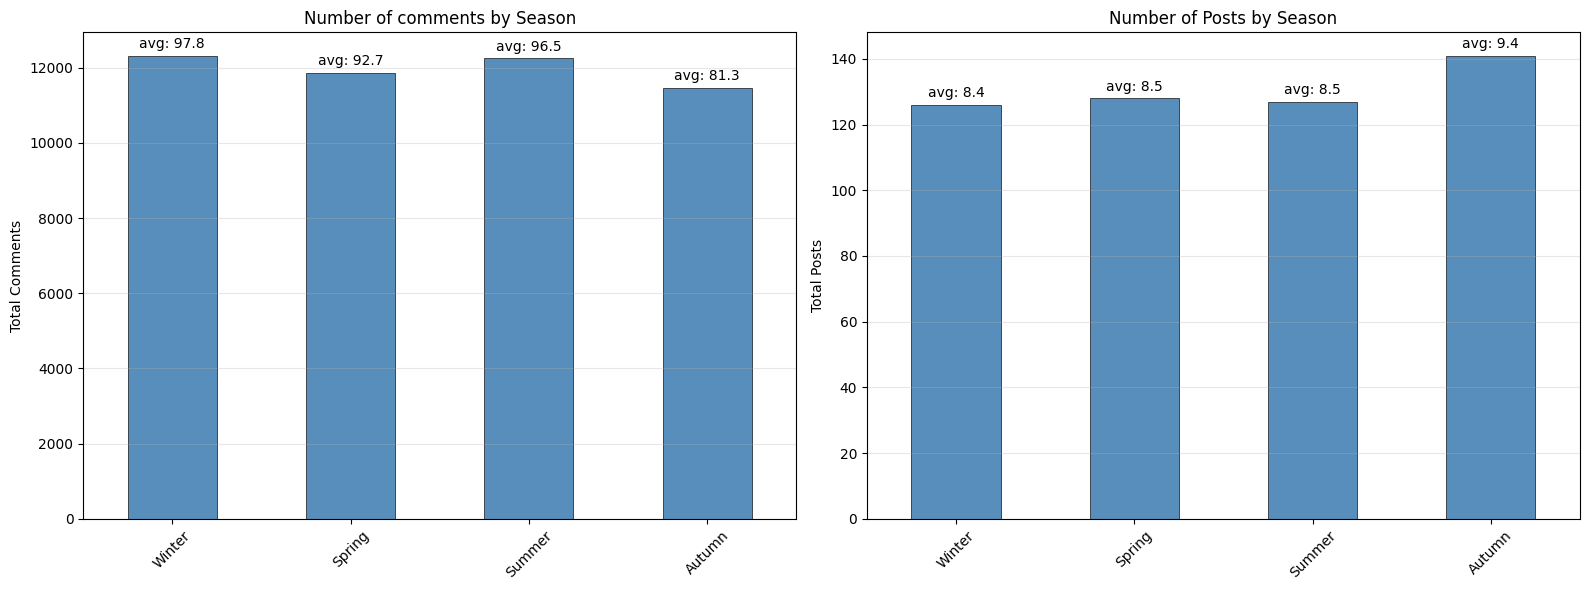

In [ ]:
# Number of posts and comments per season

months = pd.to_numeric(content_df['month'], errors='coerce')
years = pd.to_numeric(content_df['year'], errors='coerce')

season_map = {12:'Winter', 1:'Winter', 2:'Winter',
              3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer',
              9:'Autumn', 10:'Autumn', 11:'Autumn'}

season = months.map(season_map)
season = pd.Categorical(season, categories=['Winter','Spring','Summer','Autumn'], ordered=True)


counts = content_df.groupby(season, observed=False)['count_comments'].sum().reindex(['Winter','Spring','Summer','Autumn'])
averages = content_df.groupby(season, observed=False)['count_comments'].mean().reindex(['Winter','Spring','Summer','Autumn'])
post_counts_by_year_season = content_df.groupby([years, season], observed=False).size()
post_averages = post_counts_by_year_season.groupby(level=1, observed=False).mean().reindex(['Winter','Spring','Summer','Autumn'])
post_counts = content_df.groupby(season, observed=False).size().reindex(['Winter','Spring','Summer','Autumn'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Comments by season
counts.plot(kind='bar', color='steelblue', alpha=0.9, edgecolor='black', linewidth=0.5, ax=ax1)
ax1.set_title('Number of comments by Season')
ax1.set_ylabel('Total Comments')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for i, avg in enumerate(averages):
    ax1.text(i, counts.iloc[i] + max(counts) * 0.01, f'avg: {avg:.1f}', ha='center', va='bottom')

# Posts by season
post_counts.plot(kind='bar', color='steelblue', alpha=0.9, edgecolor='black', linewidth=0.5, ax=ax2)
ax2.set_title('Number of Posts by Season')
ax2.set_ylabel('Total Posts')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

for i, avg in enumerate(post_averages):
    ax2.text(i, post_counts.iloc[i] + max(post_counts) * 0.01, f'avg: {avg:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The next investigation regards january bias, specifically we would like to see whether there january is a biased month wrt the other months, across the years, due to the "new year good intentions".

In [ ]:
yearly_comparison = []

for year in content_df['year'].unique():
    year_data = content_df[content_df['year'] == year]

    # January
    jan_data = year_data[year_data['month'] == 1]
    jan_posts = len(jan_data)
    jan_avg_score = jan_data['score'].mean() if len(jan_data) > 0 else 0
    jan_avg_comments = jan_data['count_comments'].mean() if len(jan_data) > 0 else 0

    # Monthly average for the other months
    other_months = year_data[year_data['month'] != 1]
    other_avg_posts_per_month = len(other_months) / 11  # 11 remaining months
    other_avg_score = other_months['score'].mean() if len(other_months) > 0 else 0
    other_avg_comments = other_months['count_comments'].mean() if len(other_months) > 0 else 0

    yearly_comparison.append({
        'year': year,
        'jan_posts': jan_posts,
        'other_avg_posts': other_avg_posts_per_month,
        'jan_avg_score': jan_avg_score,
        'other_avg_score': other_avg_score,
        'jan_avg_comments': jan_avg_comments,
        'other_avg_comments': other_avg_comments
    })

comparison_df = pd.DataFrame(yearly_comparison)

# Percentage differences
comparison_df['posts_diff_pct'] = ((comparison_df['jan_posts'] - comparison_df['other_avg_posts']) / comparison_df['other_avg_posts'] * 100)
comparison_df['score_diff_pct'] = ((comparison_df['jan_avg_score'] - comparison_df['other_avg_score']) / comparison_df['other_avg_score'] * 100)
comparison_df['comments_diff_pct'] = ((comparison_df['jan_avg_comments'] - comparison_df['other_avg_comments']) / comparison_df['other_avg_comments'] * 100)

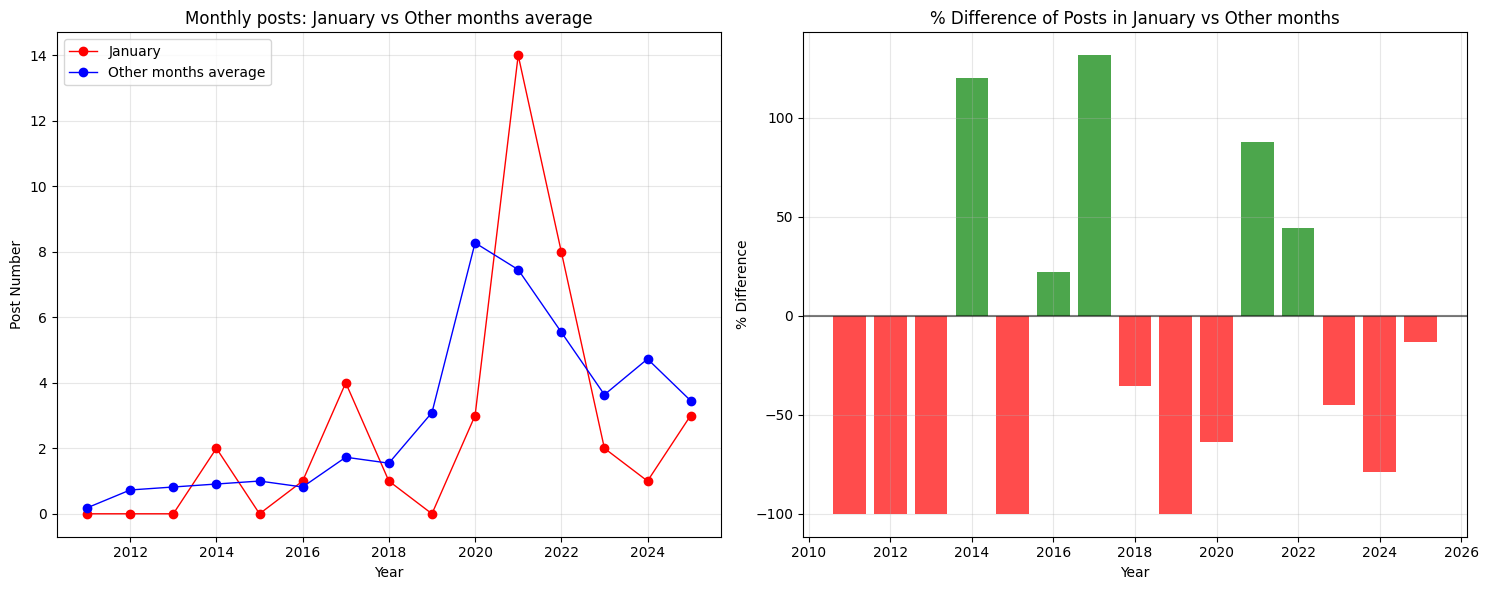

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Post count
ax1.plot(comparison_df['year'], comparison_df['jan_posts'], 'ro-', label='January', linewidth=1)
ax1.plot(comparison_df['year'], comparison_df['other_avg_posts'], 'bo-', label='Other months average', linewidth=1)
ax1.set_title('Monthly posts: January vs Other months average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Post Number')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Percentage differences for posts
ax2.bar(comparison_df['year'], comparison_df['posts_diff_pct'], color=['green' if x > 0 else 'red' for x in comparison_df['posts_diff_pct']], alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('% Difference of Posts in January vs Other months')
ax2.set_xlabel('Year')
ax2.set_ylabel('% Difference')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

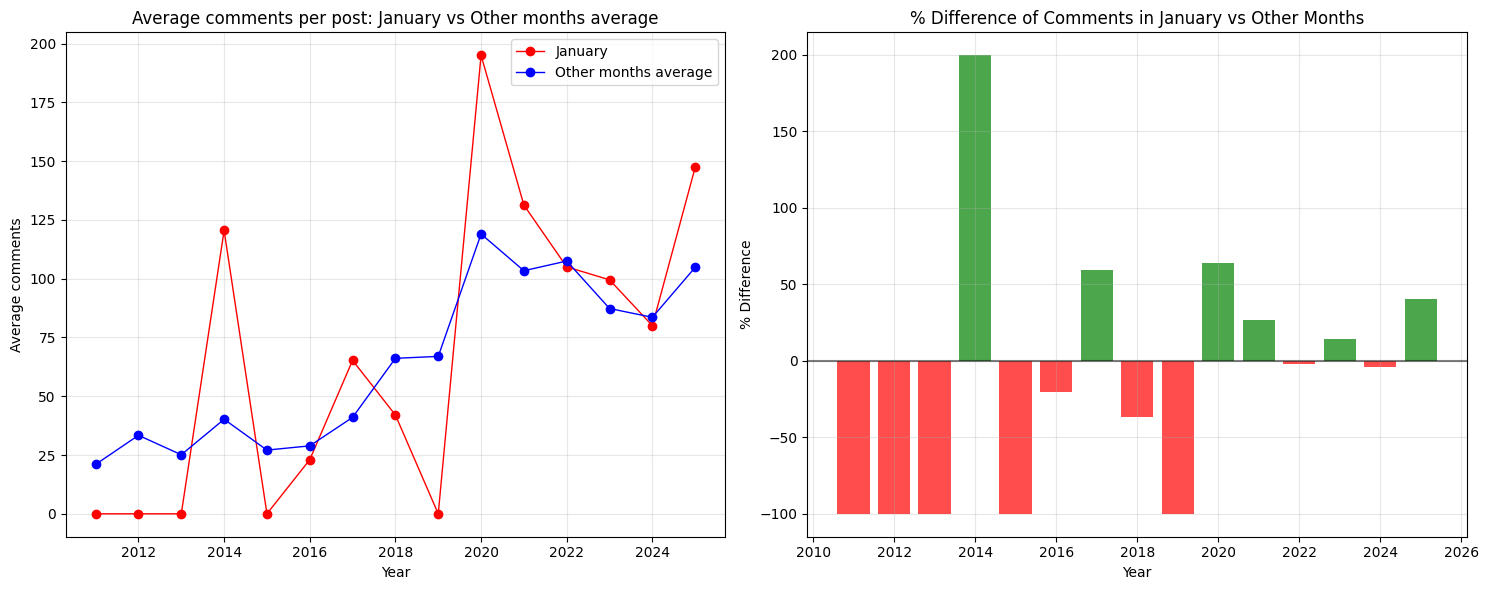

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Comments count
ax1.plot(comparison_df['year'], comparison_df['jan_avg_comments'], 'ro-', label='January', linewidth=1)
ax1.plot(comparison_df['year'], comparison_df['other_avg_comments'], 'bo-', label='Other months average', linewidth=1)
ax1.set_title('Average comments per post: January vs Other months average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average comments')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Percentage differences for comments
ax2.bar(comparison_df['year'], comparison_df['comments_diff_pct'], color=['green' if x > 0 else 'red' for x in comparison_df['comments_diff_pct']], alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('% Difference of Comments in January vs Other Months')
ax2.set_xlabel('Year')
ax2.set_ylabel('% Difference')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(f"\nAverage percentage difference posts in January: {comparison_df['posts_diff_pct'].mean():.1f}%")
print(f"Average percentage difference score in January: {comparison_df['score_diff_pct'].mean():.1f}%")
print(f"Average percentage difference comments in January: {comparison_df['comments_diff_pct'].mean():.1f}%")


Average percentage difference posts in January: -22.0%
Average percentage difference score in January: -2.7%
Average percentage difference comments in January: -10.6%


Surprisingly, in january the running activity on reddit is negatively biased, in contrast with common thought.

Somehow this is consistent however with the seasonality seen above, we see that in winter we have less post activity rather than comment activity, here indeed the negative bias is significantly larger for posts than for comments.

In the following cells we will analyze the engagement rate (comments / upvotes), which is useful to understand whether more comments implies more engaging conversations or not.


The firts plot regards engagement rate over time, while the second is more focused on seasonal engagement rate.

In [ ]:
# Engagement rate calculations

content_df['engagement_rate'] = content_df['count_comments'] / (content_df['score'] + 1)  # +1 to avoid divisions by 0
monthly_engagement = content_df.groupby(['year', 'month'])['engagement_rate'].mean()

engagement_df = monthly_engagement.reset_index()
engagement_df['date'] = pd.to_datetime(engagement_df[['year', 'month']].assign(day=1))
engagement_df = engagement_df.sort_values('date')

overall_avg_engagement = engagement_df['engagement_rate'].mean()
engagement_df['rolling_avg_6m'] = engagement_df['engagement_rate'].rolling(window=6, center=True).mean()
engagement_df['rolling_avg_12m'] = engagement_df['engagement_rate'].rolling(window=12, center=True).mean()


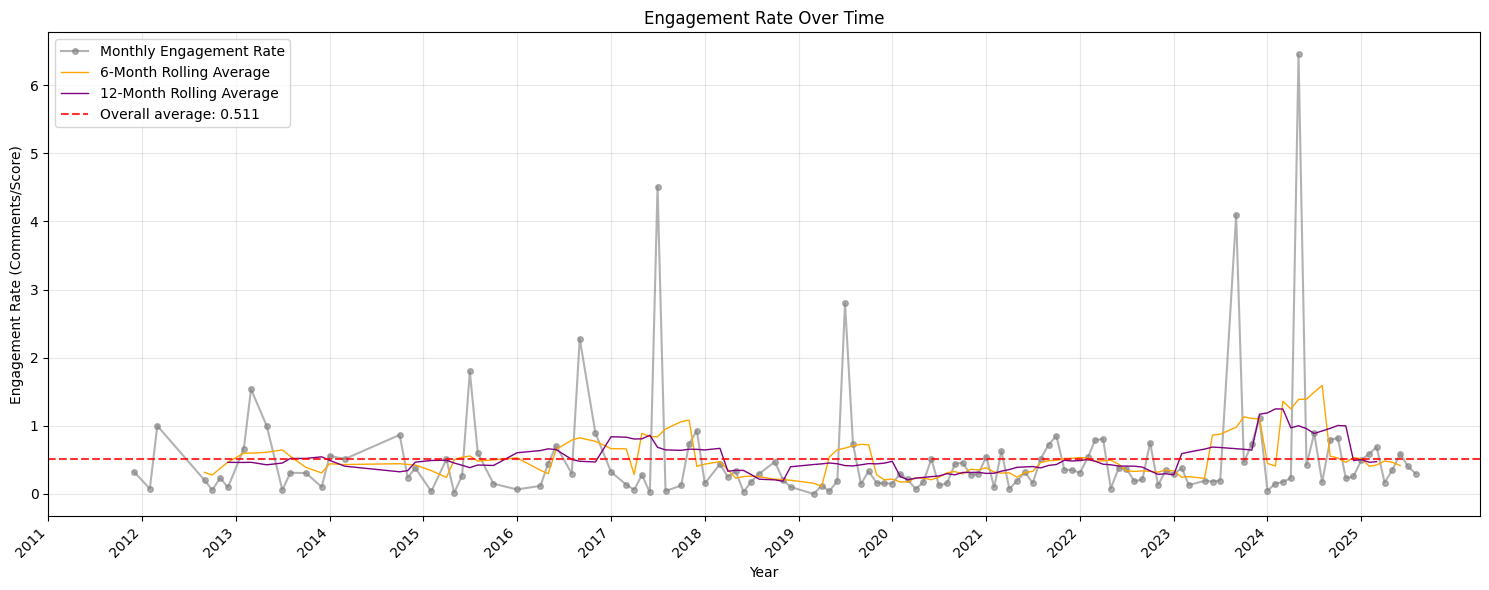

In [ ]:
# Engagement rate over time

plt.figure(figsize=(15, 6))

plt.plot(engagement_df['date'], engagement_df['engagement_rate'], 'o-', alpha=0.6, color='gray', label='Monthly Engagement Rate', markersize=4)
plt.plot(engagement_df['date'], engagement_df['rolling_avg_6m'], color='orange', linewidth=1, label='6-Month Rolling Average')
plt.plot(engagement_df['date'], engagement_df['rolling_avg_12m'], color='purple', linewidth=1, label='12-Month Rolling Average')

plt.axhline(y=overall_avg_engagement, color='red', linestyle='--', alpha=0.8, label=f'Overall average: {overall_avg_engagement:.3f}')

years = range(engagement_df['year'].min(), engagement_df['year'].max() + 1)
year_dates = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.xticks(year_dates, years, rotation=45, ha='right')

plt.xlabel('Year')
plt.ylabel('Engagement Rate (Comments/Score)')
plt.title('Engagement Rate Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

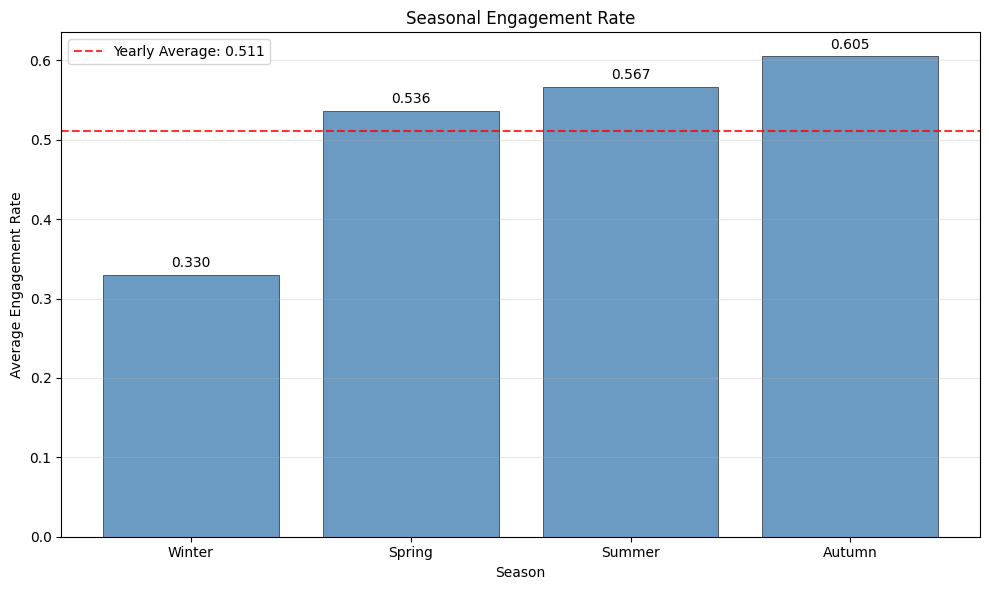

In [ ]:
# Seasonal engament rate

season_map = {12:'Winter', 1:'Winter', 2:'Winter',
              3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer',
              9:'Autumn', 10:'Autumn', 11:'Autumn'}

engagement_df['season'] = engagement_df['month'].map(season_map)
engagement_df['season'] = pd.Categorical(engagement_df['season'], categories=['Winter','Spring','Summer','Autumn'], ordered=True)

seasonal_engagement = engagement_df.groupby('season', observed=False)['engagement_rate'].mean().reindex(['Winter','Spring','Summer','Autumn'])

plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_engagement.index, seasonal_engagement.values, color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)

plt.axhline(y=overall_avg_engagement, color='red', linestyle='--', alpha=0.8, label=f'Yearly Average: {overall_avg_engagement:.3f}')

for i, v in enumerate(seasonal_engagement.values):
    plt.text(i, v + max(seasonal_engagement) * 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('Average Engagement Rate')
plt.title('Seasonal Engagement Rate')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

This plot shows a certian degree of consistency with the previous analyses. In autumn not only the actiivity is significantly larger on its own, but also engagement seems to be more present, while winter shows both weeker activity and engagement.

The next and final step (the more granular one) involves understanding daily patterns across the weeks.

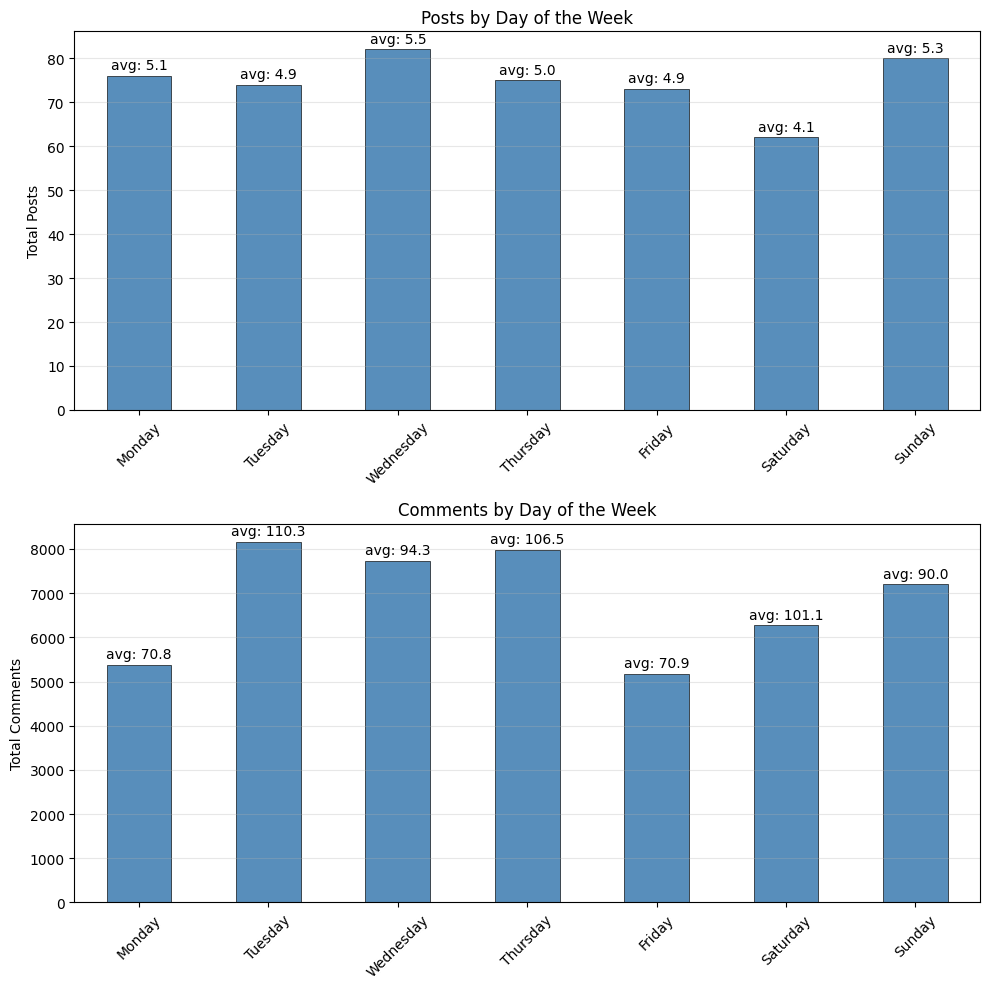

In [ ]:
# Posts and comments by day of the week

dow = pd.Categorical(df['dow'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

posts_by_dow_year = df.groupby([dow, df['year']], observed=False).size()
post_averages_by_dow = posts_by_dow_year.groupby(level=0).mean()

post_counts = df.groupby(dow, observed=False).size()

comment_counts = df.groupby(dow, observed=False)['count_comments'].sum()
comment_averages = df.groupby(dow, observed=False)['count_comments'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

post_counts.plot(kind='bar', color='steelblue', alpha=0.9, edgecolor='black', linewidth=0.5, ax=ax1)
ax1.set_title('Posts by Day of the Week')
ax1.set_ylabel('Total Posts')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

for i in range(len(post_counts)):
    ax1.text(i, post_counts.iloc[i] + max(post_counts) * 0.01, f'avg: {post_averages_by_dow.iloc[i]:.1f}', ha='center', va='bottom')

comment_counts.plot(kind='bar', color='steelblue', alpha=0.9, edgecolor='black', linewidth=0.5, ax=ax2)
ax2.set_title('Comments by Day of the Week')
ax2.set_ylabel('Total Comments')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

for i, avg in enumerate(comment_averages):
    ax2.text(i, comment_counts.iloc[i] + max(comment_counts) * 0.01, f'avg: {avg:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Sentiment Analysis

## Knowledge-Based Approaches

### AFINN

We will start sentiment analysis by investigating the valence of the submission texts by using AFINN, a manually generated lexicon that scores individual words.

We will compare raw text valence with preprocessed text valence, and we will investigate:
- Absolute scores and related polarity
- Author-level analysis
- Temporal-level analysis
- Word-level contribution
- Comment-level contribution

In [ ]:
content_df['text'].dtype

dtype('O')

In [ ]:
content_df['text'] = content_df['text'].astype('string')
content_df['text'].dtype

string[python]

In [ ]:
content_df['text'][0]

'Comprehensive guide to what to wear for winter running...'

In [ ]:
# Initialize and apply a Afinn object

afinn = Afinn()
content_df['afinn'] = content_df['text'].apply(afinn.score)

content_df.head(5)

author          created_utc     id  score  \
0           Can37  2011-12-02 01:59:55  mwy3x    335   
1  foreveranewbie  2011-12-15 19:12:23  ne3wl     10   
2   PKLKickballer  2012-02-22 17:43:22  q15p3    808   
3      Squints753  2012-03-22 18:15:24  r8oop      1   
4    DingDongerer  2012-09-11 15:15:03  zpmd7    152   

                                               title  upvote_ratio  \
0  Comprehensive guide to what to wear for winter...          0.95   
1                                c242k Training Plan          0.78   
2                           You shouldn't be winded!          0.97   
3  In week 3 of beginner's program, can't run mor...          1.00   
4  As a runner I struggle with running vs. liftin...          0.97   

                                    matched_keywords           category  \
0  winter running OR summer running OR spring run...   seasonal_running   
1  marathon OR half marathon OR 10k OR 5k OR couc...      race_training   
2  wildfire OR air quality OR extreme heat OR ice...     weather_events   
3  jogging OR start running OR get in shape OR be...   general_interest   
4  lockdown OR covid OR pandemic OR quarantine OR...  pandemic_lockdown   

                                                text  \
0  Comprehensive guide to what to wear for winter...   
1  c242k Training PlanThis is [The Plan](https://...   
2  You shouldn't be winded!I've seen a few posts ...   
3  In week 3 of beginner's program, can't run mor...   
4  As a runner I struggle with running vs. liftin...   

                                           text_proc  year  month        dow  \
0  ['comprehensive', 'guide', 'wear', 'winter', '...  2011     12     Friday   
1  ['c242k', 'training', 'planthis', 'plan', 'bas...  2011     12   Thursday   
2  ['winded', 'seen', 'posts', 'week', 'newer', '...  2012      2  Wednesday   
3  ['week', '3', 'beginner', 'program', 'run', '2...  2012      3   Thursday   
4  ['runner', 'struggle', 'running', 'vs', 'lifti...  2012      9    Tuesday   

   hour                                       comments_str  count_comments  \
0     1  ['c34ja51', 'c34jbyb', 'c34hxzy', 'c34j6r1', '...              36   
1    19  ['c38dn10', 'c38egje', 'c38dpkt', 'c38e9ls', '...               6   
2    17  ['c3tv88i', 'c3tuw8z', 'c3tvf0y', 'c3tyhxz', '...              61   
3    18                             ['c43teeg', 'c43whdo']               2   
4    15  ['c66n73t', 'c66ppwl', 'c66mn5u', 'c66norv', '...              52   

   engagement_rate  afinn  
0         0.107143    2.0  
1         0.545455    4.0  
2         0.075402   37.0  
3         1.000000   -2.0  
4         0.339869    6.0

In [ ]:
content_df['afinn'].value_counts()

afinn
 0.0      33
 1.0      30
 2.0      29
 4.0      24
 7.0      23
          ..
-13.0      1
 48.0      1
 198.0     1
 46.0      1
 95.0      1
Name: count, Length: 86, dtype: int64

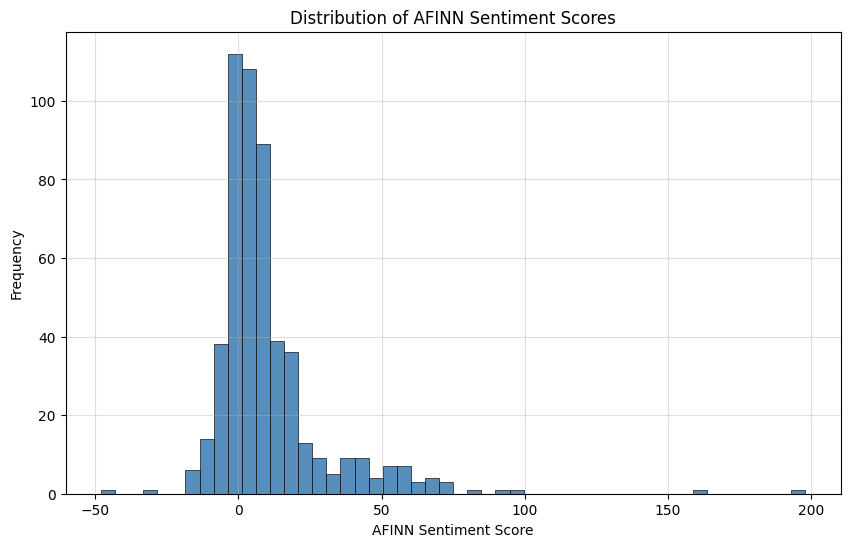

In [ ]:
# Plot the histogram of the absolute Afinn scores

plt.figure(figsize=(10, 6))

content_df['afinn'].hist(bins=50, alpha=0.9, color='steelblue', edgecolor='black', linewidth=0.5)

plt.grid(alpha=0.4)
plt.xlabel("AFINN Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of AFINN Sentiment Scores")
plt.show()

Once obatined the afinn scores for all the posts, we can use positive, negative and zero as thresholds to determine the polarity of the posts.

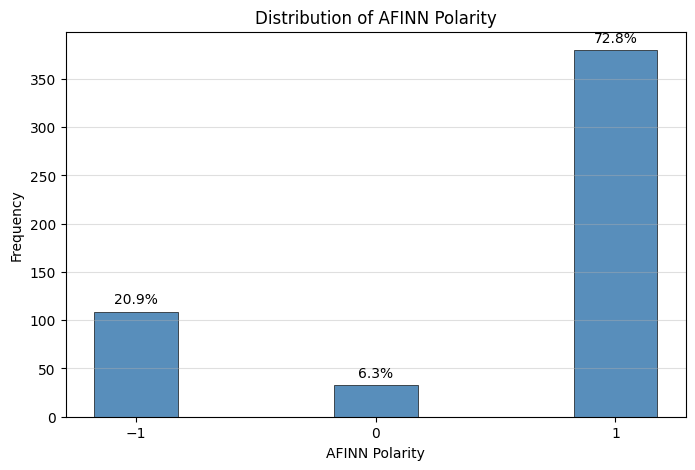

In [ ]:
# Calculate and plot the polarity obtained through the afinn scores

def map_afinn(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

content_df['afinn_label'] = content_df['afinn'].apply(map_afinn)

plt.figure(figsize=(8, 5))

counts = content_df['afinn_label'].value_counts().sort_index()
total = counts.sum()

bars = plt.bar(counts.index, counts.values, width=0.35, color='steelblue', edgecolor='black', linewidth=0.5, alpha=0.9)

for bar, count in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total:.1%}", ha='center', va='bottom', fontsize=10)

plt.xticks([-1, 0, 1])
plt.grid(alpha=0.4, axis='y')
plt.xlabel("AFINN Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of AFINN Polarity")
plt.show()


In [ ]:
print(f"Positive posts: {counts[1]}")
print(f"Neutral posts: {counts[0]}")
print(f"Negative posts: {counts[-1]}")
print(f"\nAverage AFINN sentiment: {content_df['afinn'].mean():.2f}")

Positive posts: 380
Neutral posts: 33
Negative posts: 109

Average AFINN sentiment: 10.49


Afinn estimates the majority of the posts to be positive, almost overwhelmingly.

To have a better idea of whether afinn could be trusted or not, we will check some texts to see if they correspond to their assigned polarity.

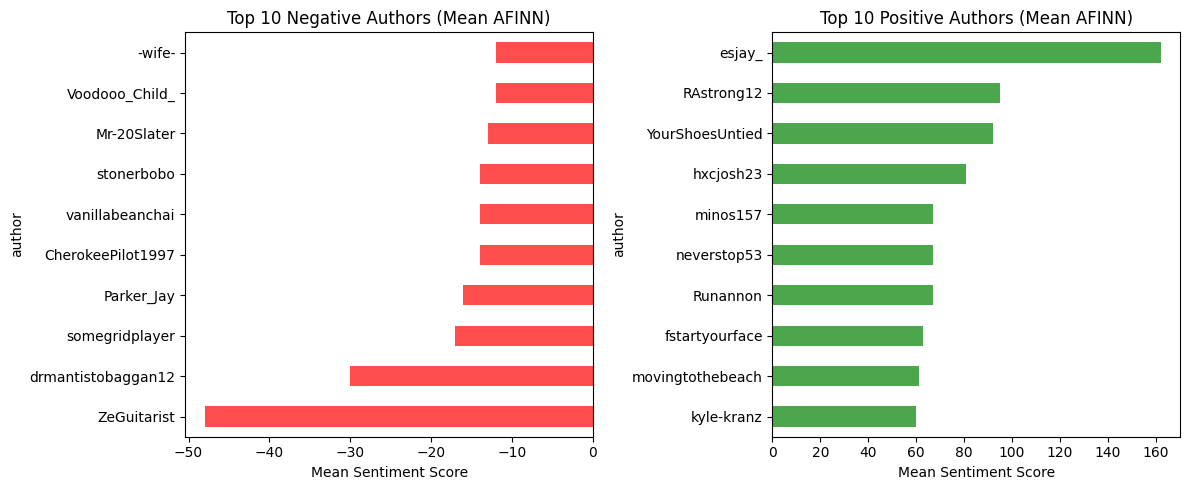

In [ ]:
# Best and worst authors based on affin's estimated sentiment

author_mean = content_df.groupby('author')['afinn'].mean().sort_values()

top_negative = author_mean.head(10)
top_positive = author_mean.tail(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_negative.plot(kind='barh', color='red', alpha=0.7)
plt.title("Top 10 Negative Authors (Mean AFINN)")
plt.xlabel("Mean Sentiment Score")

plt.subplot(1, 2, 2)
top_positive.plot(kind='barh', color='green', alpha=0.7)
plt.title("Top 10 Positive Authors (Mean AFINN)")
plt.xlabel("Mean Sentiment Score")

plt.tight_layout()
plt.show()

In [ ]:
print(content_df[content_df['author'] == 'ZeGuitarist']['text'].iloc[0])

[OPINION] Even if their products are objectively superior, I refuse to buy Nike.First, a disclaimer: yes, you could argue that all major brands are "evil" to some extent, since they're all more or less driven by corporate greed and all the ugliness that comes with it. But Nike strikes me as one of the worst offenders, and one of the greediest and most evil brands in the world - sports-related or otherwise.

First (and possibly worst) there was the [Nike Oregon Project](https://en.m.wikipedia.org/wiki/Nike_Oregon_Project) where athletes were systematically doped and [abused to the point of medical danger](https://www.nytimes.com/2019/11/07/opinion/nike-running-mary-cain.html) - all of which was wilfully ignored by Nike at best, and [actively endorsed at worst](https://www.nytimes.com/2019/10/01/sports/mark-parker-nike-alberto-salazar.html).

Then there was the [AlphaFly controversy](https://amp.theguardian.com/sport/2020/feb/05/nike-air-zoom-alphafly-next-shoe), with Nike conveniently l

In [ ]:
print(content_df[content_df['author'] == 'drmantistobaggan12']['text'].iloc[0])

TIFU bad. I bonked on a 15 mile run and ended up 4 miles from home with no food, water, mask, toilet, and no way to get back.So I'm a casual runner (some may even say jogger) but am in the middle of a marathon training program.  I'm at the 15 mile part of the training program.  In the last few weeks, I had completed the 12 and 14 mile runs easily, so I was feeling a bit cocky.  The important context for this story is that I usually run at night after the sun is down and when I have a full belly of food, but I tried running for the first time for the 10 mile "cool down" run in the early morning and really enjoyed it.  It was nice to be out when the sun was rising but the air was still cool and the world is still quiet. Also, I didn't eat or drink anything before this run, and I felt great and light as a feather.

So, the next week I decide to run the 15 mile run at 6:30am the morning. I decide to do what worked last time and to not eat or drink anything before the run, but I do have a g

In [ ]:
print(content_df[content_df['author'] == 'esjay_']['text'].iloc[0])

The weekly stride: EPISODE FIFTEEN*Previously, on the weekly stride....* 

[fourteen](https://www.reddit.com/r/running/comments/4cptyi/the_weekly_stride_episode_fourteen/) // [thirteen](https://www.reddit.com/r/running/comments/4bunvs/the_weekly_stride_episode_thirteen/) //[twelve](https://www.reddit.com/r/running/comments/49t243/the_weekly_stride_episode_twelve/) // [eleven](https://www.reddit.com/r/running/comments/48xecy/the_weekly_stride_episode_eleven/) //   [ten](https://www.reddit.com/r/running/comments/47ioua/the_weekly_stride_episode_ten_video_spectacular/) //  [nine](https://www.reddit.com/r/running/comments/46hr76/the_weekly_stride_episode_nine/) // [eight](https://www.reddit.com/r/running/comments/458fhk/the_weekly_stride_episode_8/) // [seven](https://www.reddit.com/r/running/comments/443ggr/the_weekly_stride_episode_7/) // [six](https://www.reddit.com/r/running/comments/3yzirs/the_weekly_stride_episode_6/) // [five ](https://www.reddit.com/r/running/comments/3x4tmo/the_we

In [ ]:
print(content_df[content_df['author'] == 'RAstrong12']['text'].iloc[0])

First Half Marathon, Finished! - Chessie Trail Half, Lexington VA# Race Information

* **Name:** Chessie Trail Half Marathon
* **Date:** September 26, 2024
* **Distance:** 13.1 Miles
* **Location:** Lexington, VA
* **Website:** [https://www.runthechessie.org/](https://www.runthechessie.org/)
* **Time:** 2:08:23

# Goals

|Goal|Description|Completed?|
|:-|:-|:-|
|A|Finish!|*Yes*|
|B|Sub 2:30 (GOAL)|*Yes*|

# Splits

|Mile|Time|
|:-|:-|
|1|9:41|
|2|9:19|
|3|9:32|
|4|9:26|
|5|9:47|
|6|9:19|
|7|9:30|
|8|9:36|
|9|9:28|
|10|9:36|
|11|10:22|
|12|10:21|
|13|10:37|
|14|8:58|

# Training

I've never been a "runner" before. Played Team sports growing up and was athletic but post college have not kept up with my fitness. My wife and I had our first baby in July and after that I was wanting to get back in shape and do something that makes my family proud! In August I decided to run my the Chessie Trail Half Marathon which is a small town race that my town puts on. I was contemplating just running t

Using the raw text clearly produces apparently reasonable results.

We will try the pre-processed version of the text, where special characters and links are removed, and the text is tokenized.

In [ ]:
type(content_df['text_proc'].iloc[0])

str

In [ ]:
content_df['tokens'] = content_df['text_proc'].apply(literal_eval)

In [ ]:
type(content_df['tokens'].iloc[0])

list

In [ ]:
content_df['clean_text'] = content_df['tokens'].apply(lambda tokens: " ".join(tokens))

In [ ]:
content_df['clean_text'].iloc[0]

'comprehensive guide wear winter running'

In [ ]:
# Calculation of the afinn score using the preprocessed text

content_df['new_afinn'] = content_df['clean_text'].apply(afinn.score)
content_df['new_afinn'].value_counts()

new_afinn
2.0      33
0.0      33
1.0      32
6.0      30
4.0      22
         ..
220.0     1
48.0      1
99.0      1
46.0      1
30.0      1
Name: count, Length: 83, dtype: int64

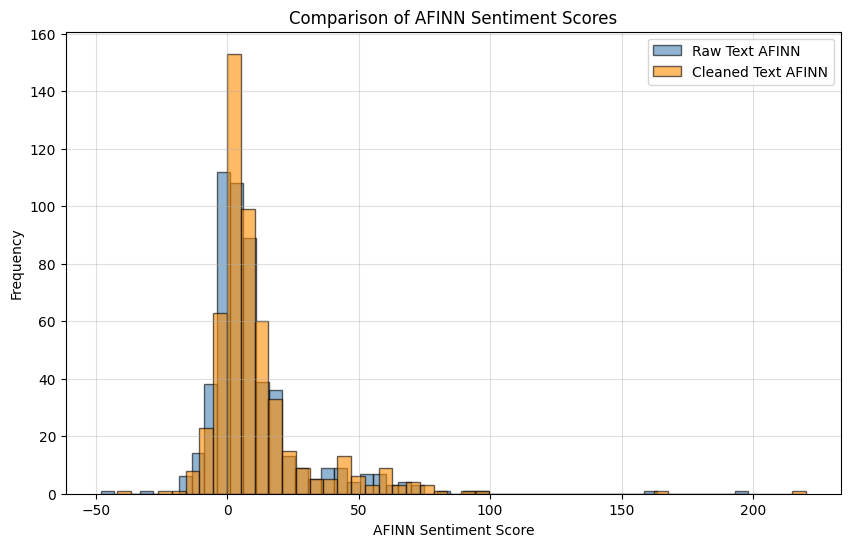

In [ ]:
# Absolute afinn score comparison between raw text and preprocessed text

plt.figure(figsize=(10, 6))

plt.hist(content_df['afinn'], bins=50, alpha=0.6, color='steelblue', edgecolor='black', label='Raw Text AFINN')

plt.hist(content_df['new_afinn'], bins=50, alpha=0.6, color='darkorange', edgecolor='black', label='Cleaned Text AFINN')

plt.grid(alpha=0.4)
plt.xlabel("AFINN Sentiment Score")
plt.ylabel("Frequency")
plt.title("Comparison of AFINN Sentiment Scores")
plt.legend()
plt.show()


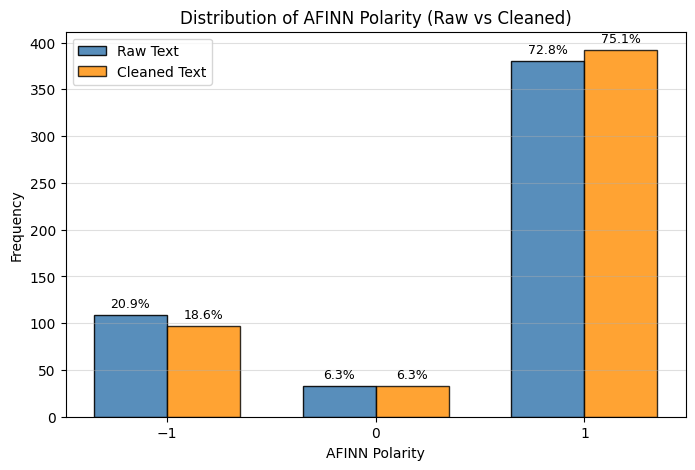

In [ ]:
# Polarity comparison between raw text and preprocessed text

def map_afinn(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

content_df['afinn_label'] = content_df['afinn'].apply(map_afinn)
content_df['new_afinn_label'] = content_df['new_afinn'].apply(map_afinn)

plt.figure(figsize=(8, 5))

counts_raw = content_df['afinn_label'].value_counts().sort_index()
counts_clean = content_df['new_afinn_label'].value_counts().sort_index()
total_raw = counts_raw.sum()
total_clean = counts_clean.sum()

bar_width = 0.35
x = [-1, 0, 1]

bars_raw = plt.bar([p - bar_width/2 for p in x], counts_raw.values, width=bar_width, color='steelblue', edgecolor='black', alpha=0.9, label='Raw Text')
bars_clean = plt.bar([p + bar_width/2 for p in x], counts_clean.values, width=bar_width, color='darkorange', edgecolor='black', alpha=0.8, label='Cleaned Text')

for bar, count in zip(bars_raw, counts_raw.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_raw:.1%}", ha='center', va='bottom', fontsize=9)
for bar, count in zip(bars_clean, counts_clean.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_clean:.1%}", ha='center', va='bottom', fontsize=9)

plt.xticks(x)
plt.grid(alpha=0.4, axis='y')
plt.xlabel("AFINN Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of AFINN Polarity (Raw vs Cleaned)")
plt.legend()
plt.show()


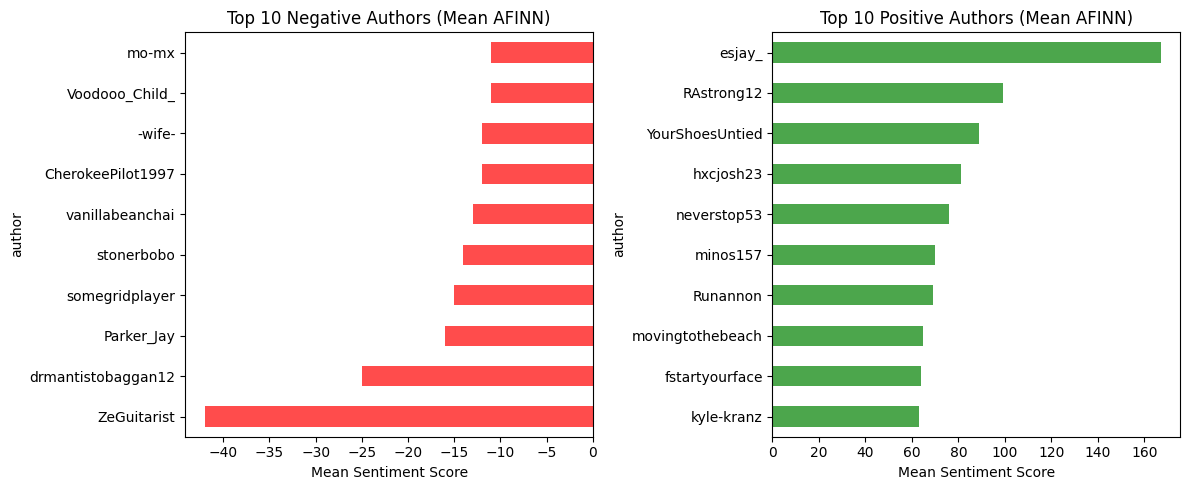

In [ ]:
# Best and worst authors comparison between raw text and preprocessed text

author_mean = content_df.groupby('author')['new_afinn'].mean().sort_values()

top_negative = author_mean.head(10)
top_positive = author_mean.tail(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_negative.plot(kind='barh', color='red', alpha=0.7)
plt.title("Top 10 Negative Authors (Mean AFINN)")
plt.xlabel("Mean Sentiment Score")

plt.subplot(1, 2, 2)
top_positive.plot(kind='barh', color='green', alpha=0.7)
plt.title("Top 10 Positive Authors (Mean AFINN)")
plt.xlabel("Mean Sentiment Score")

plt.tight_layout()
plt.show()


Preprocessing had not a large effect on results, thus from now on we will use only the AFINN obtained using the preprocessed text for the next AFINN sentiment analyses .

The first analysis we carry on is the temporal analysis, to explore how the sentiment changed over time.

In [ ]:
type(content_df['created_utc'].iloc[0])

str

In [ ]:
content_df['created_utc'] = pd.to_datetime(content_df['created_utc'], errors='coerce')
type(content_df['created_utc'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

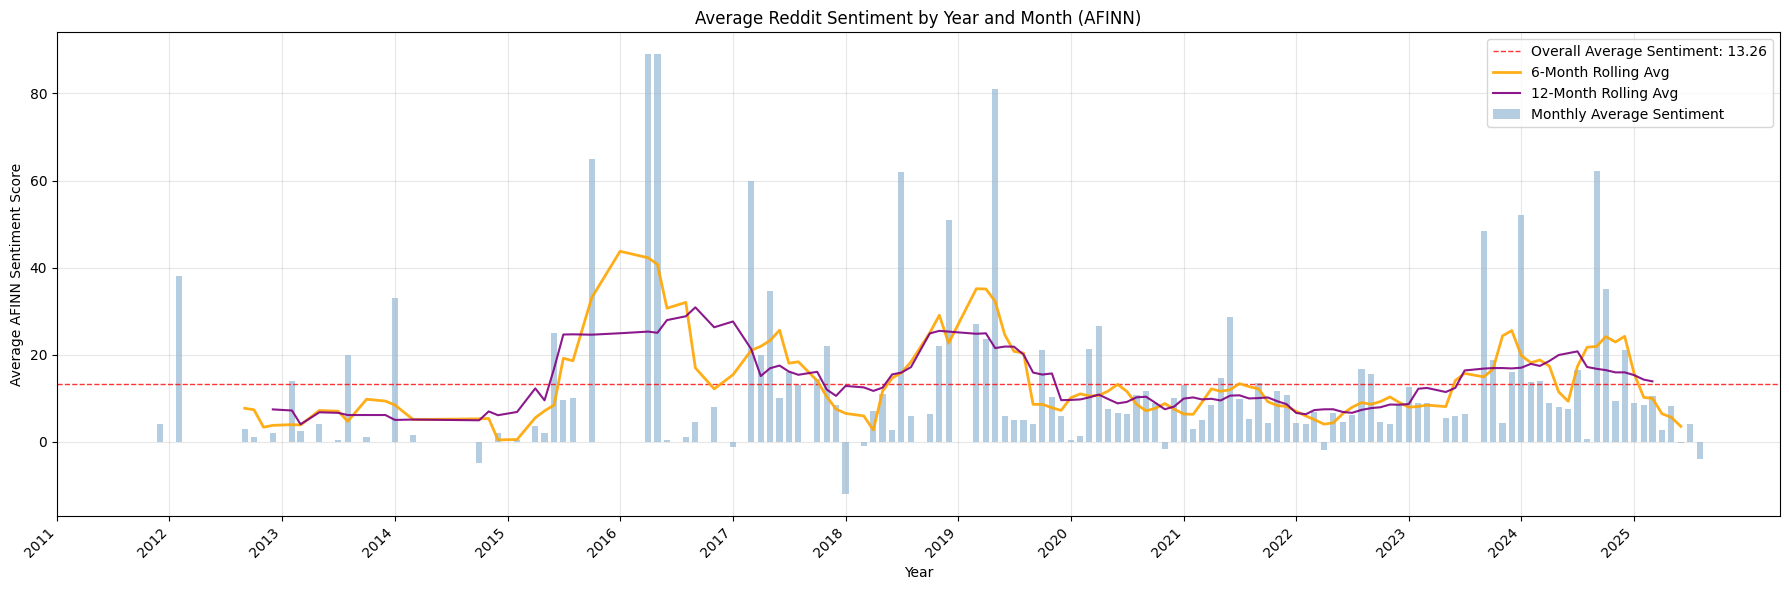

In [ ]:
# Plot sentiment (obtained using afinn scores from the preprocessed text) over time

sentiment_trends = content_df.groupby(['year', 'month'])['new_afinn'].mean().reset_index()
sentiment_trends['date'] = pd.to_datetime(sentiment_trends[['year', 'month']].assign(day=1))
sentiment_trends = sentiment_trends.sort_values('date')

overall_avg = sentiment_trends['new_afinn'].mean()

sentiment_trends['rolling_avg_6m'] = sentiment_trends['new_afinn'].rolling(window=6, center=True).mean()
sentiment_trends['rolling_avg_12m'] = sentiment_trends['new_afinn'].rolling(window=12, center=True).mean()

plt.figure(figsize=(18, 6))

bars = plt.bar(sentiment_trends['date'], sentiment_trends['new_afinn'], width=20, alpha=0.4, color='steelblue', label='Monthly Average Sentiment')

plt.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Overall Average Sentiment: {overall_avg:.2f}')

plt.plot(sentiment_trends['date'], sentiment_trends['rolling_avg_6m'], color='orange', linewidth=2, alpha=0.9, label='6-Month Rolling Avg')
plt.plot(sentiment_trends['date'], sentiment_trends['rolling_avg_12m'], color='purple', linewidth=1.5, alpha=0.9, label='12-Month Rolling Avg')

years = range(sentiment_trends['year'].min(), sentiment_trends['year'].max() + 1)
year_dates = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.xticks(year_dates, years, rotation=45, ha='right')

plt.xlabel("Year")
plt.ylabel("Average AFINN Sentiment Score")
plt.title("Average Reddit Sentiment by Year and Month (AFINN)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


To have a better idea of the sentiment, we will analyze the polarity from a more general level to a more granular one.

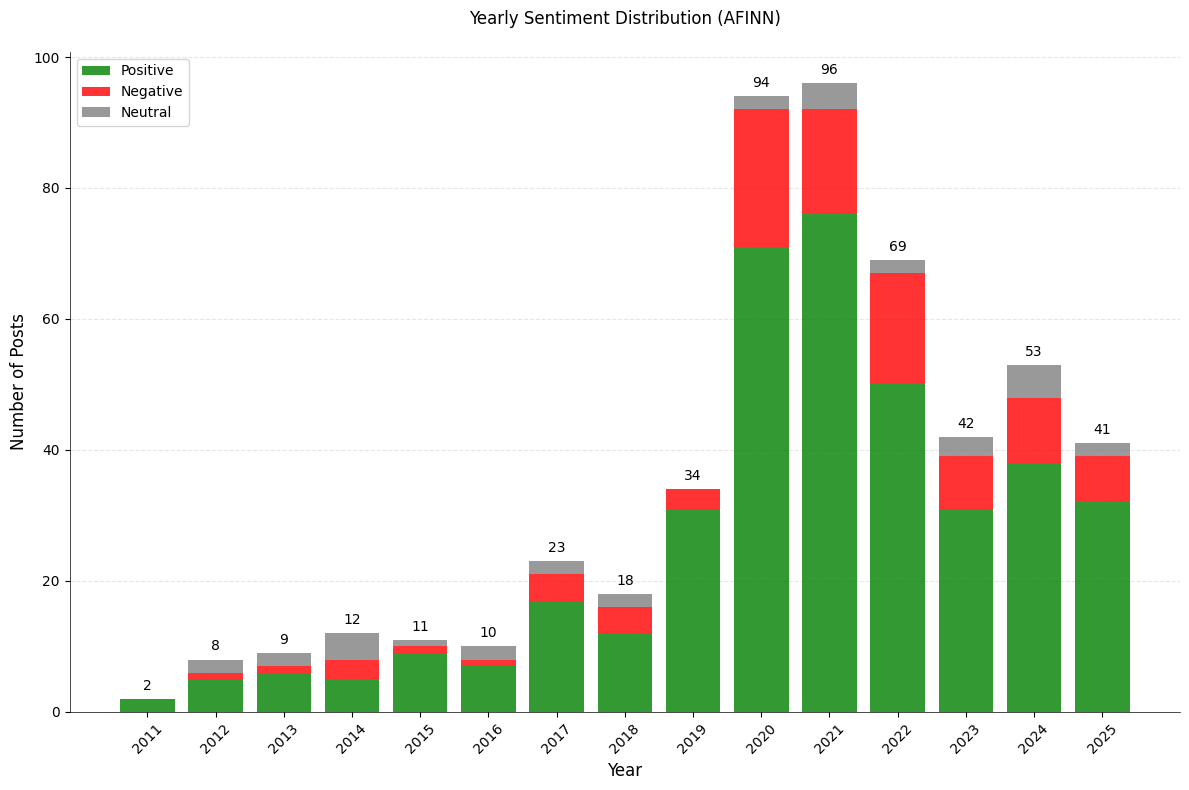

In [ ]:
# Yearly sentiment distribution

yearly_sentiment_data = []
years = sorted(content_df['year'].unique())

for year in years:
    year_data = content_df[content_df['year'] == year]

    if len(year_data) > 0:
        afinn_pos = (year_data['new_afinn_label'] == 1).sum()
        afinn_neg = (year_data['new_afinn_label'] == -1).sum()
        afinn_neu = (year_data['new_afinn_label'] == 0).sum()

        yearly_sentiment_data.append({
            'year': year,
            'total': len(year_data),
            'positive': afinn_pos,
            'negative': afinn_neg,
            'neutral': afinn_neu
        })

yearly_df = pd.DataFrame(yearly_sentiment_data)

positive_color = 'green'
negative_color = 'red'
neutral_color = 'gray'

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

x_positions = range(len(yearly_df))

ax.bar(x_positions, yearly_df['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(x_positions, yearly_df['negative'], bottom=yearly_df['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(x_positions, yearly_df['neutral'], bottom=yearly_df['positive'] + yearly_df['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_xticks(x_positions)
ax.set_xticklabels(yearly_df['year'], rotation=45)

ax.set_title('Yearly Sentiment Distribution (AFINN)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

for i, total in enumerate(yearly_df['total']):
    ax.text(i, total + max(yearly_df['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

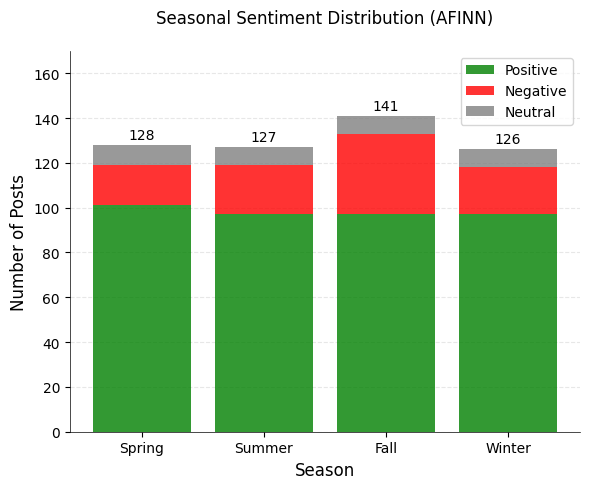

In [ ]:
# Seasonal sentiment distribution

season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

seasonal_sentiment_data = []
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

for season in season_order:
    season_months = [month for month, s in season_mapping.items() if s == season]
    season_data = content_df[content_df['month'].isin(season_months)]

    if len(season_data) > 0:
        afinn_pos = (season_data['new_afinn_label'] == 1).sum()
        afinn_neg = (season_data['new_afinn_label'] == -1).sum()
        afinn_neu = (season_data['new_afinn_label'] == 0).sum()

        seasonal_sentiment_data.append({
            'season': season,
            'total': len(season_data),
            'positive': afinn_pos,
            'negative': afinn_neg,
            'neutral': afinn_neu
        })

seasonal_df = pd.DataFrame(seasonal_sentiment_data)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.bar(seasonal_df['season'], seasonal_df['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(seasonal_df['season'], seasonal_df['negative'], bottom=seasonal_df['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(seasonal_df['season'], seasonal_df['neutral'], bottom=seasonal_df['positive'] + seasonal_df['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Seasonal Sentiment Distribution (AFINN)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Season', fontsize=12)
ax.legend(loc='upper right', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim(0, 170)

for i, (season, total) in enumerate(zip(seasonal_df['season'], seasonal_df['total'])):
    ax.text(i, total + max(seasonal_df['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

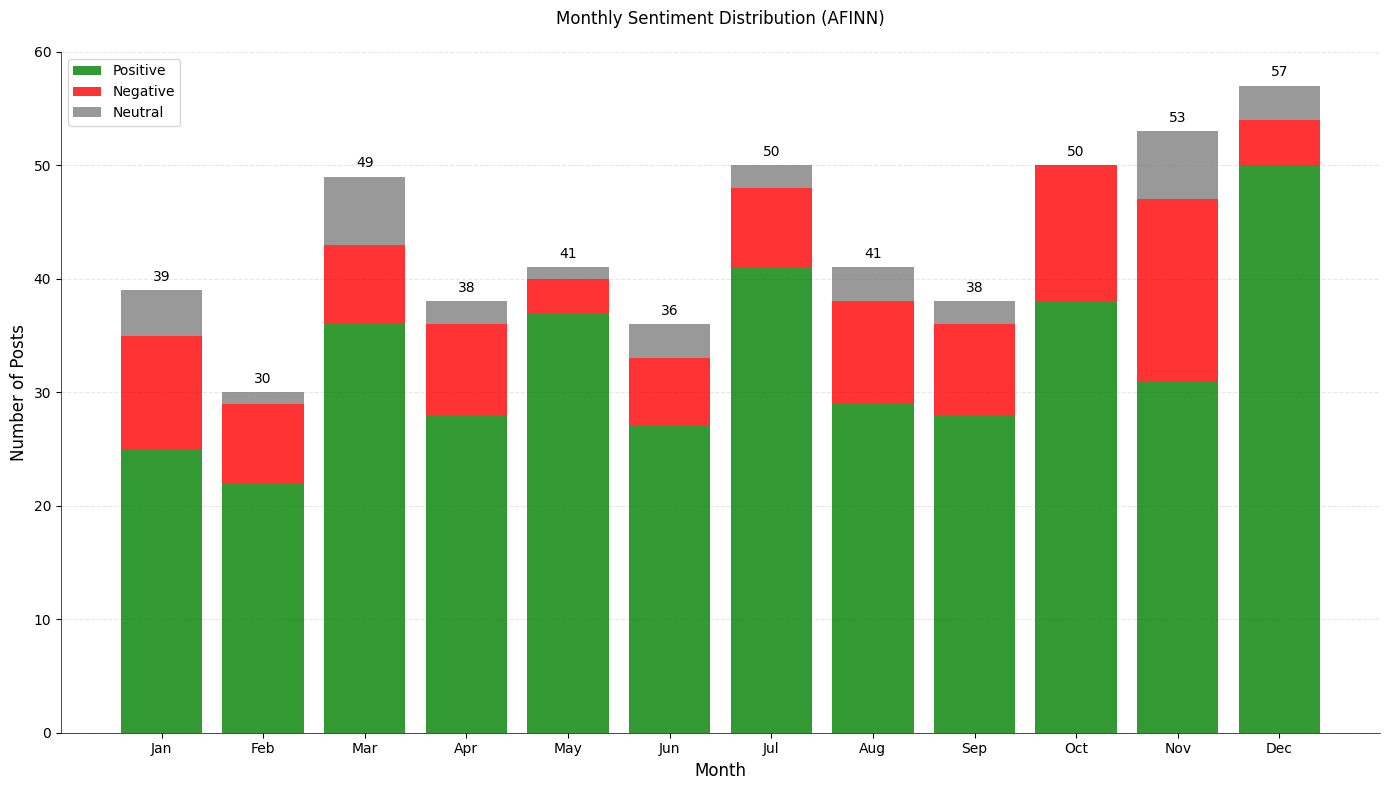

In [ ]:
# Monthly sentiment distribution

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_sentiment_data = []
for month_num in range(1, 13):
    month_data = content_df[content_df['month'] == month_num]

    if len(month_data) > 0:
        afinn_pos = (month_data['new_afinn_label'] == 1).sum()
        afinn_neg = (month_data['new_afinn_label'] == -1).sum()
        afinn_neu = (month_data['new_afinn_label'] == 0).sum()

        monthly_sentiment_data.append({
            'month': month_names[month_num],
            'month_num': month_num,
            'total': len(month_data),
            'positive': afinn_pos,
            'negative': afinn_neg,
            'neutral': afinn_neu
        })

monthly_df = pd.DataFrame(monthly_sentiment_data)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

positive_color = 'green'
negative_color = 'red'
neutral_color = 'gray'

ax.bar(monthly_df['month'], monthly_df['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(monthly_df['month'], monthly_df['negative'], bottom=monthly_df['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(monthly_df['month'], monthly_df['neutral'], bottom=monthly_df['positive'] + monthly_df['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Monthly Sentiment Distribution (AFINN)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim(0, 60)

for i, (month, total) in enumerate(zip(monthly_df['month'], monthly_df['total'])):
    ax.text(i, total + max(monthly_df['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

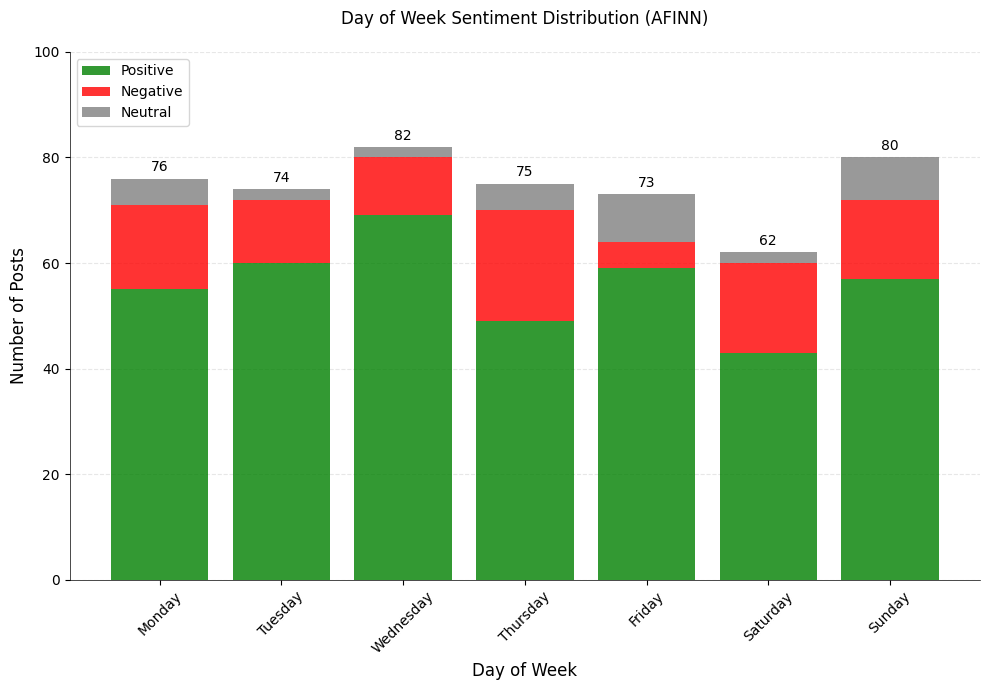

In [ ]:
# Daily sentiment analysis

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sentiment_data = []

for day in dow_order:
    day_data = content_df[content_df['dow'] == day]

    if len(day_data) > 0:
        afinn_pos = (day_data['new_afinn_label'] == 1).sum()
        afinn_neg = (day_data['new_afinn_label'] == -1).sum()
        afinn_neu = (day_data['new_afinn_label'] == 0).sum()

        dow_sentiment_data.append({
            'day': day,
            'total': len(day_data),
            'positive': afinn_pos,
            'negative': afinn_neg,
            'neutral': afinn_neu
        })

dow_df = pd.DataFrame(dow_sentiment_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(dow_df['day'], dow_df['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(dow_df['day'], dow_df['negative'], bottom=dow_df['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(dow_df['day'], dow_df['neutral'], bottom=dow_df['positive'] + dow_df['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Day of Week Sentiment Distribution (AFINN)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Day of Week', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 100)

for i, (day, total) in enumerate(zip(dow_df['day'], dow_df['total'])):
    ax.text(i, total + max(dow_df['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

The next investigation regards individual word analysis. We want to understand the most polarizing words and the extent to which they are used.

In [ ]:
all_tokens = [token for tokens in content_df['tokens'] for token in tokens]
len(all_tokens)

89349

In [ ]:
# Create a token dataset using the tokens, frequencies and individual afinn scores

scored_tokens = [(t, afinn.score(t)) for t in all_tokens if afinn.score(t) != 0]
token_freq = Counter([t for t, s in scored_tokens])

token_contrib = {}
for token, score in scored_tokens:
    token_contrib[token] = token_contrib.get(token, 0) + score

token_df = pd.DataFrame({
    'token': list(token_contrib.keys()),
    'score': list(token_contrib.values()),
    'freq': [token_freq[t] for t in token_contrib.keys()]
})

token_df = token_df.sort_values('score')

In [ ]:
token_df

token  score  freq
161     bad -297.0    99
127    pain -130.0    65
14     stop -124.0   124
23     hard -105.0   105
40   injury -104.0    52
..      ...    ...   ...
75     love  297.0    99
28     best  357.0   119
36    great  492.0   164
30     like  912.0   456
8      good  942.0   314

[1095 rows x 3 columns]

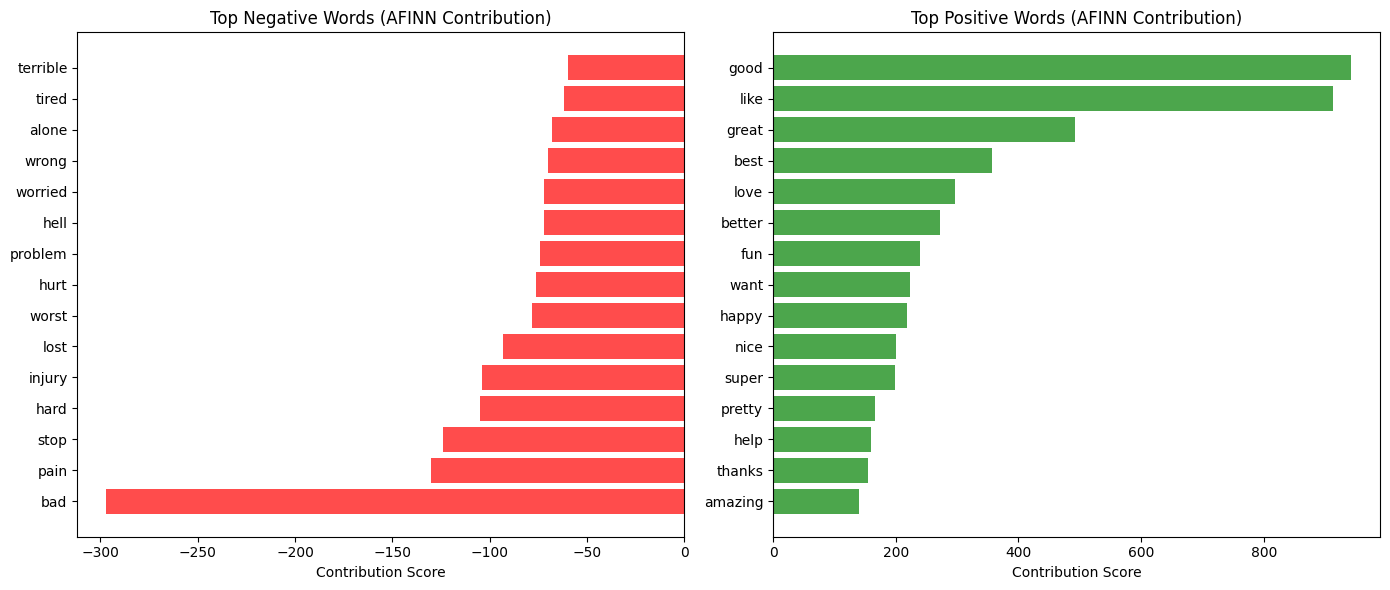

In [ ]:
# Plot best and worst polarizing words

top_negative = token_df.head(15)
top_positive = token_df.tail(15)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.barh(top_negative['token'], top_negative['score'], color='red', alpha=0.7)
plt.title("Top Negative Words (AFINN Contribution)")
plt.xlabel("Contribution Score")

plt.subplot(1,2,2)
plt.barh(top_positive['token'], top_positive['score'], color='green', alpha=0.7)
plt.title("Top Positive Words (AFINN Contribution)")
plt.xlabel("Contribution Score")

plt.tight_layout()
plt.show()


The plot seems reasonable and expected.

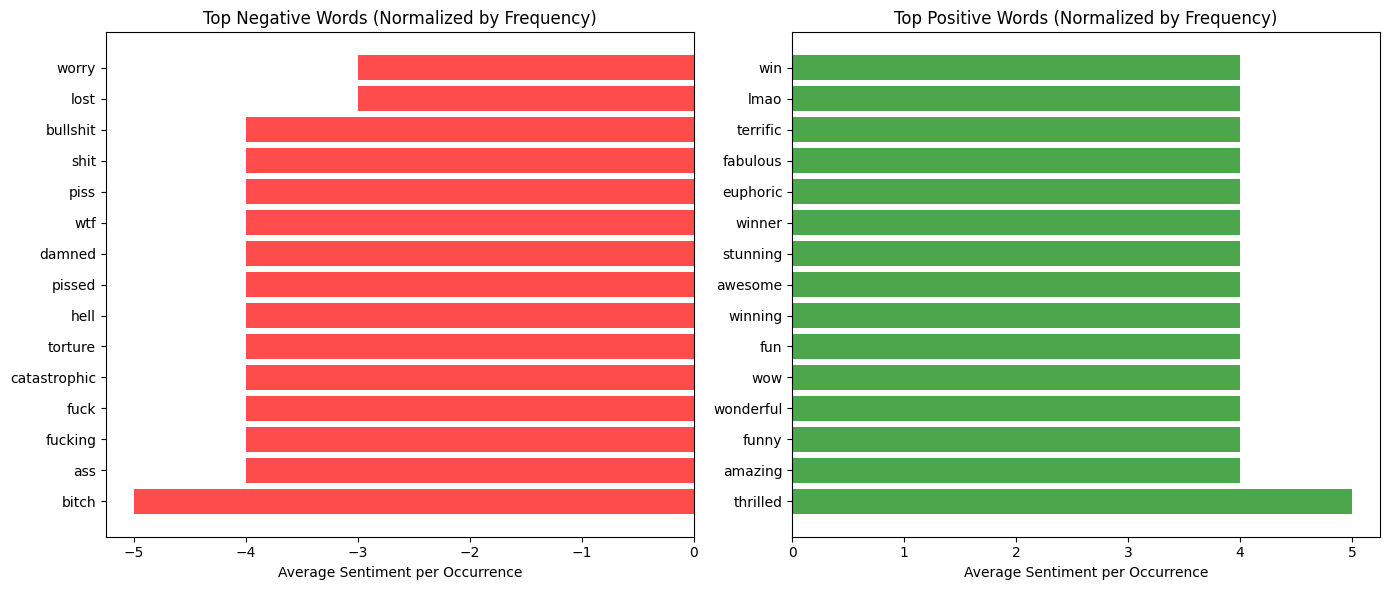

In [ ]:
# Normalized plot (which words characterize polarity more for occurrence)

token_df['avg_score'] = token_df['score'] / token_df['freq']

top_pos_norm = token_df.sort_values('avg_score', ascending=False).head(15)
top_neg_norm = token_df.sort_values('avg_score').head(15)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(top_neg_norm['token'], top_neg_norm['avg_score'], color='red', alpha=0.7)
plt.title("Top Negative Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.subplot(1,2,2)
plt.barh(top_pos_norm['token'], top_pos_norm['avg_score'], color='green', alpha=0.7)
plt.title("Top Positive Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.tight_layout()
plt.show()

Raw contribution → words that dominate sentiment because they appear often.


Normalized contribution → words that are extremely polarizing even if rare.


The obtained words were kinda expected.... Especially the negative ones..

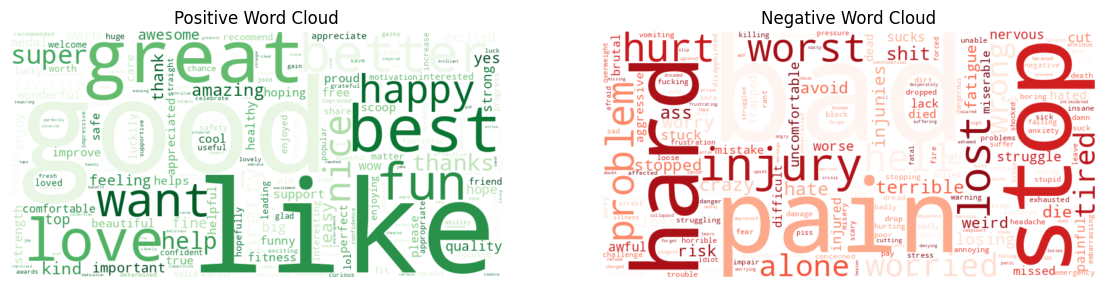

In [ ]:
# Here we use the tokens along with their afinn scores to plot their respective word clouds

pos_tokens = {t: s for t, s in zip(token_df['token'], token_df['score']) if s > 0}
neg_tokens = {t: abs(s) for t, s in zip(token_df['token'], token_df['score']) if s < 0}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate_from_frequencies(pos_tokens)
plt.imshow(wc_pos, interpolation="bilinear"); plt.axis("off"); plt.title("Positive Word Cloud")

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(neg_tokens)
plt.imshow(wc_neg, interpolation="bilinear"); plt.axis("off"); plt.title("Negative Word Cloud")

plt.show()

Now we will perform the same analyses (excluded author and temporal analyses, which are not meaningful here) for the comments.

In [ ]:
# Create the dataset containing all the comments along with their affin score

afinn = Afinn()

results = []

for i, row in df.iterrows():
    try:
        comment_ids = ast.literal_eval(row["comments_str"])
        if not comment_ids:
            continue

        fullnames = [f"t1_{cid}" for cid in comment_ids]

        for j in range(0, len(fullnames), 100):
            batch = fullnames[j: j+100]
            comments = list(reddit.info(batch))

            for comment in comments:
                results.append({
                    "comment_id": comment.id,
                    "comment_text": comment.body,
                    "raw_afinn_score": afinn.score(comment.body)
                })
    except Exception as e:
        pass

df_afinn = pd.DataFrame(results)

In [ ]:
# Preprocess the raw comment texts

def preprocess_data(data):
    data = data.astype(str).str.replace(r'https?://[^\s]+|www\.[^\s]+|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^\s]*)?', ' ', regex=True) # cleaning all kinds of links from the text column.
    data = data.astype(str).str.replace(r"[^\w\s]", " ", regex=True) # cleaning special characters using regular expressions (we keep the numbers)
    lower_text = data.str.lower() # lower case all the text

    # tokenization
    w_tokenizer= TweetTokenizer() # Apply tokenization to extract the single words
    words = lower_text.apply(w_tokenizer.tokenize)

    # delete english stopwords
    stop_words = set(stopwords.words('english'))
    words = words.apply(lambda toks: [w for w in toks if w not in stop_words])

    return pd.DataFrame(words)

In [ ]:
# Add to the dataset the tokens column, the preprocessed text column and the afinn score for the latter

df_afinn['tokens'] = preprocess_data(df_afinn['comment_text'])
df_afinn['clean_text'] = df_afinn['tokens'].apply(lambda tokens: " ".join(tokens))
df_afinn['prep_afinn'] = df_afinn['clean_text'].apply(afinn.score)

In [ ]:
df_afinn.head()

comment_id                                       comment_text  \
0    c34ja51                                          [deleted]   
1    c34jbyb  Generally I break out the gloves FIRST. I'm on...   
2    c34hxzy  I clearly am wearing way too much stuff when I...   
3    c34j6r1  I love how long the canadians wait to bust out...   
4    c34islj  Hmm, I thought I liked to skimp on warm-weathe...   

   raw_afinn_score                                             tokens  \
0              0.0                                          [deleted]   
1              2.0  [generally, break, gloves, first, posting, com...   
2              1.0    [clearly, wearing, way, much, stuff, run, cold]   
3              3.0         [love, long, canadians, wait, bust, pants]   
4              7.0  [hmm, thought, liked, skimp, warm, weather, cl...   

                                          clean_text  prep_afinn  
0                                            deleted         0.0  
1  generally break gloves first posting comment l...         2.0  
2            clearly wearing way much stuff run cold         1.0  
3                love long canadians wait bust pants         3.0  
4  hmm thought liked skimp warm weather clothes s...         7.0

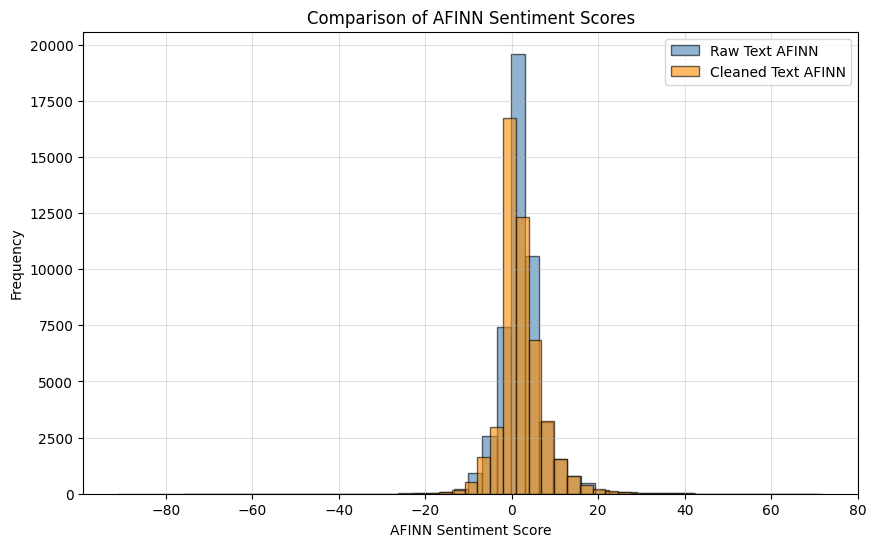

In [ ]:
# Absolute afinn score comparison between raw text and preprocessed text

plt.figure(figsize=(10, 6))

plt.hist(df_afinn['raw_afinn_score'], bins=50, alpha=0.6, color='steelblue', edgecolor='black', label='Raw Text AFINN')

plt.hist(df_afinn['prep_afinn'], bins=50, alpha=0.6, color='darkorange', edgecolor='black', label='Cleaned Text AFINN')

plt.grid(alpha=0.4)
plt.xlabel("AFINN Sentiment Score")
plt.ylabel("Frequency")
plt.title("Comparison of AFINN Sentiment Scores")
plt.legend()
plt.show()

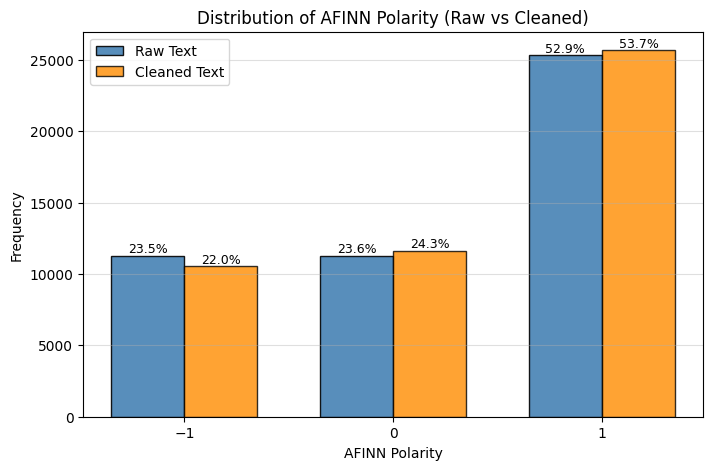

In [ ]:
# Polarity comparison between raw text and preprocessed text

def map_afinn(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

df_afinn['afinn_label'] = df_afinn['raw_afinn_score'].apply(map_afinn)
df_afinn['prep_afinn_label'] = df_afinn['prep_afinn'].apply(map_afinn)

plt.figure(figsize=(8, 5))

counts_raw = df_afinn['afinn_label'].value_counts().sort_index()
counts_clean = df_afinn['prep_afinn_label'].value_counts().sort_index()
total_raw = counts_raw.sum()
total_clean = counts_clean.sum()

bar_width = 0.35
x = [-1, 0, 1]

bars_raw = plt.bar([p - bar_width/2 for p in x], counts_raw.values, width=bar_width, color='steelblue', edgecolor='black', alpha=0.9, label='Raw Text')
bars_clean = plt.bar([p + bar_width/2 for p in x], counts_clean.values, width=bar_width, color='darkorange', edgecolor='black', alpha=0.8, label='Cleaned Text')

for bar, count in zip(bars_raw, counts_raw.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_raw:.1%}", ha='center', va='bottom', fontsize=9)
for bar, count in zip(bars_clean, counts_clean.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_clean:.1%}", ha='center', va='bottom', fontsize=9)

plt.xticks(x)
plt.grid(alpha=0.4, axis='y')
plt.xlabel("AFINN Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of AFINN Polarity (Raw vs Cleaned)")
plt.legend()
plt.show()


In [ ]:
all_tokens = [token for tokens in df_afinn['tokens'] for token in tokens]
len(all_tokens)

1145570

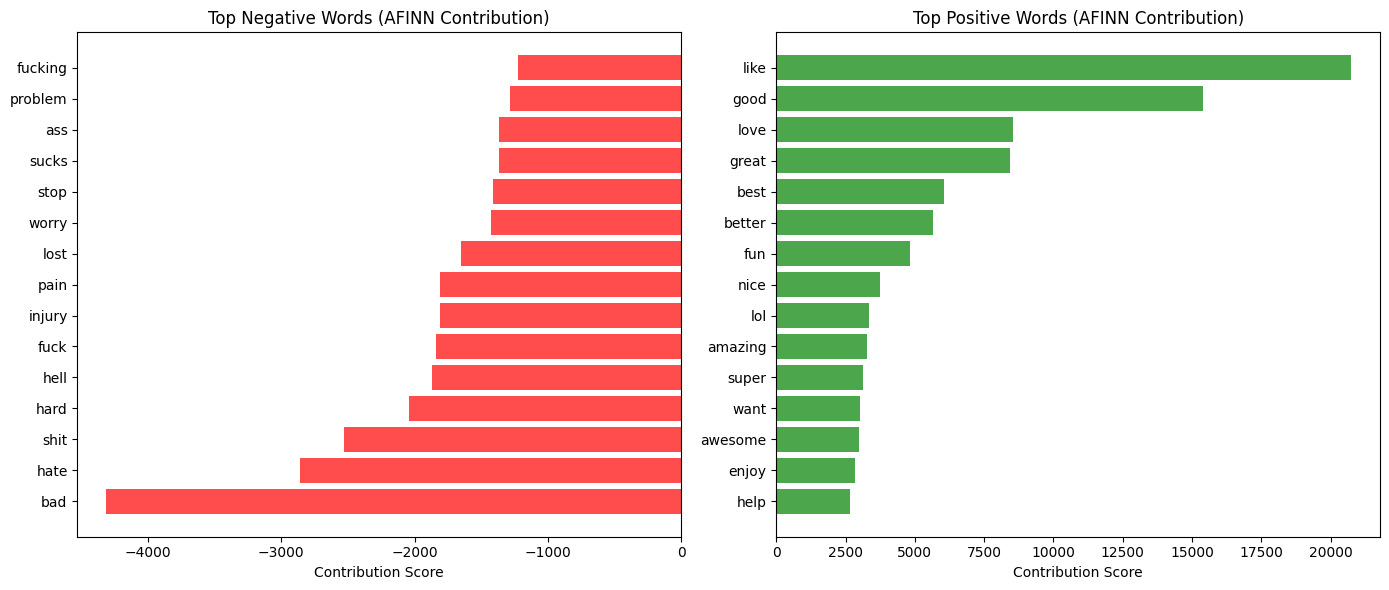

In [ ]:
# Create a token dataset using the tokens, frequencies and individual afinn scores

scored_tokens = [(t, afinn.score(t)) for t in all_tokens if afinn.score(t) != 0]
token_freq = Counter([t for t, s in scored_tokens])

token_contrib = {}
for token, score in scored_tokens:
    token_contrib[token] = token_contrib.get(token, 0) + score

token_df = pd.DataFrame({
    'token': list(token_contrib.keys()),
    'score': list(token_contrib.values()),
    'freq': [token_freq[t] for t in token_contrib.keys()]
})

token_df = token_df.sort_values('score')

# Plot best and worst polarizing words

top_negative = token_df.head(15)
top_positive = token_df.tail(15)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.barh(top_negative['token'], top_negative['score'], color='red', alpha=0.7)
plt.title("Top Negative Words (AFINN Contribution)")
plt.xlabel("Contribution Score")

plt.subplot(1,2,2)
plt.barh(top_positive['token'], top_positive['score'], color='green', alpha=0.7)
plt.title("Top Positive Words (AFINN Contribution)")
plt.xlabel("Contribution Score")

plt.tight_layout()
plt.show()

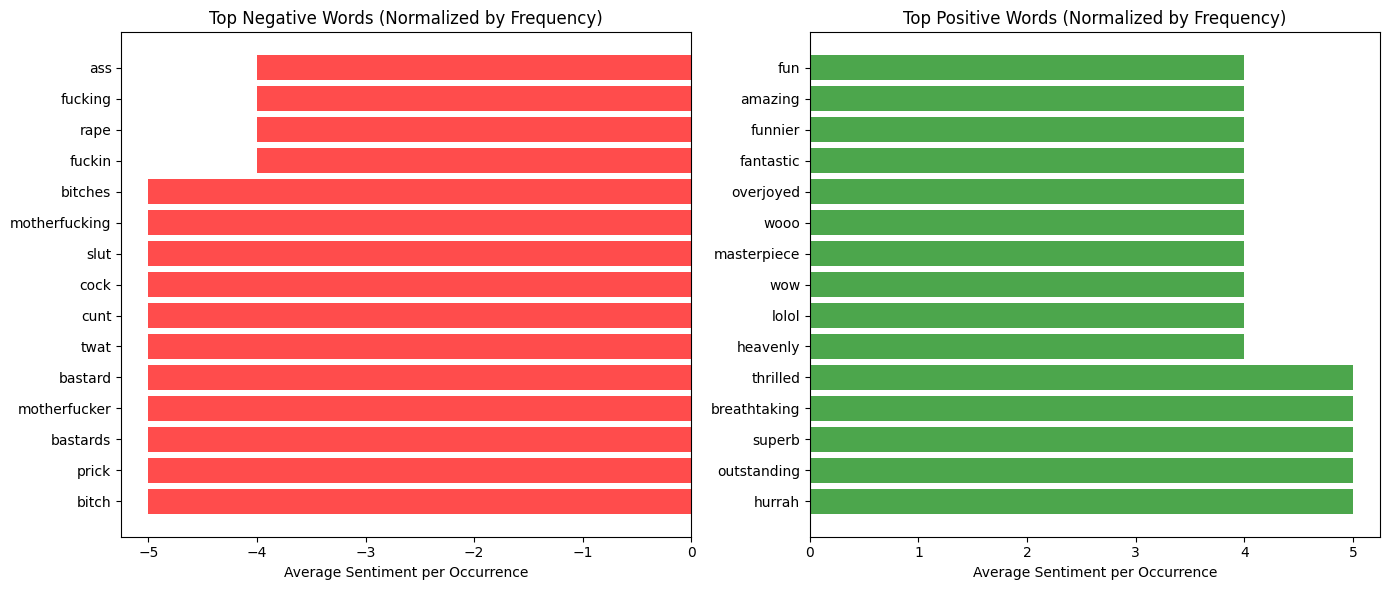

In [ ]:
# Normalized plot (which words characterize polarity more for occurrence)

token_df['avg_score'] = token_df['score'] / token_df['freq']

top_pos_norm = token_df.sort_values('avg_score', ascending=False).head(15)
top_neg_norm = token_df.sort_values('avg_score').head(15)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(top_neg_norm['token'], top_neg_norm['avg_score'], color='red', alpha=0.7)
plt.title("Top Negative Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.subplot(1,2,2)
plt.barh(top_pos_norm['token'], top_pos_norm['avg_score'], color='green', alpha=0.7)
plt.title("Top Positive Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.tight_layout()
plt.show()

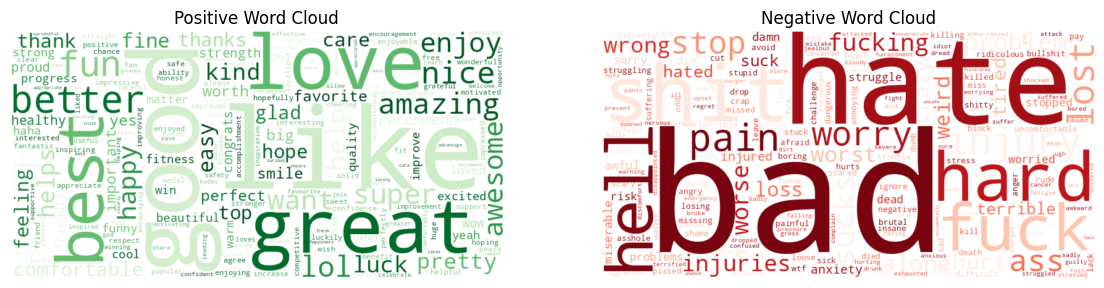

In [ ]:
# Here we use the tokens along with their afinn scores to plot their respective word clouds

pos_tokens = {t: s for t, s in zip(token_df['token'], token_df['score']) if s > 0}
neg_tokens = {t: abs(s) for t, s in zip(token_df['token'], token_df['score']) if s < 0}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate_from_frequencies(pos_tokens)
plt.imshow(wc_pos, interpolation="bilinear"); plt.axis("off"); plt.title("Positive Word Cloud")

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(neg_tokens)
plt.imshow(wc_neg, interpolation="bilinear"); plt.axis("off"); plt.title("Negative Word Cloud")

plt.show()

### VADER

Now that we have done the sentiment analysis using the AFINN scoring, we will use VADER, an automatically-generated sentiment lexicon, in order to compare the results obatined using both methods.

In [ ]:
# Method to calculate the vader score for a given sentence.

def calculate_vader_score(sentence):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(sentence)
  return sentiment_dict['compound']

Note that for the VADER analysis, we use the raw text with some minimal preprocessing, since VADER is more sensible to stop words and to upper/lower case.

In [ ]:
# Preprocess the raw comment texts

def preprocess_data(data):
    data = data.astype(str).str.replace(r'https?://[^\s]+|www\.[^\s]+|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^\s]*)?', ' ', regex=True) # cleaning all kinds of links from the text column.
    cleaned_text = data.str.replace(r'\s+', ' ', regex=True).str.strip() # cleaning extra whitespace

    # tokenization
    w_tokenizer = TweetTokenizer()
    raw_tokens = cleaned_text.apply(w_tokenizer.tokenize)

    return pd.DataFrame({
        'cleaned_text': cleaned_text,
        'tokens': raw_tokens
    })

processed_text = preprocess_data(content_df['text'])
content_df['vader_text'] = processed_text['cleaned_text']
content_df['vader_tokens'] = processed_text['tokens']

In [ ]:
# Vader calculation.

content_df['vader_score'] = content_df['vader_text'].apply(calculate_vader_score)
content_df.head()

author         created_utc     id  score  \
0           Can37 2011-12-02 01:59:55  mwy3x    335   
1  foreveranewbie 2011-12-15 19:12:23  ne3wl     10   
2   PKLKickballer 2012-02-22 17:43:22  q15p3    808   
3      Squints753 2012-03-22 18:15:24  r8oop      1   
4    DingDongerer 2012-09-11 15:15:03  zpmd7    152   

                                               title  upvote_ratio  \
0  Comprehensive guide to what to wear for winter...          0.95   
1                                c242k Training Plan          0.78   
2                           You shouldn't be winded!          0.97   
3  In week 3 of beginner's program, can't run mor...          1.00   
4  As a runner I struggle with running vs. liftin...          0.97   

                                    matched_keywords           category  \
0  winter running OR summer running OR spring run...   seasonal_running   
1  marathon OR half marathon OR 10k OR 5k OR couc...      race_training   
2  wildfire OR air quality OR extreme heat OR ice...     weather_events   
3  jogging OR start running OR get in shape OR be...   general_interest   
4  lockdown OR covid OR pandemic OR quarantine OR...  pandemic_lockdown   

                                                text  \
0  Comprehensive guide to what to wear for winter...   
1  c242k Training PlanThis is [The Plan](https://...   
2  You shouldn't be winded!I've seen a few posts ...   
3  In week 3 of beginner's program, can't run mor...   
4  As a runner I struggle with running vs. liftin...   

                                           text_proc  ...  engagement_rate  \
0  ['comprehensive', 'guide', 'wear', 'winter', '...  ...         0.107143   
1  ['c242k', 'training', 'planthis', 'plan', 'bas...  ...         0.545455   
2  ['winded', 'seen', 'posts', 'week', 'newer', '...  ...         0.075402   
3  ['week', '3', 'beginner', 'program', 'run', '2...  ...         1.000000   
4  ['runner', 'struggle', 'running', 'vs', 'lifti...  ...         0.339869   

   afinn afinn_label                                             tokens  \
0    2.0           1      [comprehensive, guide, wear, winter, running]   
1    4.0           1  [c242k, training, planthis, plan, based, advic...   
2   37.0           1  [winded, seen, posts, week, newer, runners, ge...   
3   -2.0          -1  [week, 3, beginner, program, run, 2, minutes, ...   
4    6.0           1  [runner, struggle, running, vs, lifting, like,...   

                                          clean_text  new_afinn  \
0            comprehensive guide wear winter running        2.0   
1  c242k training planthis plan based advice reci...        6.0   
2  winded seen posts week newer runners getting w...       38.0   
3  week 3 beginner program run 2 minutes without ...        0.0   
4  runner struggle running vs lifting like lose m...        6.0   

   new_afinn_label                                         vader_text  \
0                1  Comprehensive guide to what to wear for winter...   
1                1  c242k Training PlanThis is [The Plan]( based o...   
2                1  You shouldn't be winded!I've seen a few posts ...   
3                0  In week 3 of beginner's program, can't run mor...   
4                1  As a runner I struggle with running vs. liftin...   

                                        vader_tokens vader_score  
0  [Comprehensive, guide, to, what, to, wear, for...      0.2500  
1  [c242k, Training, PlanThis, is, [, The, Plan, ...      0.9906  
2  [You, shouldn't, be, winded, !, I've, seen, a,...      0.9989  
3  [In, week, 3, of, beginner's, program, ,, can'...     -0.8422  
4  [As, a, runner, I, struggle, with, running, vs...      0.6191  

[5 rows x 26 columns]

In [ ]:
content_df['vader_score'].value_counts()

vader_score
 0.0000    14
 0.9991     5
 0.9989     4
 0.9994     4
 0.3612     4
           ..
 0.9166     1
 0.6597     1
 0.9517     1
 0.9884     1
-0.6419     1
Name: count, Length: 436, dtype: int64

Following the same analysis structure used for AFINN, we first plot the absolute score distirbution. Differently from AFINN, the score can range from -1 to +1, thus expect the distirbution to be skewed towards +1, following a mostly positive trend.

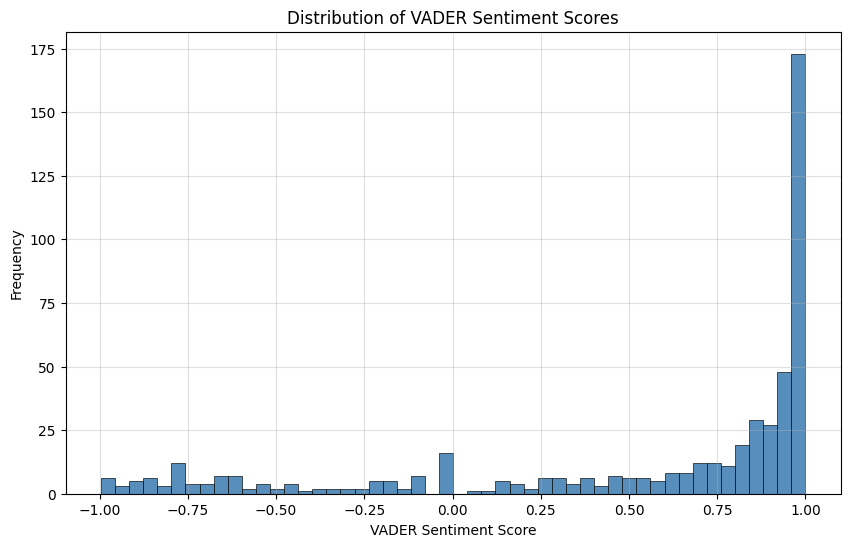

In [ ]:
# Plot the histogram of the absolute VADER scores

plt.figure(figsize=(10, 6))

content_df['vader_score'].hist(bins=50, alpha=0.9, color='steelblue', edgecolor='black', linewidth=0.5)

plt.grid(alpha=0.4)
plt.xlabel("VADER Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of VADER Sentiment Scores")
plt.show()

We follow with the polarity exploration.

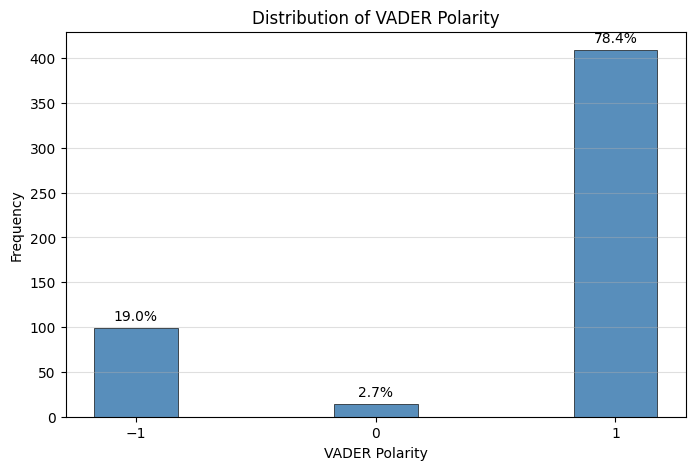

In [ ]:
# Calculate and plot the polarity obtained through the vader scores

def map_vader(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

content_df['vader_label'] = content_df['vader_score'].apply(map_vader)

plt.figure(figsize=(8, 5))

counts = content_df['vader_label'].value_counts().sort_index()
total = counts.sum()

bars = plt.bar(counts.index, counts.values, width=0.35, color='steelblue', edgecolor='black', linewidth=0.5, alpha=0.9)

for bar, count in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total:.1%}", ha='center', va='bottom', fontsize=10)

plt.xticks([-1, 0, 1])
plt.grid(alpha=0.4, axis='y')
plt.xlabel("VADER Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of VADER Polarity")
plt.show()


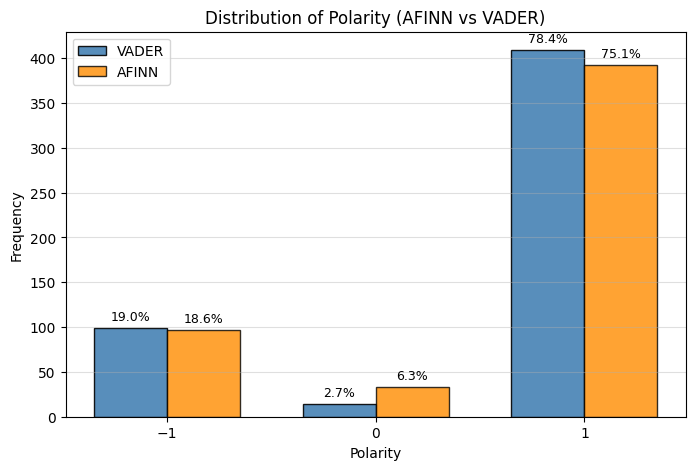

In [ ]:
# Polarity comparison between affin and vader

plt.figure(figsize=(8, 5))

vader_counts = content_df['vader_label'].value_counts().sort_index()
affin_counts = content_df['new_afinn_label'].value_counts().sort_index()
total_vader = vader_counts.sum()
total_affin = affin_counts.sum()

bar_width = 0.35
x = [-1, 0, 1]

bars_raw = plt.bar([p - bar_width/2 for p in x], vader_counts.values, width=bar_width, color='steelblue', edgecolor='black', alpha=0.9, label='VADER')
bars_clean = plt.bar([p + bar_width/2 for p in x], affin_counts.values, width=bar_width, color='darkorange', edgecolor='black', alpha=0.8, label='AFINN')

for bar, count in zip(bars_raw, vader_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_vader:.1%}", ha='center', va='bottom', fontsize=9)
for bar, count in zip(bars_clean, affin_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{count/total_affin:.1%}", ha='center', va='bottom', fontsize=9)

plt.xticks(x)
plt.grid(alpha=0.4, axis='y')
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Polarity (AFINN vs VADER)")
plt.legend()
plt.show()


Comparing VADER with AFINN highlihts that VADER tends to slightly more postiviely estimate the sentiment of the posts. Moreover it is slightly more decisive in assigning a positive or negative label, differently from AFINN which has been more conservative (it assigned more neutral labels).

The next exploration is about authors.

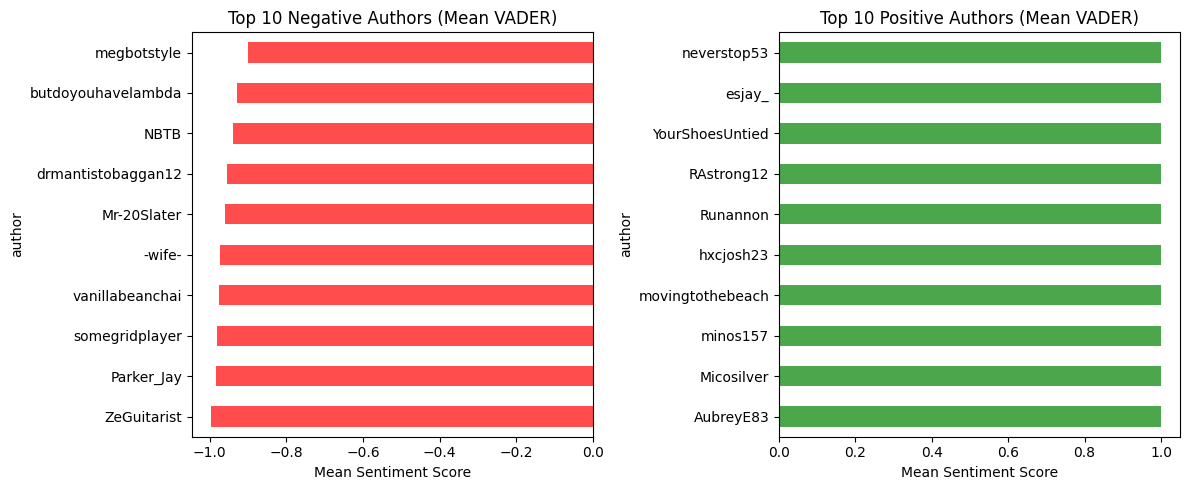

In [ ]:
# Best and worst authors comparison between raw text and preprocessed text

author_mean = content_df.groupby('author')['vader_score'].mean().sort_values()

top_negative = author_mean.head(10)
top_positive = author_mean.tail(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_negative.plot(kind='barh', color='red', alpha=0.7)
plt.title("Top 10 Negative Authors (Mean VADER)")
plt.xlabel("Mean Sentiment Score")

plt.subplot(1, 2, 2)
top_positive.plot(kind='barh', color='green', alpha=0.7)
plt.title("Top 10 Positive Authors (Mean VADER)")
plt.xlabel("Mean Sentiment Score")

plt.tight_layout()
plt.show()


We can observe few similarities between AFINN and VADER in the choice of the best and worst authors.

Next we analyze the evolution of sentiment over time using the same rolling window structure.

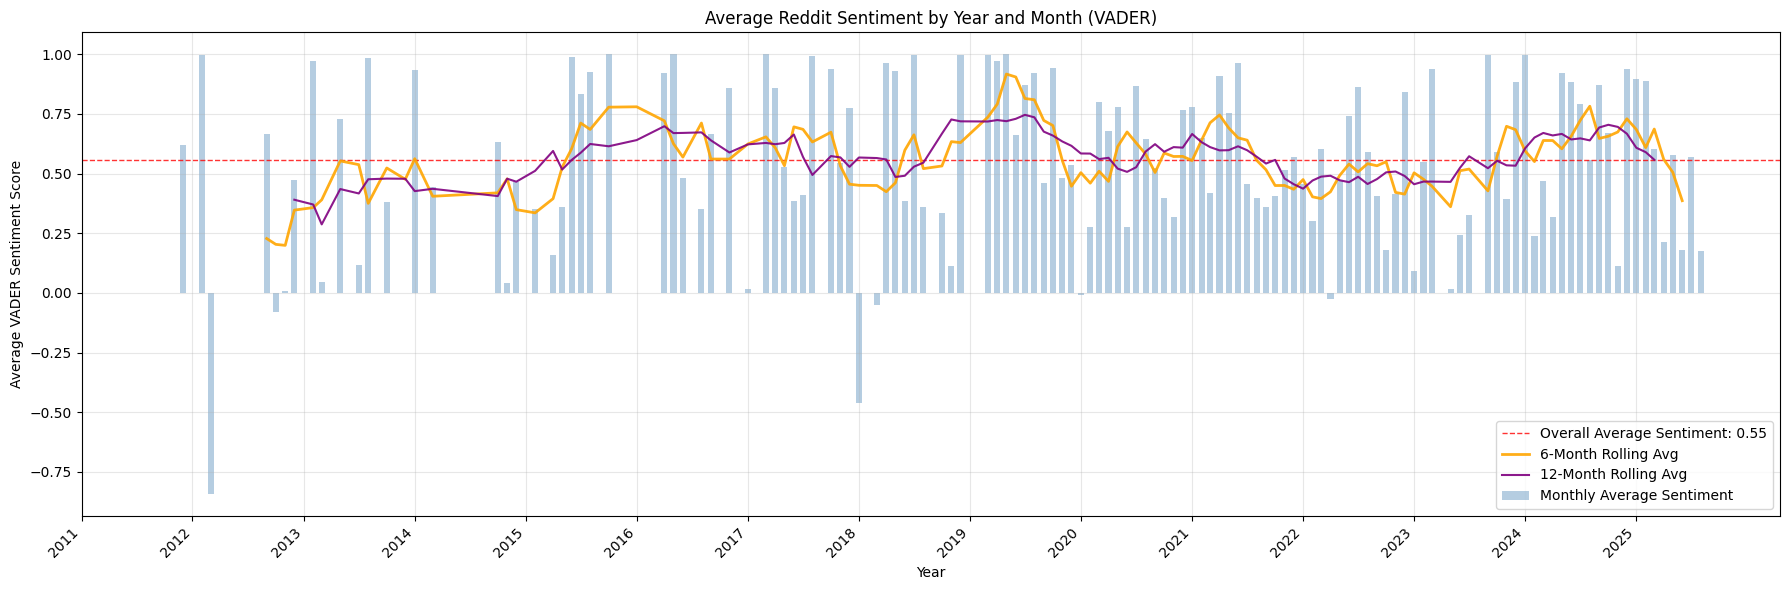

In [ ]:
# Plot sentiment (obtained using afinn scores from the preprocessed text) over time

sentiment_trends = content_df.groupby(['year', 'month'])['vader_score'].mean().reset_index()
sentiment_trends['date'] = pd.to_datetime(sentiment_trends[['year', 'month']].assign(day=1))
sentiment_trends = sentiment_trends.sort_values('date')

overall_avg = sentiment_trends['vader_score'].mean()

sentiment_trends['rolling_avg_6m'] = sentiment_trends['vader_score'].rolling(window=6, center=True).mean()
sentiment_trends['rolling_avg_12m'] = sentiment_trends['vader_score'].rolling(window=12, center=True).mean()

plt.figure(figsize=(18, 6))

bars = plt.bar(sentiment_trends['date'], sentiment_trends['vader_score'], width=20, alpha=0.4, color='steelblue', label='Monthly Average Sentiment')

plt.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Overall Average Sentiment: {overall_avg:.2f}')

plt.plot(sentiment_trends['date'], sentiment_trends['rolling_avg_6m'], color='orange', linewidth=2, alpha=0.9, label='6-Month Rolling Avg')
plt.plot(sentiment_trends['date'], sentiment_trends['rolling_avg_12m'], color='purple', linewidth=1.5, alpha=0.9, label='12-Month Rolling Avg')

years = range(sentiment_trends['year'].min(), sentiment_trends['year'].max() + 1)
year_dates = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.xticks(year_dates, years, rotation=45, ha='right')

plt.xlabel("Year")
plt.ylabel("Average VADER Sentiment Score")
plt.title("Average Reddit Sentiment by Year and Month (VADER)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


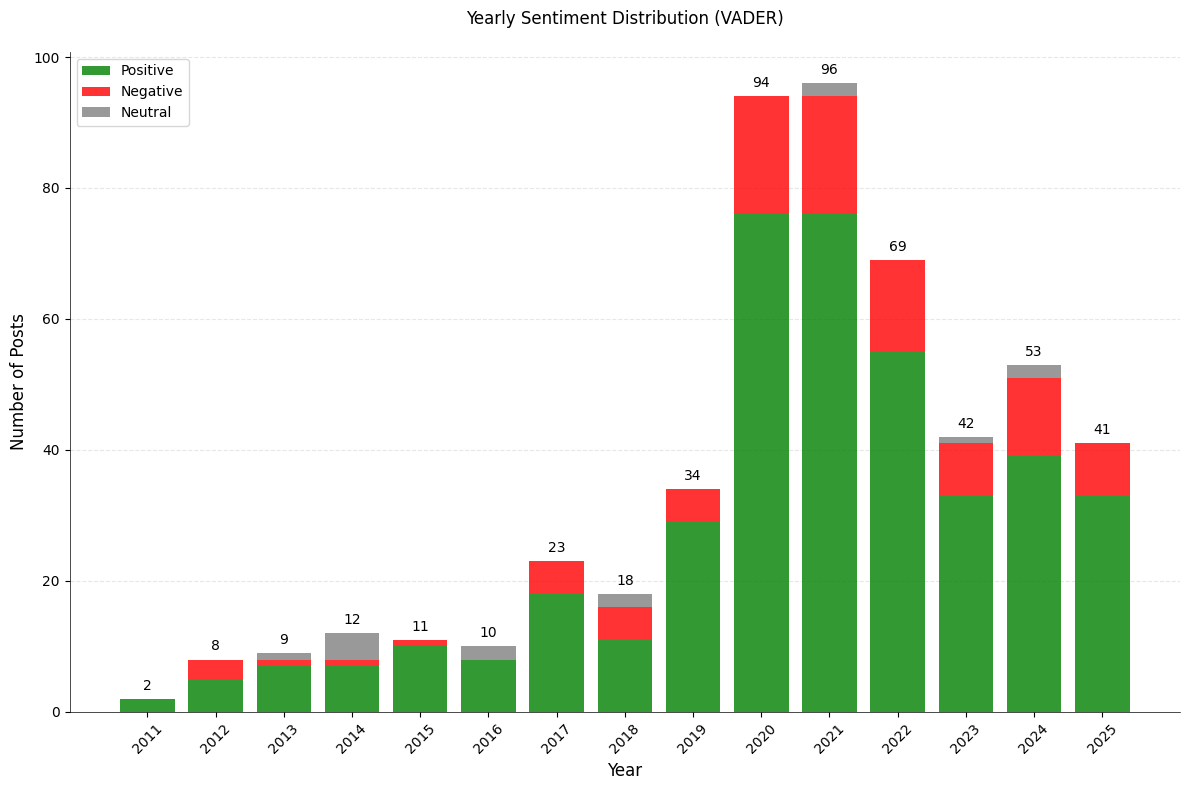

In [ ]:
# Yearly sentiment distribution

yearly_sentiment_data_vader = []

for year in years:
    year_data = content_df[content_df['year'] == year]

    if len(year_data) > 0:
        vader_pos = (year_data['vader_label'] == 1).sum()
        vader_neg = (year_data['vader_label'] == -1).sum()
        vader_neu = (year_data['vader_label'] == 0).sum()

        yearly_sentiment_data_vader.append({
            'year': year,
            'total': len(year_data),
            'positive': vader_pos,
            'negative': vader_neg,
            'neutral': vader_neu
        })

yearly_df_vader = pd.DataFrame(yearly_sentiment_data_vader)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

x_positions = range(len(yearly_df_vader))

ax.bar(x_positions, yearly_df_vader['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(x_positions, yearly_df_vader['negative'], bottom=yearly_df_vader['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(x_positions, yearly_df_vader['neutral'], bottom=yearly_df_vader['positive'] + yearly_df_vader['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_xticks(x_positions)
ax.set_xticklabels(yearly_df_vader['year'], rotation=45)

ax.set_title('Yearly Sentiment Distribution (VADER)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

for i, total in enumerate(yearly_df_vader['total']):
    ax.text(i, total + max(yearly_df_vader['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

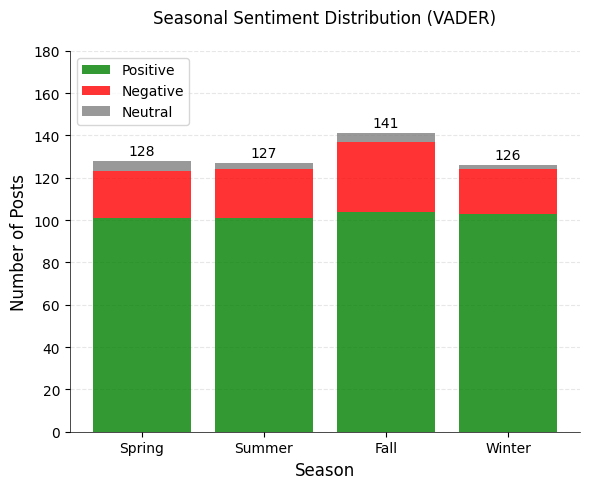

In [ ]:
# Seasonal sentiment distribution

seasonal_sentiment_data_vader = []
for season in season_order:
    season_months = [month for month, s in season_mapping.items() if s == season]
    season_data = content_df[content_df['month'].isin(season_months)]

    if len(season_data) > 0:
        vader_pos = (season_data['vader_label'] == 1).sum()
        vader_neg = (season_data['vader_label'] == -1).sum()
        vader_neu = (season_data['vader_label'] == 0).sum()

        seasonal_sentiment_data_vader.append({
            'season': season,
            'total': len(season_data),
            'positive': vader_pos,
            'negative': vader_neg,
            'neutral': vader_neu
        })

seasonal_df_vader = pd.DataFrame(seasonal_sentiment_data_vader)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.bar(seasonal_df_vader['season'], seasonal_df_vader['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(seasonal_df_vader['season'], seasonal_df_vader['negative'], bottom=seasonal_df_vader['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(seasonal_df_vader['season'], seasonal_df_vader['neutral'], bottom=seasonal_df_vader['positive'] + seasonal_df_vader['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Seasonal Sentiment Distribution (VADER)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Season', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim(0, 180)

for i, (season, total) in enumerate(zip(seasonal_df_vader['season'], seasonal_df_vader['total'])):
    ax.text(i, total + max(seasonal_df_vader['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

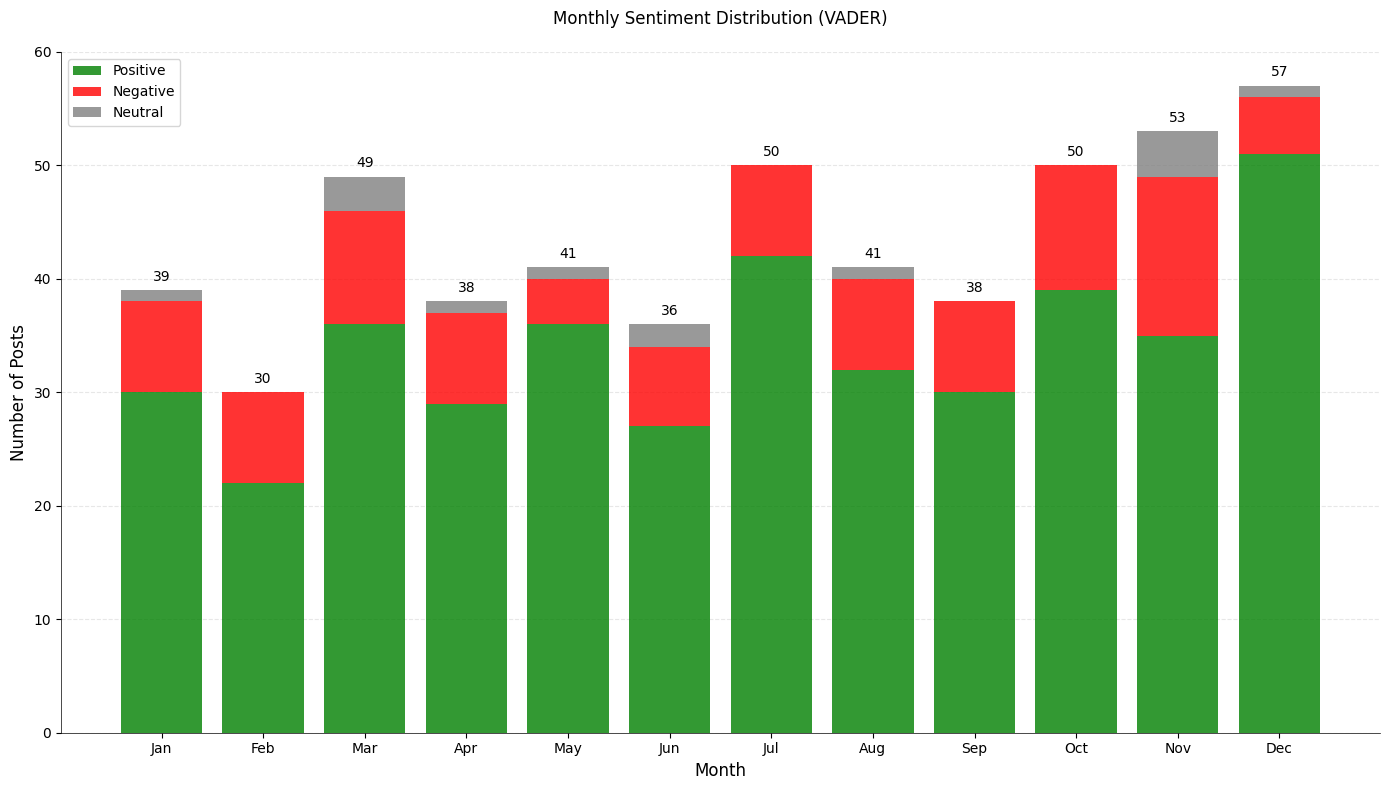

In [ ]:
# Monthly sentiment distribution

monthly_sentiment_data_vader = []
for month_num in range(1, 13):
    month_data = content_df[content_df['month'] == month_num]
    if len(month_data) > 0:
        vader_pos = (month_data['vader_label'] == 1).sum()
        vader_neg = (month_data['vader_label'] == -1).sum()
        vader_neu = (month_data['vader_label'] == 0).sum()

        monthly_sentiment_data_vader.append({
            'month': month_names[month_num],
            'month_num': month_num,
            'total': len(month_data),
            'positive': vader_pos,
            'negative': vader_neg,
            'neutral': vader_neu
        })

monthly_df_vader = pd.DataFrame(monthly_sentiment_data_vader)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.bar(monthly_df_vader['month'], monthly_df_vader['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(monthly_df_vader['month'], monthly_df_vader['negative'], bottom=monthly_df_vader['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(monthly_df_vader['month'], monthly_df_vader['neutral'], bottom=monthly_df_vader['positive'] + monthly_df_vader['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Monthly Sentiment Distribution (VADER)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim(0, 60)

for i, (month, total) in enumerate(zip(monthly_df_vader['month'], monthly_df_vader['total'])):
    ax.text(i, total + max(monthly_df_vader['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

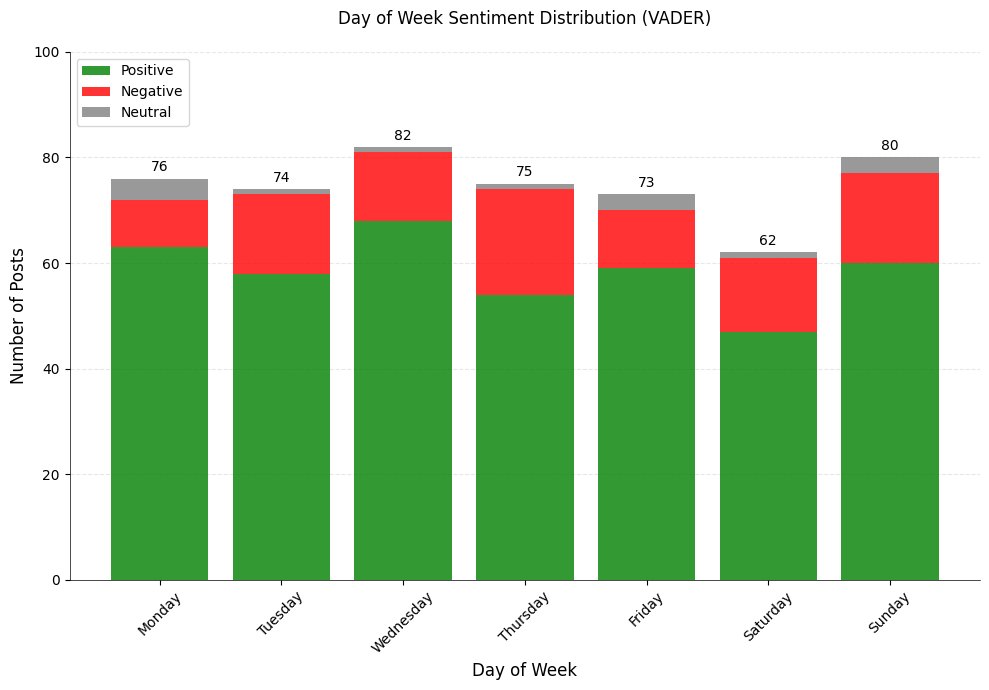

In [ ]:
# Daily sentiment distribution

dow_sentiment_data_vader = []
for day in dow_order:
    day_data = content_df[content_df['dow'] == day]

    if len(day_data) > 0:
        vader_pos = (day_data['vader_label'] == 1).sum()
        vader_neg = (day_data['vader_label'] == -1).sum()
        vader_neu = (day_data['vader_label'] == 0).sum()

        dow_sentiment_data_vader.append({
            'day': day,
            'total': len(day_data),
            'positive': vader_pos,
            'negative': vader_neg,
            'neutral': vader_neu
        })

dow_df_vader = pd.DataFrame(dow_sentiment_data_vader)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(dow_df_vader['day'], dow_df_vader['positive'], color=positive_color, alpha=0.8, label='Positive')
ax.bar(dow_df_vader['day'], dow_df_vader['negative'], bottom=dow_df_vader['positive'], color=negative_color, alpha=0.8, label='Negative')
ax.bar(dow_df_vader['day'], dow_df_vader['neutral'], bottom=dow_df_vader['positive'] + dow_df_vader['negative'], color=neutral_color, alpha=0.8, label='Neutral')

ax.set_title('Day of Week Sentiment Distribution (VADER)', pad=20)
ax.set_ylabel('Number of Posts', fontsize=12)
ax.set_xlabel('Day of Week', fontsize=12)
ax.legend(loc='upper left', frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 100)

for i, (day, total) in enumerate(zip(dow_df_vader['day'], dow_df_vader['total'])):
    ax.text(i, total + max(dow_df_vader['total']) * 0.01, str(total), ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.show()

Although VADER is more suitable for full sentences rather than with individual words, we try to understand the individual word point of view of VADER, to see whether there are similarities as for the authors with AFINN.

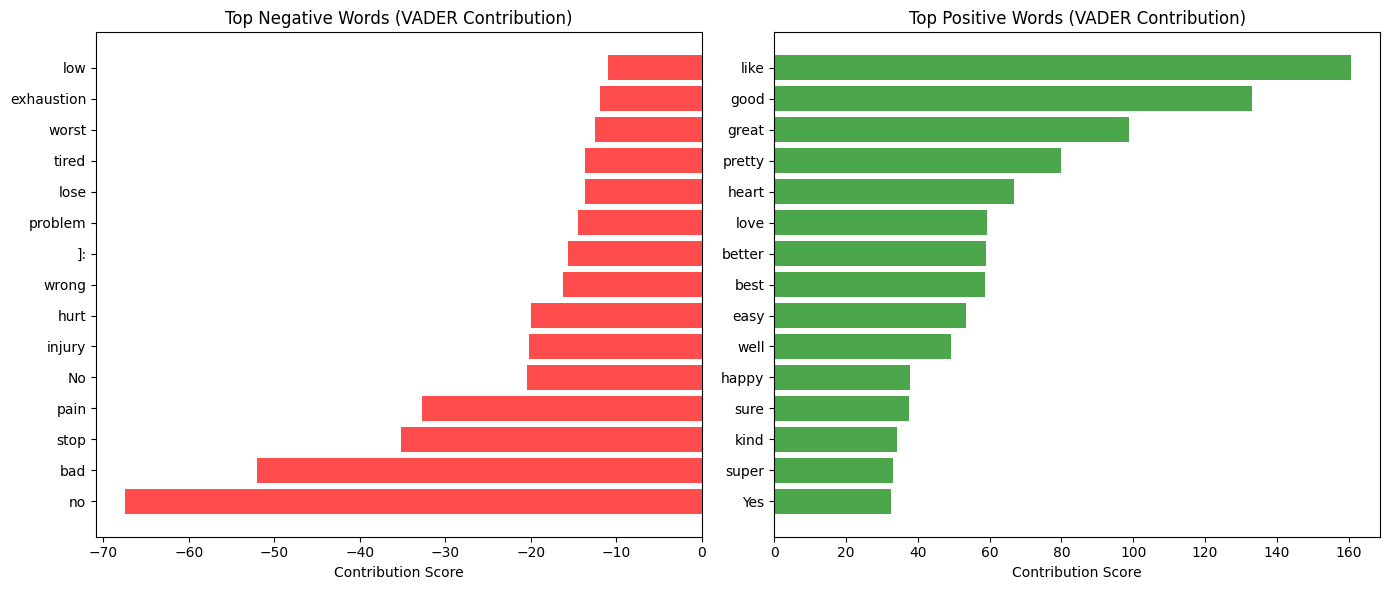

In [ ]:
# Top positive and top negative individual words analysis

analyzer = SentimentIntensityAnalyzer()

all_tokens = [token for tokens in content_df['vader_tokens'] for token in tokens]
len(all_tokens)

scored_tokens_vader = [(t, analyzer.polarity_scores(t)['compound']) for t in all_tokens if analyzer.polarity_scores(t)['compound'] != 0]

token_freq_vader = Counter([t for t, s in scored_tokens_vader])

token_contrib_vader = {}
for token, score in scored_tokens_vader:
    token_contrib_vader[token] = token_contrib_vader.get(token, 0) + score

token_df_vader = pd.DataFrame({
    'token': list(token_contrib_vader.keys()),
    'score': list(token_contrib_vader.values()),
    'freq': [token_freq_vader[t] for t in token_contrib_vader.keys()]
})

token_df_vader = token_df_vader.sort_values('score')

top_negative_vader = token_df_vader.head(15)
top_positive_vader = token_df_vader.tail(15)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.barh(top_negative_vader['token'], top_negative_vader['score'], color='red', alpha=0.7)
plt.title("Top Negative Words (VADER Contribution)")
plt.xlabel("Contribution Score")

plt.subplot(1,2,2)
plt.barh(top_positive_vader['token'], top_positive_vader['score'], color='green', alpha=0.7)
plt.title("Top Positive Words (VADER Contribution)")
plt.xlabel("Contribution Score")

plt.tight_layout()
plt.show()

As done for AFINN, we look also to the normalized score, so to understand which words characterize polarity more per occurrence

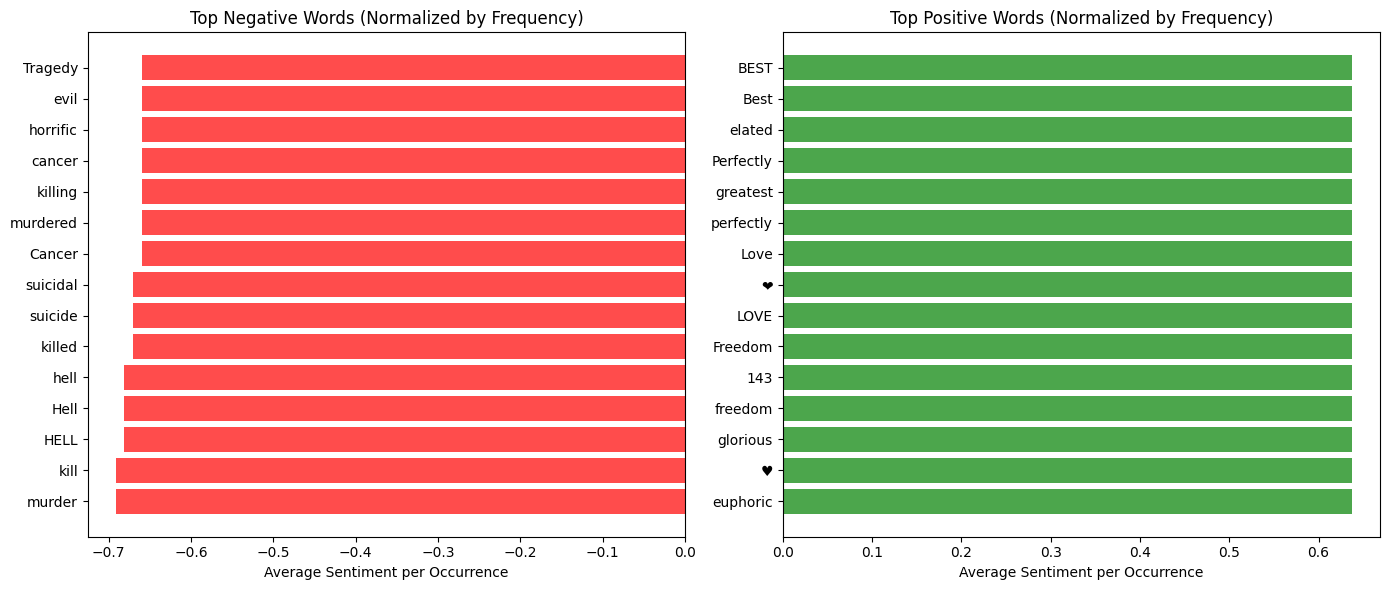

In [ ]:
# Normalized plot

token_df_vader['avg_score'] = token_df_vader['score'] / token_df_vader['freq']

top_pos_norm = token_df_vader.sort_values('avg_score', ascending=False).head(15)
top_neg_norm = token_df_vader.sort_values('avg_score').head(15)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(top_neg_norm['token'], top_neg_norm['avg_score'], color='red', alpha=0.7)
plt.title("Top Negative Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.subplot(1,2,2)
plt.barh(top_pos_norm['token'], top_pos_norm['avg_score'], color='green', alpha=0.7)
plt.title("Top Positive Words (Normalized by Frequency)")
plt.xlabel("Average Sentiment per Occurrence")

plt.tight_layout()
plt.show()

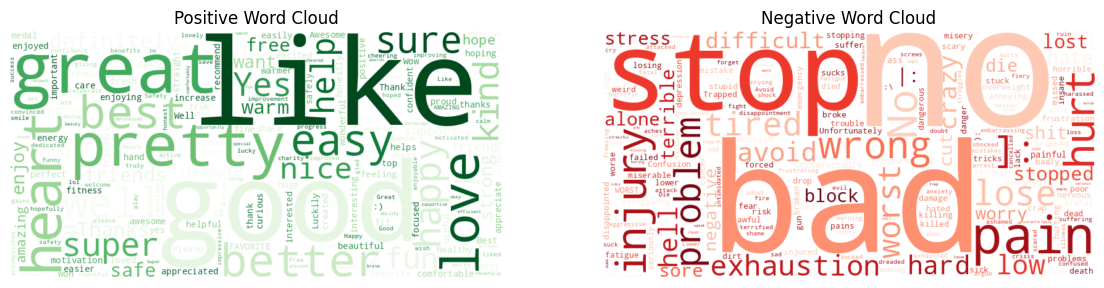

In [ ]:
# Here we use the tokens along with their vader scores to plot their respective word clouds

pos_tokens = {t: s for t, s in zip(token_df_vader['token'], token_df_vader['score']) if s > 0}
neg_tokens = {t: abs(s) for t, s in zip(token_df_vader['token'], token_df_vader['score']) if s < 0}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate_from_frequencies(pos_tokens)
plt.imshow(wc_pos, interpolation="bilinear"); plt.axis("off"); plt.title("Positive Word Cloud")

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(neg_tokens)
plt.imshow(wc_neg, interpolation="bilinear"); plt.axis("off"); plt.title("Negative Word Cloud")

plt.show()

So far we see that more ore less the results are not so different with respect to AFINN. VADER seems less conservative than AFINN. We try now to understand whether it could be more effective.

In [ ]:
# Discordant sentences comparison

discordant = content_df[content_df['new_afinn_label'] != content_df['vader_label']]


afinn_neg_vader_pos = discordant[(discordant['new_afinn_label'] == -1) & (discordant['vader_label'] == 1)]
afinn_pos_vader_neg = discordant[(discordant['new_afinn_label'] == 1) & (discordant['vader_label'] == -1)]

print("🔴 AFINN negativa, VADER positiva:")
display(afinn_neg_vader_pos[['vader_text', 'new_afinn_label', 'vader_score', 'vader_label']].head(5))

print("\n🟢 AFINN positiva, VADER negativa:")
display(afinn_pos_vader_neg[['vader_text', 'new_afinn_label', 'vader_score', 'vader_label']].head(5))

🔴 AFINN negativa, VADER positiva:


vader_text  new_afinn_label  \
23  Seeking advice about half marathon trainingI a...               -1   
24  Is there any way I can train enough to complet...               -1   
25  Morning run happened to cut through a 50 mile ...               -1   
50  Beginner runner confusedHello r/running I am a...               -1   
55  When out for a run and thinking about taking a...               -1   

    vader_score  vader_label  
23       0.4554            1  
24       0.8114            1  
25       0.6674            1  
50       0.4012            1  
55       0.3252            1


🟢 AFINN positiva, VADER negativa:


vader_text  new_afinn_label  \
6   5 months ago I couldn't run 100m with out been...                1   
27  What are your "go-to" winter gear items?With w...                1   
63  I have no one to celebrate this with, it's not...                1   
66  The Drug Runners: The Tarahumara, famous for t...                1   
85  Running is one of the few problems you can run...                1   

    vader_score  vader_label  
6       -0.0804           -1  
27      -0.4696           -1  
63      -0.2167           -1  
66      -0.1779           -1  
85      -0.7503           -1

In [ ]:
print(afinn_neg_vader_pos.iloc[3]['vader_text'])

Beginner runner confusedHello r/running I am a 24 year old male who recently decided to get off the couch and get in shape. I found I really enjoy just walking/jogging/running. The problem I seem to have is the information I seem to be getting from people at the gym I run at. People keep telling me my heart rate needs to be at 125bpm when running but when I do just a start up walk my heart rate is already 120. I am confused how I am supposed to achieve this and don't wanna start off doing something wrong.


In [ ]:
print(afinn_pos_vader_neg.iloc[0]['vader_text'])

5 months ago I couldn't run 100m with out been out of breath. I then decided to quite smoking and join the army this is the biggest distance I have done so far. I start basic training in a months time and couldn't be happier.


For VADER, we ignore the comment analysis since we expect more or less similar results as AFINN, as observed so far. To prove this assumption, we compute the correlation among the VADER and AFINN scores (for the preprocessed text)

In [ ]:
# Correlation computation

pearson_corr, pearson_p = pearsonr(content_df['new_afinn'], content_df['vader_score'])
spearman_corr, spearman_p = spearmanr(content_df['new_afinn'], content_df['vader_score'])

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3e})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3e})")

Pearson correlation: 0.470 (p=4.921e-30)
Spearman correlation: 0.856 (p=3.326e-151)


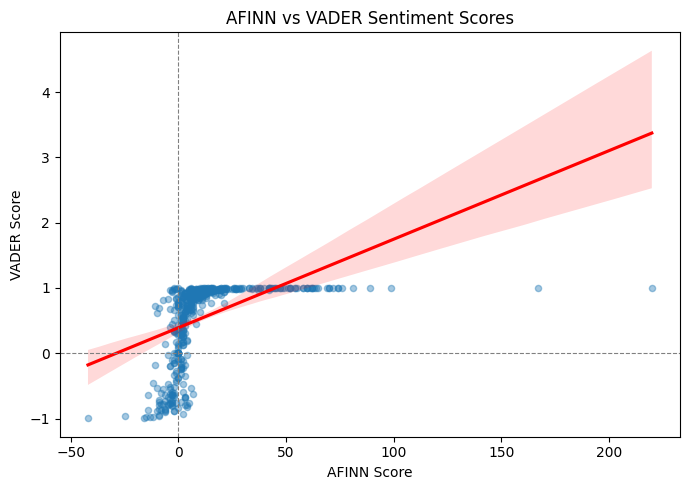

In [ ]:
# Linear regression

plt.figure(figsize=(7, 5))
sns.regplot(
    data=content_df,
    x="new_afinn",
    y="vader_score",
    scatter_kws={'alpha':0.4, 's':20},
    line_kws={'color':'red'}
)

plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)

plt.xlabel("AFINN Score")
plt.ylabel("VADER Score")
plt.title("AFINN vs VADER Sentiment Scores")
plt.tight_layout()
plt.show()


- Pearson ≈ 0.47 → there is a moderate linear relationship: when AFINN increases, VADER also tends to increase, but not in a perfectly proportional way.
- Spearman ≈ 0.86 → there is a very strong monotonic relationship: the two systems rank the texts in the same order from more negative to more positive, even if the absolute values do not match.

Finally, for visualization completeness, we plot a confusion matrix for the polarity labels.

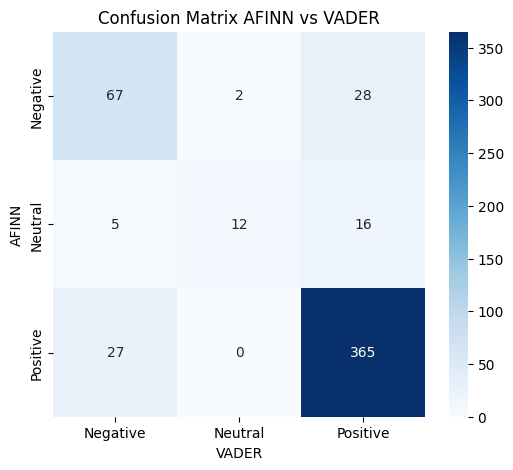

In [ ]:
cm = confusion_matrix(content_df['new_afinn_label'], content_df['vader_label'], labels=[-1, 0, 1])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("VADER")
plt.ylabel("AFINN")
plt.title("Confusion Matrix AFINN vs VADER")
plt.show()

# Emotions Detection

So far we have explored sentiment using 2 different techniques, the first using manually-generated lexicon technique (AFINN) and the second using a automatically-generated lexicon technique (VADER).

Within this section we are going instead to analyze the emotions underlying these sentiment, performing thus emotion detection.

For such task, we use NRCLex, a lexicon-based approach which relies on word-emotion association.

Being NRCLex based on the NRC emotion lexicon, it relies on connecting each word to an emotion, thus using the cleaned version of the text, without stop words and special characters may be suboptimal and possibly mask or hide some emotions.

Hence, to perform emotion detection, we will apply a very basic preprocessing, removing just extra spaces and unwanted hyperlinks.

In [ ]:
# Preprocessing for emotion detection

def emotion_preprocessing(text):
    text = re.sub(r'https?://[^\s]+|www\.[^\s]+|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^\s]*)?', ' ', text)
    text = re.sub(r'\[deleted\]|\[removed\]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

content_df['emotion_text'] = content_df['text'].apply(emotion_preprocessing)

In [ ]:
content_df['text'].iloc[1]

'c242k Training PlanThis is [The Plan](https://docs.google.com/spreadsheet/ccc?key=0AqhCam1ul2KbdGQ3Q21xb0t0cHNudXIwbGlZa3VsWXc) based on the advice I recieved in my [previous thread](http://www.reddit.com/r/running/comments/naia2/couch_to_marathon_in_1_year/).  I basically have the end of c25k (it\'s a bit weird because I\'m changing from tracking time to tracking distance) stacked with the [10K](http://www.halhigdon.com/10ktraining/10knovice.htm), [1/2 Marathon](http://www.halhigdon.com/halfmarathon/novice.htm), and  [Novice 1 Marathon](http://www.halhigdon.com/marathon/MaraNovice1.html) training programs from Hal Higdon\'s website.  I also used the [Novice Post-Marathon Training Guide](http://www.halhigdon.com/postmarathon/zeroweek0.html) to add rest weeks to the end of each stage as well as a full rest and rebuild following the 1/2 Marathon.\n\nThe plan includes 6 races:  2 10Ks, a 5K, a 1/2 marathon, a 10M, and the Marine Corp Marathon.  I\'m still looking for the first 10K but th

In [ ]:
content_df['emotion_text'].iloc[1]

'c242k Training PlanThis is [The Plan]( based on the advice I recieved in my [previous thread]( I basically have the end of c25k (it\'s a bit weird because I\'m changing from tracking time to tracking distance) stacked with the [10K]( [1/2 Marathon]( and [Novice 1 Marathon]( training programs from Hal Higdon\'s website. I also used the [Novice Post-Marathon Training Guide]( to add rest weeks to the end of each stage as well as a full rest and rebuild following the 1/2 Marathon. The plan includes 6 races: 2 10Ks, a 5K, a 1/2 marathon, a 10M, and the Marine Corp Marathon. I\'m still looking for the first 10K but the rest of them match up (more or less) with the original plans. And yes, one of them is called "Keep Your Colon Rollin". I\'m pretty happy with it. In my mind it\'s broken up into three chunks. 1. Get to the 10K 2. Get to the Half 3. Do the Marine Corp Marathon That\'ll give me short term goals (weekly mileage), mid-term (races), and long term (the marathon). I realize this kin

In [ ]:
# Emotion detection application

def get_emotions(sentence):
  emotion_text = NRCLex(sentence)
  return emotion_text.raw_emotion_scores

content_df['emotions'] = content_df['emotion_text'].apply(get_emotions)
content_df[['emotion_text', 'emotions']].head(3)

emotion_text  \
0  Comprehensive guide to what to wear for winter...   
1  c242k Training PlanThis is [The Plan]( based o...   
2  You shouldn't be winded!I've seen a few posts ...   

                                            emotions  
0         {'positive': 1, 'trust': 2, 'negative': 1}  
1  {'trust': 7, 'disgust': 2, 'negative': 6, 'ant...  
2  {'anticipation': 20, 'negative': 14, 'sadness'...

Now that we have identified the emotions for each submissions, we will analyze their distributions, to understand the most common and the less common.

In [ ]:
# Creation of a dataframe with all emotions and their counts

emotion_df = pd.DataFrame(content_df['emotions'].tolist()).fillna(0)
emotion_df

positive  trust  negative  disgust  anticipation  joy  anger  fear  \
0         1.0    2.0       1.0      0.0           0.0  0.0    0.0   0.0   
1        11.0    7.0       6.0      2.0          11.0  4.0    3.0   5.0   
2        21.0   18.0      14.0      2.0          20.0  7.0    4.0   7.0   
3         5.0    3.0       1.0      0.0           0.0  2.0    0.0   1.0   
4         6.0    3.0       5.0      3.0           3.0  4.0    4.0   5.0   
..        ...    ...       ...      ...           ...  ...    ...   ...   
517       3.0    3.0       1.0      1.0           1.0  2.0    3.0   2.0   
518       4.0    2.0       2.0      1.0           6.0  2.0    1.0   1.0   
519       8.0    3.0       9.0      0.0           6.0  2.0    3.0   6.0   
520       2.0    3.0       4.0      0.0           8.0  1.0    0.0   3.0   
521      10.0    4.0       9.0      1.0           3.0  2.0    5.0   5.0   

     sadness  surprise  
0        0.0       0.0  
1        4.0       1.0  
2       10.0       5.0  
3        0.0       0.0  
4        5.0       2.0  
..       ...       ...  
517      0.0       1.0  
518      1.0       1.0  
519      5.0       0.0  
520      0.0       0.0  
521      3.0       0.0  

[522 rows x 10 columns]

In [ ]:
emotion_counts = emotion_df.sum().sort_values(ascending=False)
emotion_counts

positive        5698.0
anticipation    3894.0
negative        3626.0
trust           3431.0
joy             2454.0
sadness         1927.0
fear            1915.0
anger           1395.0
surprise        1297.0
disgust          956.0
dtype: float64

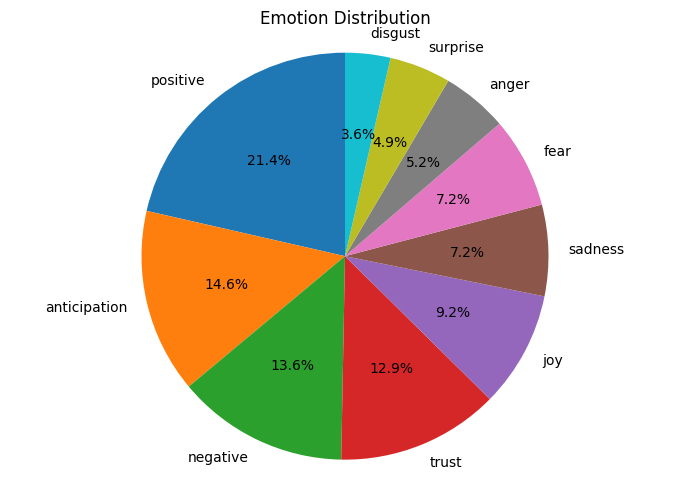

In [ ]:
# Emotion distribution pie chart

plt.figure(figsize=(7, 5))

plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Emotion Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

The next analysis involves searching the top authors by emotion and understanding whether their post are predominatly positive, negative or neutral.

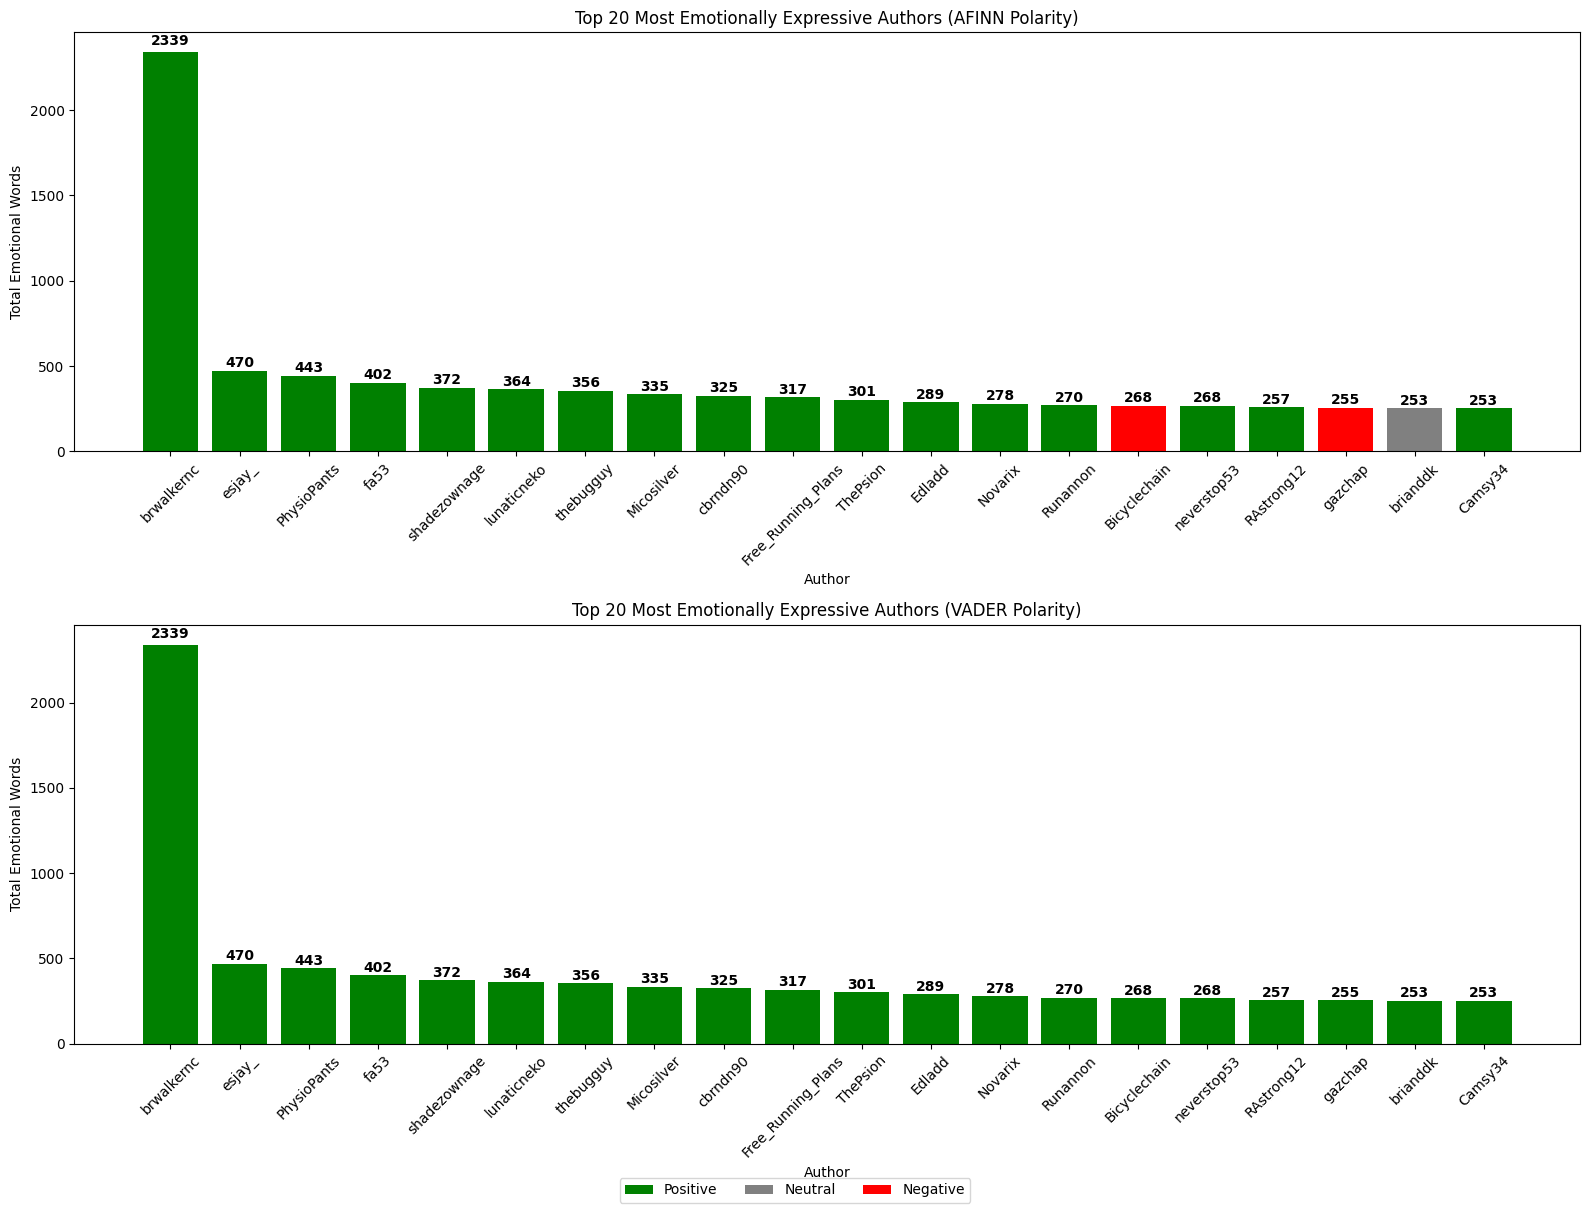

In [ ]:
# Top 20 emotional authors plot from polarity standpoint (VADER vs AFINN).

content_df['emotion_counts'] = content_df['emotions'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else 0)
top_emotional_authors = content_df.groupby('author')['emotion_counts'].sum().sort_values(ascending=False).head(20)

def get_author_polarity_color(author, label_column):
    author_data = content_df[content_df['author'] == author]
    polarity_counts = author_data[label_column].value_counts()

    if polarity_counts.empty:
        return 'grey'

    polarity = polarity_counts.index[0]

    if polarity == 1:
        return 'green'
    elif polarity == -1:
        return 'red'
    else:
        return 'grey'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# AFINN Plot
afinn_colors = [get_author_polarity_color(author, 'new_afinn_label') for author in top_emotional_authors.index]
bars1 = ax1.bar(range(len(top_emotional_authors)), top_emotional_authors.values, color=afinn_colors)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Top 20 Most Emotionally Expressive Authors (AFINN Polarity)')
ax1.set_xlabel('Author')
ax1.set_ylabel('Total Emotional Words')
ax1.set_xticks(range(len(top_emotional_authors)))
ax1.set_xticklabels(top_emotional_authors.index, rotation=45)

# VADER Plot
vader_colors = [get_author_polarity_color(author, 'vader_label') for author in top_emotional_authors.index]
bars2 = ax2.bar(range(len(top_emotional_authors)), top_emotional_authors.values, color=vader_colors)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Top 20 Most Emotionally Expressive Authors (VADER Polarity)')
ax2.set_xlabel('Author')
ax2.set_ylabel('Total Emotional Words')
ax2.set_xticks(range(len(top_emotional_authors)))
ax2.set_xticklabels(top_emotional_authors.index, rotation=45)

legend_elements = [Patch(facecolor='green', label='Positive'),
                   Patch(facecolor='grey', label='Neutral'),
                   Patch(facecolor='red', label='Negative')]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3)

plt.tight_layout()
plt.show()

This is consistent with the polarity distirbutions, VADER scores indeed were more positive than AFINN ones.

Finally, we analyze the emotions distributions of the comments, which we stored in the df_afinn dataframe during AFINN analysis.

In [ ]:
# Extract the comment texts, preprocess them and apply NRCLex

all_comments = df_afinn[['comment_id', 'comment_text']]
all_comments['emotion_text'] = all_comments['comment_text'].apply(emotion_preprocessing)
all_comments['emotions'] = all_comments['emotion_text'].apply(get_emotions)

all_comments

comment_id                                       comment_text  \
0        c34ja51                                          [deleted]   
1        c34jbyb  Generally I break out the gloves FIRST. I'm on...   
2        c34hxzy  I clearly am wearing way too much stuff when I...   
3        c34j6r1  I love how long the canadians wait to bust out...   
4        c34islj  Hmm, I thought I liked to skimp on warm-weathe...   
...          ...                                                ...   
47849    nbb4869  Start running in Boston and you will have the ...   
47850    nagtoce  The times I’ve been in Florida and run, I’ve n...   
47851    nagk9n2  When did we start expecting the whole universe...   
47852    nako8bw  Just FYI - it’s the law in Massachusetts to yi...   
47853    nalis7n  Running in south London. The running community...   

                                            emotion_text  \
0                                                          
1      Generally I break out the gloves FIRST. I'm on...   
2      I clearly am wearing way too much stuff when I...   
3      I love how long the canadians wait to bust out...   
4      Hmm, I thought I liked to skimp on warm-weathe...   
...                                                  ...   
47849  Start running in Boston and you will have the ...   
47850  The times I’ve been in Florida and run, I’ve n...   
47851  When did we start expecting the whole universe...   
47852  Just FYI - it’s the law in Massachusetts to yi...   
47853  Running in south London. The running community...   

                                                emotions  
0                                                     {}  
1                     {'surprise': 1, 'anticipation': 1}  
2                                        {'negative': 1}  
3      {'joy': 1, 'positive': 1, 'anticipation': 2, '...  
4      {'anticipation': 1, 'negative': 1, 'positive':...  
...                                                  ...  
47849                                                 {}  
47850                                                 {}  
47851  {'anticipation': 3, 'joy': 1, 'positive': 3, '...  
47852                        {'trust': 2, 'negative': 1}  
47853  {'positive': 1, 'fear': 1, 'negative': 3, 'sad...  

[47854 rows x 4 columns]

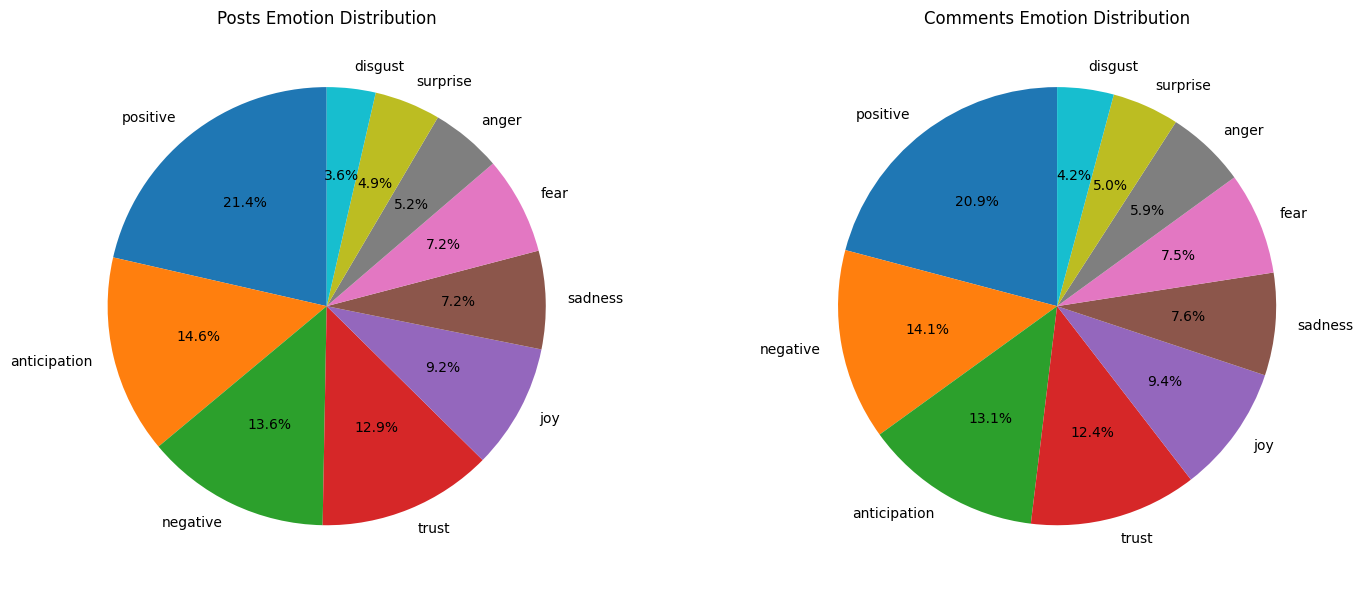

In [ ]:
# Emotion distribution pie chart (comments vs posts)

comment_emotion_df = pd.DataFrame(all_comments['emotions'].tolist()).fillna(0)
comment_emotion_counts = comment_emotion_df.sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Posts
emotion_counts.plot.pie(ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Posts Emotion Distribution')
ax1.set_ylabel('')

# Comments
comment_emotion_counts.plot.pie(ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Comments Emotion Distribution')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Considering that we have 522 posts and 47854 comments, surprisingly the emotion distributions remain more or less the same.


We assume that the posts generally drive the emotions in the comments, propagating the tone of the responses.

# Named Entity Recognition

In order to preserve the names and structures of the entities in the submissions, crucial for NER, we will use the same preprocessed texts as for emotion detection, resulted from a minimal preprocessing involving hyperlinks removal, reddit artifacts removal and extra spaces removal.

More specifically, for the NER task we will use the Spacy framework.

In [ ]:
# Perform entity extraction

nlp = en_core_web_sm.load()

def get_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

content_df['entities'] = content_df['emotion_text'].apply(get_entities)
content_df['entities'].head(3)

0                                     [(winter, DATE)]
1    [(10, CARDINAL), (Novice 1 Marathon, LAW), (Ha...
2    [(this week, DATE), (First, ORDINAL), (5, CARD...
Name: entities, dtype: object

Now that we have extracted the entities for each post, we will analyze as usually the distribution of the various entities across the posts.

In [ ]:
# Create a dataframe with all the entities and their frequencies

all_entities = []

for entity_list in content_df['entities']:
  all_entities.extend(entity_list)

entity_counter = Counter(all_entities)
entity_freq_df = pd.DataFrame(list(entity_counter.items()), columns=['entity', 'frequency'])
entity_freq_df = entity_freq_df.sort_values('frequency', ascending=False)
entity_freq_df[['text', 'label']] = pd.DataFrame(entity_freq_df['entity'].tolist(), index=entity_freq_df.index)

entity_freq_df

entity  frequency              text     label
12               (first, ORDINAL)        297             first   ORDINAL
74                 (5k, CARDINAL)        147                5k  CARDINAL
538                  (###, MONEY)        138               ###     MONEY
13                (one, CARDINAL)        124               one  CARDINAL
24                  (2, CARDINAL)        102                 2  CARDINAL
...                           ...        ...               ...       ...
4429  (10 or 20 percent, PERCENT)          1  10 or 20 percent   PERCENT
4430      (five percent, PERCENT)          1      five percent   PERCENT
4431  (five kilometers, QUANTITY)          1   five kilometers  QUANTITY
4432  (just 250 meters, QUANTITY)          1   just 250 meters  QUANTITY
4433  (more than 5,200, CARDINAL)          1   more than 5,200  CARDINAL

[4454 rows x 4 columns]

In [ ]:
print(f"Total unique entities found: {len(entity_freq_df)}")
print(f"\nTop 10 most frequent entities:\n")
print(entity_freq_df.head(10))

Total unique entities found: 4454

Top 10 most frequent entities:

               entity  frequency    text     label
12   (first, ORDINAL)        297   first   ORDINAL
74     (5k, CARDINAL)        147      5k  CARDINAL
538      (###, MONEY)        138     ###     MONEY
13    (one, CARDINAL)        124     one  CARDINAL
24      (2, CARDINAL)        102       2  CARDINAL
9       (5, CARDINAL)         96       5  CARDINAL
756     (0, CARDINAL)         91       0  CARDINAL
0      (winter, DATE)         82  winter      DATE
21    (two, CARDINAL)         74     two  CARDINAL
1      (10, CARDINAL)         74      10  CARDINAL


As we can see, there are some uselss entities, such as "###", which can be safely removed. We will apply some filtering, thus removing such entities and also pronouns, which we consider not relevant.

In [ ]:
# Filtering non relevant terms

def filter_running_entities(entity_freq_df, min_frequency=3):
    exclude_terms = {
        '###', '##', '#', '\-'
        'i', 'me', 'my', 'you', 'your', 'we', 'us', 'our'
    }

    filtered_df = entity_freq_df[
        (entity_freq_df['frequency'] >= min_frequency) &
        (~entity_freq_df['text'].str.lower().isin(exclude_terms)) &
        (entity_freq_df['text'].str.len() > 1)
    ].copy()

    return filtered_df

filtered_entities = filter_running_entities(entity_freq_df, min_frequency=3)

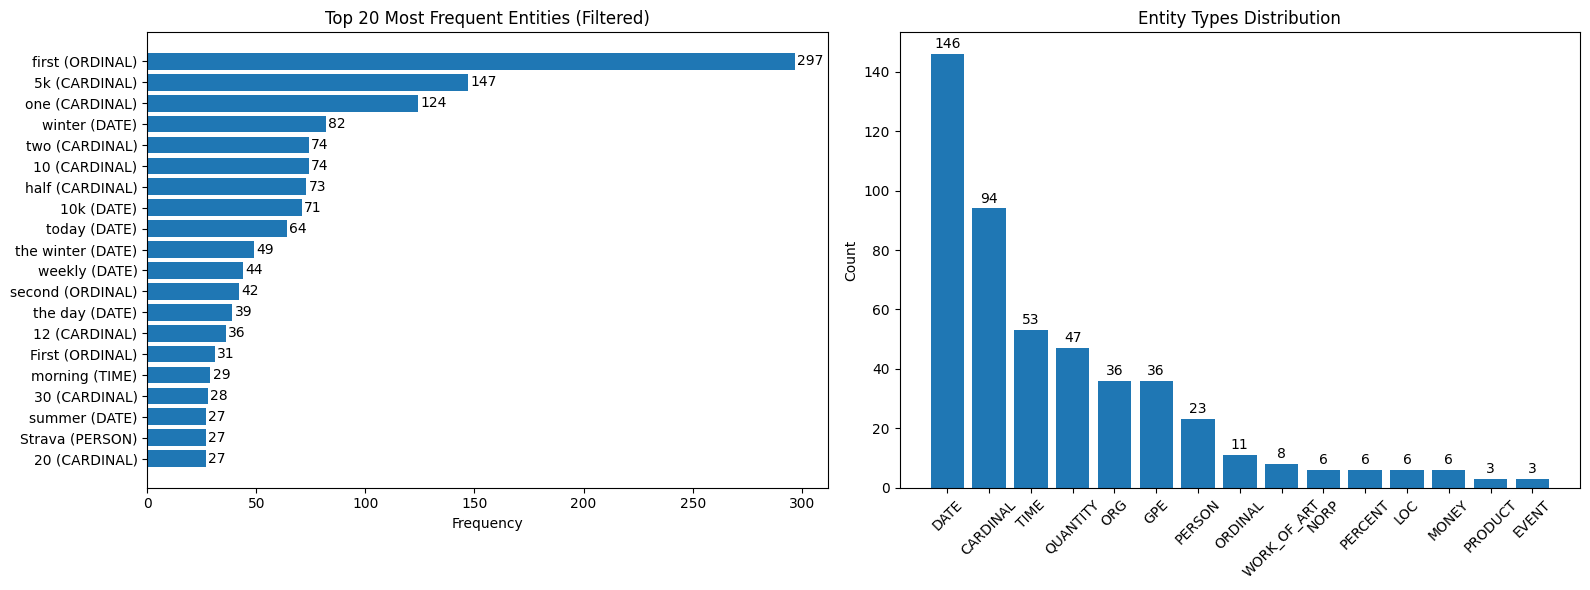

In [ ]:
# Plots top entities and entity types

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top entities
top_entities = filtered_entities.head(20)
bars1 = ax1.barh(range(len(top_entities)), top_entities['frequency'])
ax1.set_yticks(range(len(top_entities)))
ax1.set_yticklabels([f"{row['text']} ({row['label']})" for _, row in top_entities.iterrows()])
ax1.set_xlabel('Frequency')
ax1.set_title('Top 20 Most Frequent Entities (Filtered)')
ax1.invert_yaxis()

for i, (bar, freq) in enumerate(zip(bars1, top_entities['frequency'])):
    ax1.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(freq), ha='left', va='center')

# Entity types distribution
label_counts = filtered_entities['label'].value_counts()
bars2 = ax2.bar(range(len(label_counts)), label_counts.values)
ax2.set_xticks(range(len(label_counts)))
ax2.set_xticklabels(label_counts.index, rotation=45)
ax2.set_ylabel('Count')
ax2.set_title('Entity Types Distribution')

for bar, count in zip(bars2, label_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

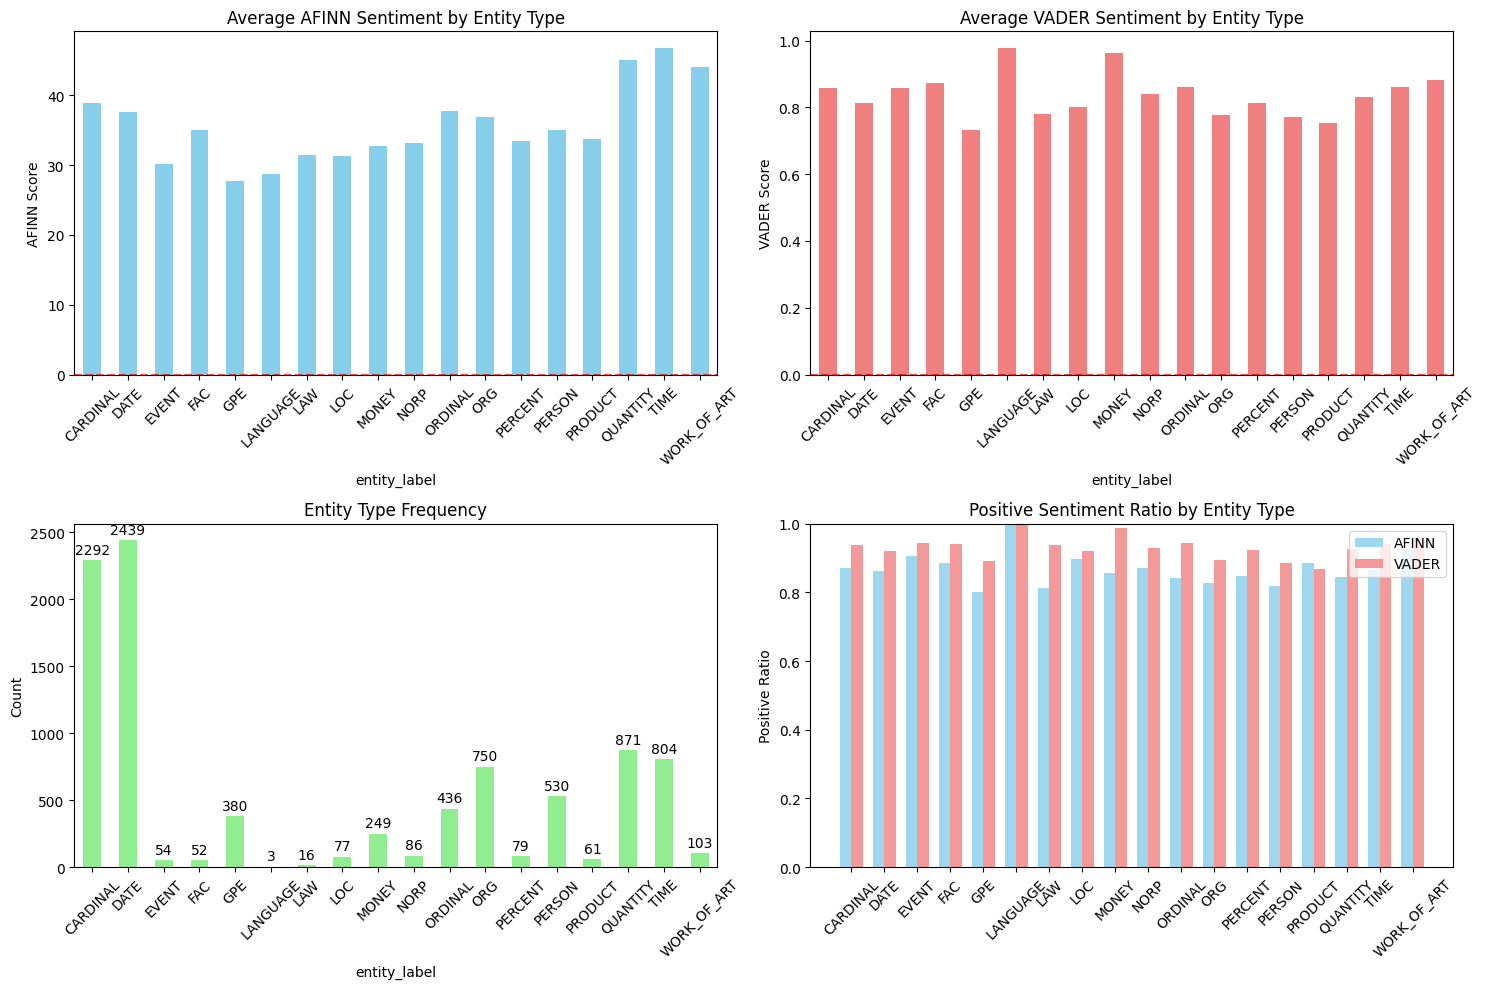

In [ ]:
# Entity type sentiment exploration

entity_sentiment_data = []
for idx, row in content_df.iterrows():
    afinn_score = row['new_afinn']
    afinn_polarity = row['new_afinn_label']
    vader_score = row['vader_score']
    vader_polarity = row['vader_label']

    for entity_text, entity_label in row['entities']:
        entity_sentiment_data.append({
            'entity_text': entity_text,
            'entity_label': entity_label,
            'afinn_score': afinn_score,
            'afinn_polarity': afinn_polarity,
            'vader_score': vader_score,
            'vader_polarity': vader_polarity
        })

entity_sentiment_df = pd.DataFrame(entity_sentiment_data)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sentiment_by_type = entity_sentiment_df.groupby('entity_label').agg({
    'afinn_score': ['mean', 'count'],
    'vader_score': 'mean',
    'afinn_polarity': lambda x: (x == 1).mean(),
    'vader_polarity': lambda x: (x == 1).mean()
})

# Flatten column names
sentiment_by_type.columns = ['afinn_mean', 'count', 'vader_mean', 'afinn_pos_ratio', 'vader_pos_ratio']

# 1. AFINN Mean Sentiment by Entity Type
sentiment_by_type['afinn_mean'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Average AFINN Sentiment by Entity Type')
ax1.set_ylabel('AFINN Score')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# 2. VADER Mean Sentiment by Entity Type
sentiment_by_type['vader_mean'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Average VADER Sentiment by Entity Type')
ax2.set_ylabel('VADER Score')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# 3. Entity Type Frequency
sentiment_by_type['count'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Entity Type Frequency')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)
for i, (bar, count) in enumerate(zip(ax3.patches, sentiment_by_type['count'])):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sentiment_by_type['count'])*0.01, str(int(count)), ha='center', va='bottom')

# 4. Positive Sentiment Ratio Comparison
x_pos = range(len(sentiment_by_type))
width = 0.35
ax4.bar([p - width/2 for p in x_pos], sentiment_by_type['afinn_pos_ratio'],
        width, label='AFINN', alpha=0.8, color='skyblue')
ax4.bar([p + width/2 for p in x_pos], sentiment_by_type['vader_pos_ratio'],
        width, label='VADER', alpha=0.8, color='lightcoral')
ax4.set_title('Positive Sentiment Ratio by Entity Type')
ax4.set_ylabel('Positive Ratio')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(sentiment_by_type.index, rotation=45)
ax4.legend()
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

At this point, we will analyze individual entity types to understand them more granularly and also to explore their sentiment contribution.

We will start analyzing locations (GPE, geopolitical entity with government and LOC, geographical places without administration).

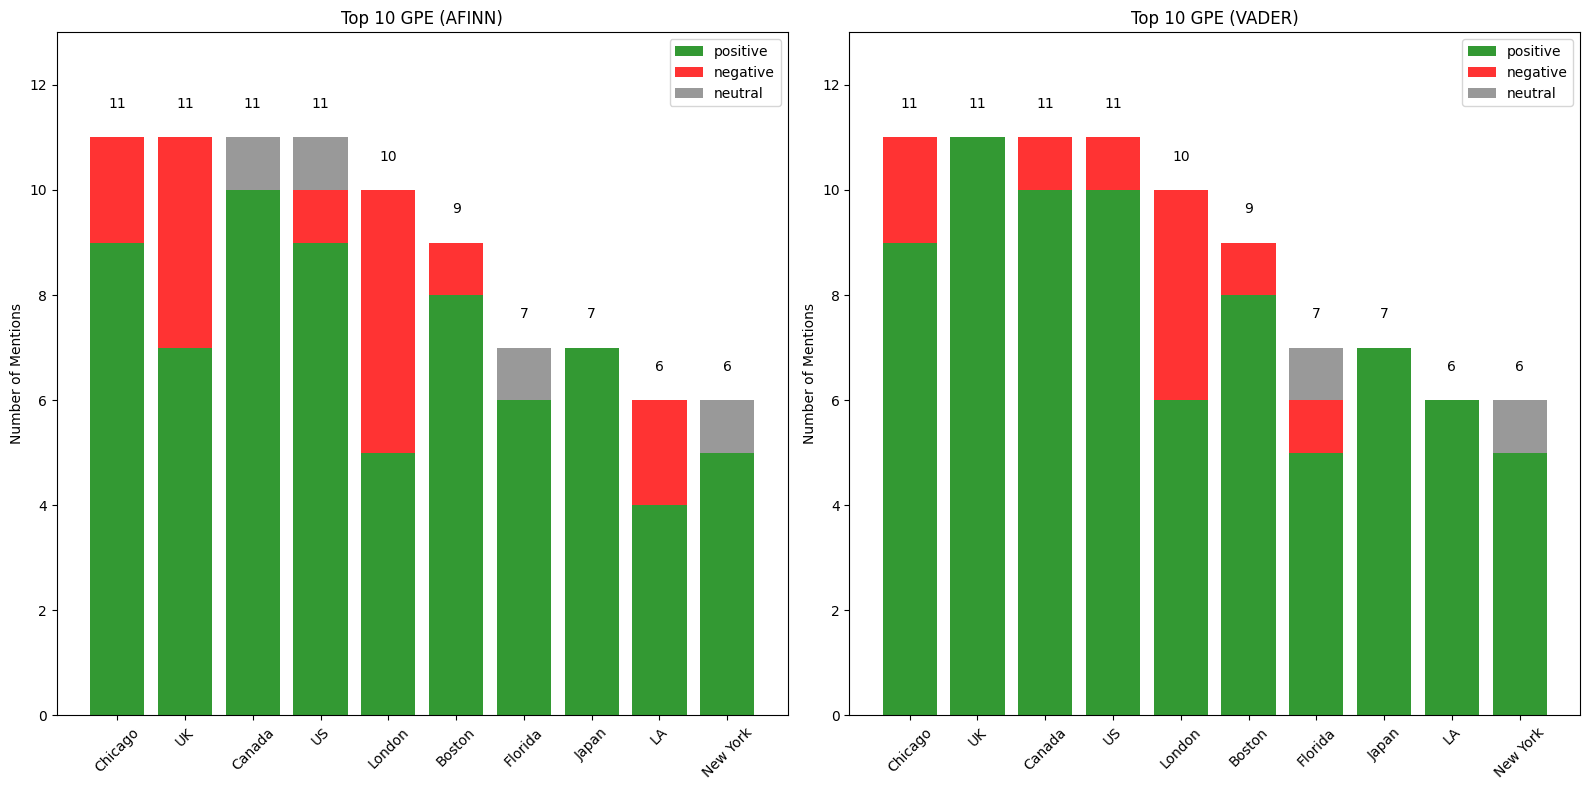

In [ ]:
# Top GPE sentiment analysis

gpe_entities = entity_sentiment_df[entity_sentiment_df['entity_label'] == 'GPE'].copy()
top_gpe = gpe_entities['entity_text'].value_counts().head(10)

gpe_sentiment_data = []
for gpe in top_gpe.index:
    gpe_data = gpe_entities[gpe_entities['entity_text'] == gpe]

    afinn_pos = (gpe_data['afinn_polarity'] == 1).sum()
    afinn_neg = (gpe_data['afinn_polarity'] == -1).sum()
    afinn_neu = (gpe_data['afinn_polarity'] == 0).sum()

    vader_pos = (gpe_data['vader_polarity'] == 1).sum()
    vader_neg = (gpe_data['vader_polarity'] == -1).sum()
    vader_neu = (gpe_data['vader_polarity'] == 0).sum()

    gpe_sentiment_data.append({
        'gpe': gpe,
        'total': len(gpe_data),
        'afinn_positive': afinn_pos,
        'afinn_negative': afinn_neg,
        'afinn_neutral': afinn_neu,
        'vader_positive': vader_pos,
        'vader_negative': vader_neg,
        'vader_neutral': vader_neu
    })

gpe_df = pd.DataFrame(gpe_sentiment_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
colors = ['green', 'red', 'gray']

# AFINN Plot
bottom_afinn = [0] * len(gpe_df)
for sentiment, color in zip(['afinn_positive', 'afinn_negative', 'afinn_neutral'], colors):
    ax1.bar(gpe_df['gpe'], gpe_df[sentiment], bottom=bottom_afinn, color=color, alpha=0.8,label=sentiment.split('_')[1])
    bottom_afinn = [bottom_afinn[i] + gpe_df[sentiment].iloc[i] for i in range(len(gpe_df))]

ax1.set_title('Top 10 GPE (AFINN)')
ax1.set_ylabel('Number of Mentions')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 13)

for i, (gpe, total) in enumerate(zip(gpe_df['gpe'], gpe_df['total'])):
    ax1.text(i, total + 0.5, str(total), ha='center', va='bottom')

# VADER Plot
bottom_vader = [0] * len(gpe_df)
for sentiment, color in zip(['vader_positive', 'vader_negative', 'vader_neutral'], colors):
    ax2.bar(gpe_df['gpe'], gpe_df[sentiment], bottom=bottom_vader, color=color, alpha=0.8,label=sentiment.split('_')[1])
    bottom_vader = [bottom_vader[i] + gpe_df[sentiment].iloc[i] for i in range(len(gpe_df))]

ax2.set_title('Top 10 GPE (VADER)')
ax2.set_ylabel('Number of Mentions')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 13)

for i, (gpe, total) in enumerate(zip(gpe_df['gpe'], gpe_df['total'])):
    ax2.text(i, total + 0.5, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.show()

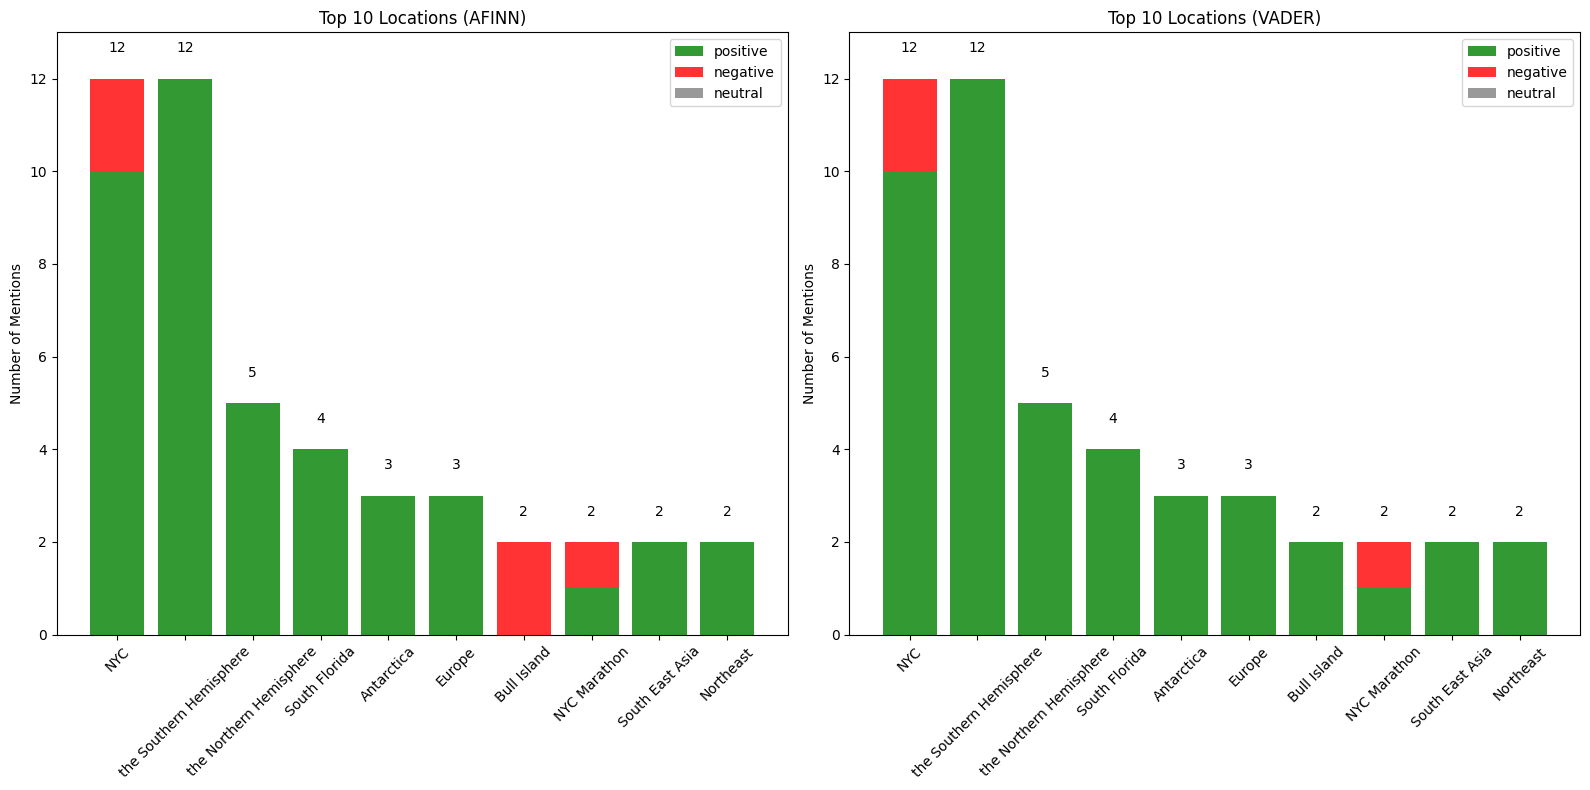

In [ ]:
# Top location sentiment analysis

location_entities = entity_sentiment_df[entity_sentiment_df['entity_label'] == 'LOC'].copy()
top_locations = location_entities['entity_text'].value_counts().head(10)

location_sentiment_data = []
for location in top_locations.index:
    location_data = location_entities[location_entities['entity_text'] == location]

    afinn_pos = (location_data['afinn_polarity'] == 1).sum()
    afinn_neg = (location_data['afinn_polarity'] == -1).sum()
    afinn_neu = (location_data['afinn_polarity'] == 0).sum()

    vader_pos = (location_data['vader_polarity'] == 1).sum()
    vader_neg = (location_data['vader_polarity'] == -1).sum()
    vader_neu = (location_data['vader_polarity'] == 0).sum()

    location_sentiment_data.append({
        'location': location,
        'total': len(location_data),
        'afinn_positive': afinn_pos,
        'afinn_negative': afinn_neg,
        'afinn_neutral': afinn_neu,
        'vader_positive': vader_pos,
        'vader_negative': vader_neg,
        'vader_neutral': vader_neu
    })

location_df = pd.DataFrame(location_sentiment_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
colors = ['green', 'red', 'gray']

# AFINN Plot
bottom_afinn = [0] * len(location_df)
for sentiment, color in zip(['afinn_positive', 'afinn_negative', 'afinn_neutral'], colors):
    ax1.bar(location_df['location'], location_df[sentiment], bottom=bottom_afinn, color=color, alpha=0.8,label=sentiment.split('_')[1])
    bottom_afinn = [bottom_afinn[i] + location_df[sentiment].iloc[i] for i in range(len(location_df))]

ax1.set_title('Top 10 Locations (AFINN)')
ax1.set_ylabel('Number of Mentions')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 13)

for i, (location, total) in enumerate(zip(location_df['location'], location_df['total'])):
    ax1.text(i, total + 0.5, str(total), ha='center', va='bottom')

# VADER Plot
bottom_vader = [0] * len(location_df)
for sentiment, color in zip(['vader_positive', 'vader_negative', 'vader_neutral'], colors):
    ax2.bar(location_df['location'], location_df[sentiment], bottom=bottom_vader, color=color, alpha=0.8,label=sentiment.split('_')[1])
    bottom_vader = [bottom_vader[i] + location_df[sentiment].iloc[i] for i in range(len(location_df))]

ax2.set_title('Top 10 Locations (VADER)')
ax2.set_ylabel('Number of Mentions')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 13)

for i, (location, total) in enumerate(zip(location_df['location'], location_df['total'])):
    ax2.text(i, total + 0.5, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.show()

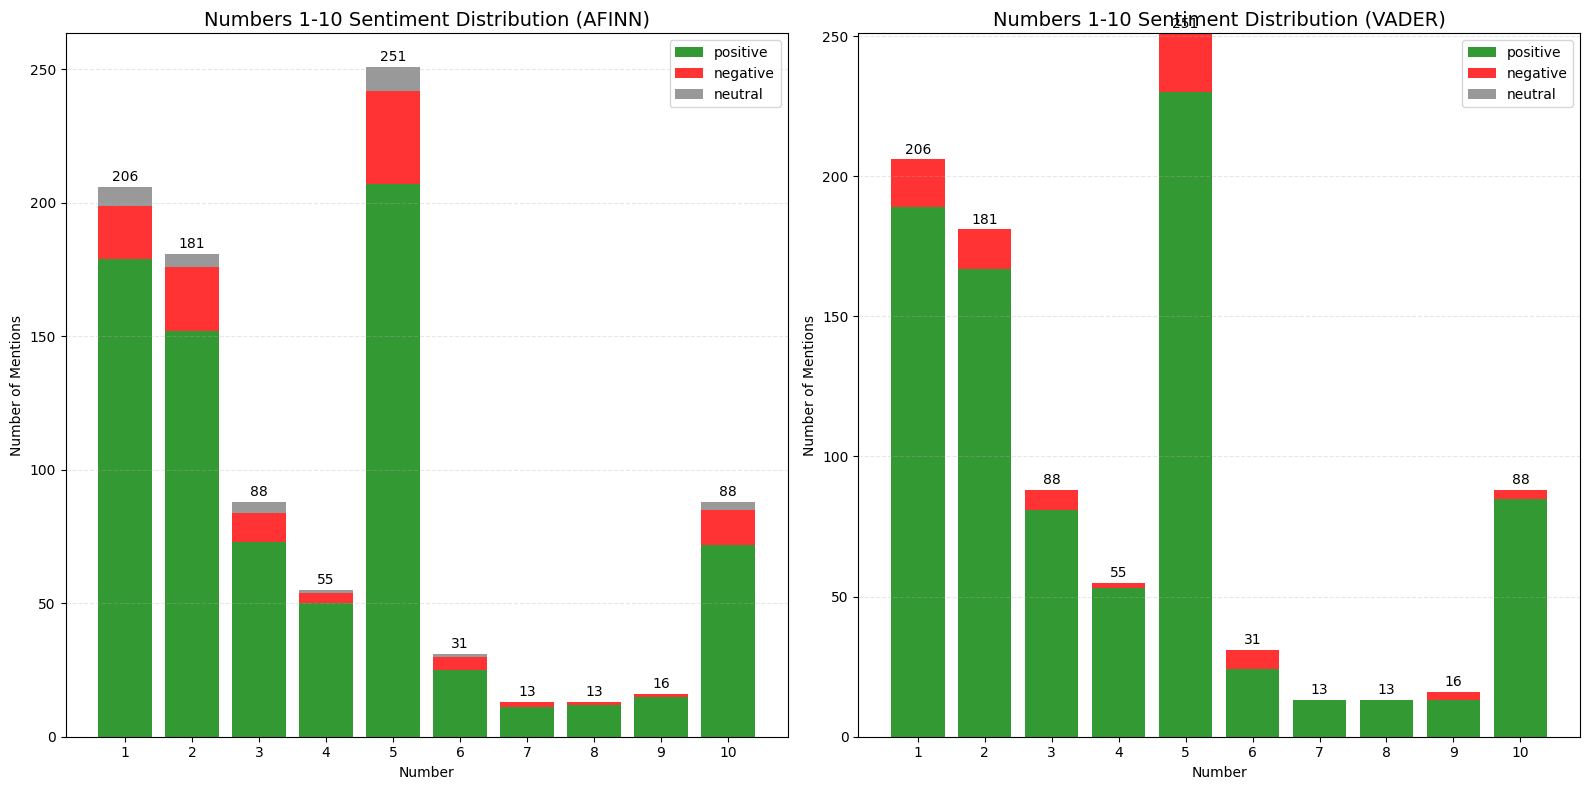

In [ ]:
# Cardinal entities sentiment analysis

number_variations = {
    '1': ['1', 'one', 'One', '1k', '1K'],
    '2': ['2', 'two', 'Two', '2k', '2K'],
    '3': ['3', 'three', 'Three', '3k', '3K'],
    '4': ['4', 'four', 'Four', '4k', '4K'],
    '5': ['5', 'five', 'Five', '5k', '5K'],
    '6': ['6', 'six', 'Six', '6k', '6K'],
    '7': ['7', 'seven', 'Seven', '7k', '7K'],
    '8': ['8', 'eight', 'Eight', '8k', '8K'],
    '9': ['9', 'nine', 'Nine', '9k', '9K'],
    '10': ['10', 'ten', 'Ten', '10k', '10K']
}

cardinal_entities = entity_sentiment_df[entity_sentiment_df['entity_label'] == 'CARDINAL'].copy()

number_sentiment_data = []
for number, variations in number_variations.items():
    number_data = cardinal_entities[cardinal_entities['entity_text'].isin(variations)]

    if len(number_data) > 0:
        afinn_pos = (number_data['afinn_polarity'] == 1).sum()
        afinn_neg = (number_data['afinn_polarity'] == -1).sum()
        afinn_neu = (number_data['afinn_polarity'] == 0).sum()
        vader_pos = (number_data['vader_polarity'] == 1).sum()
        vader_neg = (number_data['vader_polarity'] == -1).sum()
        vader_neu = (number_data['vader_polarity'] == 0).sum()

        number_sentiment_data.append({
            'number': number,
            'total': len(number_data),
            'afinn_positive': afinn_pos,
            'afinn_negative': afinn_neg,
            'afinn_neutral': afinn_neu,
            'vader_positive': vader_pos,
            'vader_negative': vader_neg,
            'vader_neutral': vader_neu
        })

number_df = pd.DataFrame(number_sentiment_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
colors = ['green', 'red', 'gray']

# AFINN Plot
bottom_afinn = [0] * len(number_df)
for sentiment, color in zip(['afinn_positive', 'afinn_negative', 'afinn_neutral'], colors):
    ax1.bar(number_df['number'], number_df[sentiment], bottom=bottom_afinn, color=color, alpha=0.8, label=sentiment.split('_')[1])
    bottom_afinn = [bottom_afinn[i] + number_df[sentiment].iloc[i] for i in range(len(number_df))]

ax1.set_title('Numbers 1-10 Sentiment Distribution (AFINN)', fontsize=14)
ax1.set_ylabel('Number of Mentions')
ax1.set_xlabel('Number')
ax1.legend()
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, (number, total) in enumerate(zip(number_df['number'], number_df['total'])):
    ax1.text(i, total + 1, str(total), ha='center', va='bottom')

# VADER Plot
bottom_vader = [0] * len(number_df)
for sentiment, color in zip(['vader_positive', 'vader_negative', 'vader_neutral'], colors):
    ax2.bar(number_df['number'], number_df[sentiment], bottom=bottom_vader, color=color, alpha=0.8, label=sentiment.split('_')[1])
    bottom_vader = [bottom_vader[i] + number_df[sentiment].iloc[i] for i in range(len(number_df))]

ax2.set_title('Numbers 1-10 Sentiment Distribution (VADER)', fontsize=14)
ax2.set_ylabel('Number of Mentions')
ax2.set_xlabel('Number')
ax2.legend()
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, (number, total) in enumerate(zip(number_df['number'], number_df['total'])):
    ax2.text(i, total + 1, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The next analysis is peculiar, we want to compute the emotions scores for the top entities. Specifically, given an entity, we want to see the average number of words for each emotion in posts in which the entity appears. This measure provides an indication of the extent to which each emotion is spread across all posts having that entity.

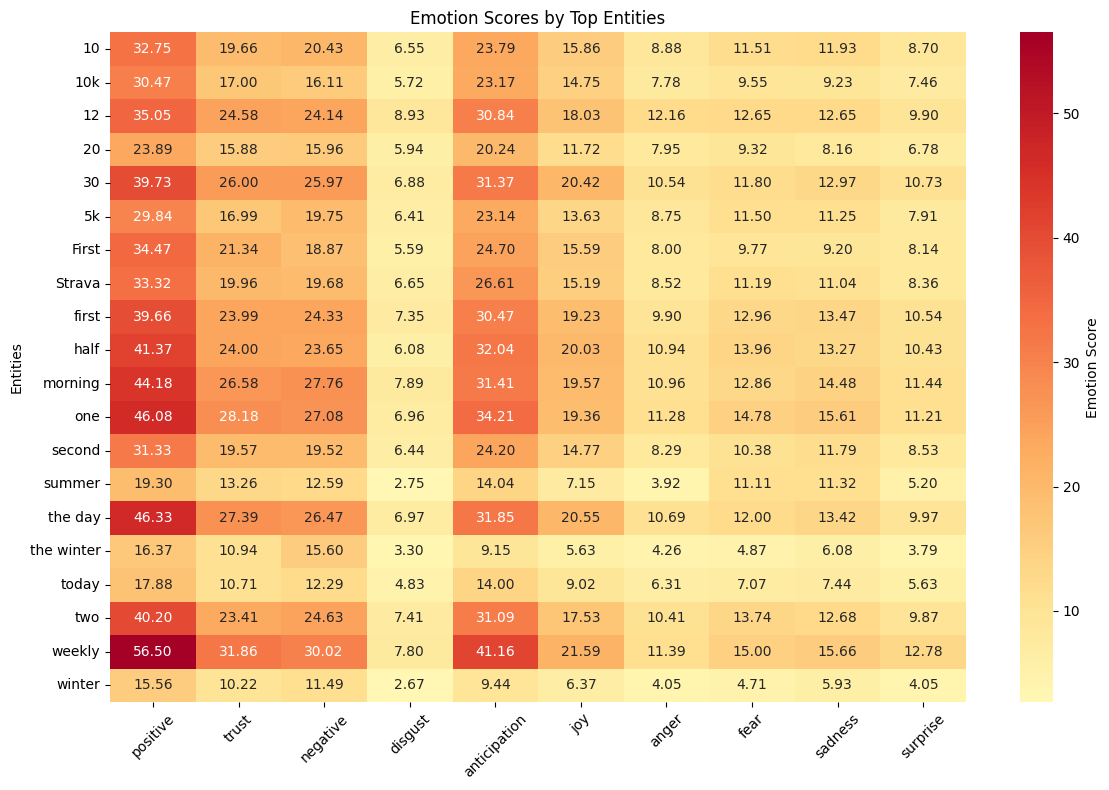

In [ ]:
# Emotions for top entities

entity_emotion_data = []
for idx, row in content_df.iterrows():
    emotions_dict = row['emotions']

    for entity_text, entity_label in row['entities']:
        record = {
            'entity_text': entity_text,
            'entity_label': entity_label,
            'post_id': idx
        }
        record.update(emotions_dict)
        entity_emotion_data.append(record)

entity_emotion_df = pd.DataFrame(entity_emotion_data)

emotion_columns = [col for col in entity_emotion_df.columns if col not in ['entity_text', 'entity_label', 'post_id']]

top_entities_for_emotions = top_entities['text']
top_entity_emotions = entity_emotion_df[entity_emotion_df['entity_text'].isin(top_entities_for_emotions)].groupby('entity_text')[emotion_columns].mean().round(3)

plt.figure(figsize=(12, 8))
sns.heatmap(top_entity_emotions, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f', cbar_kws={'label': 'Emotion Score'})
plt.title('Emotion Scores by Top Entities')
plt.ylabel('Entities')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The word "weekly" has a score of 56.50 on the "positive" emotion. This means that on average, when in a post there is the word "weekly", there are 56.50 positive words in that post.

Next, we are going to make a simple exploration of incosistencies for the NER task.

In [ ]:
# Check for entity consistency within same posts

def check_entity_consistency():
    post_entities = content_df['entities']

    inconsistencies = []
    for post_id, entities in post_entities.items():
        entity_texts = [ent[0].lower() for ent in entities]
        entity_labels = [ent[1] for ent in entities]

        text_to_labels = {}
        for text, label in zip(entity_texts, entity_labels):
            if text in text_to_labels and text_to_labels[text] != label:
                inconsistencies.append((text, text_to_labels[text], label))
            text_to_labels[text] = label

    return inconsistencies

inconsistencies = check_entity_consistency()

print(f"Found {len(inconsistencies)} entity labeling inconsistencies")

Found 70 entity labeling inconsistencies


In [ ]:
# Check for common NER errors

def evaluate_entity_quality(entity_df):
    total = len(entity_df)

    # Length outliers
    too_short = entity_df[(entity_df['entity_text'].str.len() <= 1) & (~entity_df['entity_text'].str.match(r'^\d+$'))]  # Numbers are ok since most refer to km.
    too_long = entity_df[entity_df['entity_text'].str.len() > 50]

    # Same entity with different cases (sometimes has letters lowercase, sometime uppercase, ecc)
    entity_texts = entity_df['entity_text'].value_counts()
    case_variants = []
    for entity in entity_texts.index:
        variants = [e for e in entity_texts.index if e.lower() == entity.lower() and e != entity]
        if variants:
            case_variants.extend([entity] + variants)

    # Non-alphabetic entities for PERSON/ORG
    person_org = entity_df[entity_df['entity_label'].isin(['PERSON', 'ORG'])]
    non_alphabetic = person_org[~person_org['entity_text'].str.isalpha()]

    return {
        'total_entities': total,
        'too_short_%': len(too_short) / total * 100,
        'too_long_%': len(too_long) / total * 100,
        'case_variants': len(set(case_variants)),
        'non_alphabetic_person_org_%': len(non_alphabetic) / len(person_org) * 100 if len(person_org) > 0 else 0
    }

quality_metrics = evaluate_entity_quality(entity_emotion_df)
print("Entity Quality Metrics:")
for metric, value in quality_metrics.items():
    print(f"\n{metric}: {value}")

Entity Quality Metrics:

total_entities: 9282

too_short_%: 0.16160310277957335

too_long_%: 0.19392372333548805

case_variants: 197

non_alphabetic_person_org_%: 44.21875


In [ ]:
# Relevance check

relevant_labels = {
  'DATE',
  'TIME',
  'QUANTITY',
  'CARDINAL',
  'ORDINAL',
  'GPE',
  'LOC',
  'ORG',
  'PERSON',
  'EVENT',
  'PRODUCT'
  }

irrelevant_labels = {'WORK_OF_ART', 'LAW', 'LANGUAGE', 'PERCENT', 'MONEY', 'FAC', 'NORP'}

# Calculate relevance ratio
total_entities = len(entity_emotion_df)
relevant_entities = entity_emotion_df[entity_emotion_df['entity_label'].isin(relevant_labels)]
relevance_ratio = len(relevant_entities) / total_entities

print(f"Domain relevance ratio: {relevance_ratio:.2%}")

Domain relevance ratio: 93.67%
